## Practical Task No.1 Averages/means, max and standard deviations


In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import camelot

In [489]:
volunteersDictionary = {}
columnsList = [
    "Record Time (Records each 0.5s)",
    "Date (Experiment Date)",
    "Signal level (0 (perfect) -200 (no signal))",
    "Attention (0-100% (maximum attention))",
    "Meditation (0-100% (maximum meditation))",
    "Delta (1-3Hz)",
    "Theta (4-7Hz)",
    "Low Alpha (8-9Hz)",
    "High Alfa (10-12Hz)",
    "Low Beta (13-17Hz)",
    "High Beta (18-30Hz)",
    "Low Gama (31-40Hz)",
    "High Gama (41-50Hz)",
    "RAW EEG (Voltage)",
    "Blink Strength (0-255 (maximum))",
    "Counter (not used)",
    "Average Attention (0-100% (maximum attention))",
    "Counter (not used)",
]
signalsList = [
    "Attention (0-100% (maximum attention))",
    "Meditation (0-100% (maximum meditation))",
    "Blink Strength (0-255 (maximum))",
    "Delta (1-3Hz)",
    "Theta (4-7Hz)",
    "Low Alpha (8-9Hz)",
    "High Alfa (10-12Hz)",
    "Low Beta (13-17Hz)",
    "High Beta (18-30Hz)",
    "Low Gama (31-40Hz)",
    "High Gama (41-50Hz)",
    "RAW EEG (Voltage)",
]
EEGAndSignalsList = signalsList.copy()
EEGAndSignalsList.remove(
    "Attention (0-100% (maximum attention))")
EEGAndSignalsList.remove(
    "Meditation (0-100% (maximum meditation))")
EEGAndSignalsList.remove(
    "Blink Strength (0-255 (maximum))")
volunteerIndexesList = []


In [490]:
count = 1
example_df_volunteer_1 = []

while (count < 11):
    key = f'Volunteer {str(count)}'
    volunteerIndexesList.append(key)
    path = "./ExperimentData/volunteer"
    if count < 10:
        specifier = "0" + str(count) + ".txt"
    elif count == 10:
        specifier = str(count) + ".txt"

    src = path + specifier
    df = pd.read_csv(
        src, sep=";", parse_dates=[1], header=None, decimal=','
    )
    df.columns = columnsList
    df.drop("Counter (not used)", axis=1, inplace=True)
    volunteersDictionary[key] = df
    if count == 1:
        example_df_volunteer_1 = df
    count += 1

example_df_volunteer_1


Record Time (Records each 0.5s) Date (Experiment Date)  \
0                           0.505302    2020-04-27 13:55:02   
1                           1.008255    2020-04-27 13:55:02   
2                           1.511114    2020-04-27 13:55:02   
3                           2.014117    2020-04-27 13:55:02   
4                           2.516871    2020-04-27 13:55:02   
..                               ...                    ...   
240                       121.192700    2020-04-27 13:55:02   
241                       121.695600    2020-04-27 13:55:02   
242                       122.198500    2020-04-27 13:55:02   
243                       122.701300    2020-04-27 13:55:02   
244                       123.204300    2020-04-27 13:55:02   

     Signal level (0 (perfect) -200 (no signal))  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
..                                           ...   
240                                            0   
241                                            0   
242                                            0   
243                                            0   
244                                            0   

     Attention (0-100% (maximum attention))  \
0                                         0   
1                                         0   
2                                        57   
3                                        57   
4                                        50   
..                                      ...   
240                                      81   
241                                      87   
242                                      87   
243                                     100   
244                                     100   

     Meditation (0-100% (maximum meditation))  Delta (1-3Hz)  Theta (4-7Hz)  \
0                                           0              0              0   
1                                           0              0              0   
2                                          80        2095216         243891   
3                                          80        2095216         243891   
4                                          77         645745          30745   
..                                        ...            ...            ...   
240                                        69          40028          61914   
241                                        69          18717          18632   
242                                        69          18717          18632   
243                                        53         251586          24802   
244                                        53         251586          24802   

     Low Alpha (8-9Hz)  High Alfa (10-12Hz)  Low Beta (13-17Hz)  \
0                    0                    0                   0   
1                    0                    0                   0   
2                75645                39325               44126   
3                75645                39325               44126   
4                 8015                 7933                4479   
..                 ...                  ...                 ...   
240               3618                 7784                3490   
241              11831                 8448               14008   
242              11831                 8448               14008   
243               7367                 2902               19098   
244               7367                 2902               19098   

     High Beta (18-30Hz)  Low Gama (31-40Hz)  High Gama (41-50Hz)  \
0                      0                   0                    0   
1                      0                   0                    0   
2                  50714               44850                26796   
3                  50714    

In [491]:
def generateSignalStatisticalMeasuresTable(signal):
    volunteersSignalMean = []
    volunteersSignalMax = []
    volunteersSignalStandardDeviation = []

    for volunteer in volunteersDictionary.values():
        volunteersSignalMean.append(volunteer[signal].mean())
        volunteersSignalMax.append(volunteer[signal].max())
        volunteersSignalStandardDeviation.append(
            volunteer[signal].std())

    dataFrame = {}
    meanKey = str(signal) + ' Mean'
    dataFrame[meanKey] = volunteersSignalMean
    maxKey = str(signal) + ' Max'
    dataFrame[maxKey] = volunteersSignalMax
    stdKey = str(signal) + ' Standard Deviation'
    dataFrame[stdKey] = volunteersSignalStandardDeviation

    return pd.DataFrame(dataFrame, index=volunteerIndexesList)


In [492]:
signalTablesList = []

for signal in signalsList:
    signalTablesList.append(generateSignalStatisticalMeasuresTable(signal))

signalTablesList


[              Attention (0-100% (maximum attention)) Mean  \
 Volunteer 1                                     43.057143   
 Volunteer 2                                     40.045082   
 Volunteer 3                                     56.303279   
 Volunteer 4                                     59.714286   
 Volunteer 5                                     43.220408   
 Volunteer 6                                     45.151020   
 Volunteer 7                                     45.693878   
 Volunteer 8                                     41.008163   
 Volunteer 9                                     46.910204   
 Volunteer 10                                    48.877551   
 
               Attention (0-100% (maximum attention)) Max  \
 Volunteer 1                                          100   
 Volunteer 2                                           81   
 Volunteer 3                                          100   
 Volunteer 4                                           97   
 Volunteer 

In [493]:
concatenatedSignalsListTable = pd.concat(
    signalTablesList, axis="columns", join="inner"
)
concatenatedSignalsListTable


Attention (0-100% (maximum attention)) Mean  \
Volunteer 1                                     43.057143   
Volunteer 2                                     40.045082   
Volunteer 3                                     56.303279   
Volunteer 4                                     59.714286   
Volunteer 5                                     43.220408   
Volunteer 6                                     45.151020   
Volunteer 7                                     45.693878   
Volunteer 8                                     41.008163   
Volunteer 9                                     46.910204   
Volunteer 10                                    48.877551   

              Attention (0-100% (maximum attention)) Max  \
Volunteer 1                                          100   
Volunteer 2                                           81   
Volunteer 3                                          100   
Volunteer 4                                           97   
Volunteer 5                                           84   
Volunteer 6                                           88   
Volunteer 7                                           94   
Volunteer 8                                          100   
Volunteer 9                                           96   
Volunteer 10                                         100   

              Attention (0-100% (maximum attention)) Standard Deviation  \
Volunteer 1                                           19.054409           
Volunteer 2                                           16.186987           
Volunteer 3                                           18.358743           
Volunteer 4                                           19.731185           
Volunteer 5                                           15.842216           
Volunteer 6                                           18.541205           
Volunteer 7                                           17.197269           
Volunteer 8                                           23.840142           
Volunteer 9                                           15.829525           
Volunteer 10                                          23.785269           

              Meditation (0-100% (maximum meditation)) Mean  \
Volunteer 1                                       62.995918   
Volunteer 2                                       57.004098   
Volunteer 3                                       73.233607   
Volunteer 4                                       68.322449   
Volunteer 5                                       62.179592   
Volunteer 6                                       62.791837   
Volunteer 7                                       55.277551   
Volunteer 8                                       57.289796   
Volunteer 9                                       68.130612   
Volunteer 10                                      31.832653   

              Meditation (0-100% (maximum meditation)) Max  \
Volunteer 1                                             97   
Volunteer 2                                            100   
Volunteer 3                                            100   
Volunteer 4                                            100   
Volunteer 5                                             96   
Volunteer 6                                            100   
Volunteer 7                                             81   
Volunteer 8                                            100   
Volunteer 9                                            100   
Volunteer 10                                            78   

              Meditation (0-100% (maximum meditation)) Standard Deviation  \
Volunteer 1                                           13.659350             
Volunteer 2                                           16.429046             
Volunteer 3                                           13.179309             
Volunteer 4                                           18.192902             
Volunteer 5                                           15.496443             
Volunteer 6     

In [494]:
dataVideoValuesTable = camelot.read_pdf("./05_DataVideoValues.pdf")
dataVideoValuesTable


<TableList n=1>

In [495]:
print("Total tables extracted:", dataVideoValuesTable.n)



Total tables extracted: 1


In [496]:
print(dataVideoValuesTable[0].df)


       0                1               2               3  \
0     id             name  Valence \nRank  Arousal \nRank   
1   9446  ACCEDE09446.mp4            9312            8547   
2   5522  ACCEDE05522.mp4            9241            9201   
3   9160  ACCEDE09160.mp4            9758            8301   
4   7901  ACCEDE07901.mp4            9329            8863   
5   4975  ACCEDE04975.mp4            9349            8935   
6   8486  ACCEDE08486.mp4            9423            7720   
7   7272  ACCEDE07272.mp4            9475            8061   
8   1188  ACCEDE01188.mp4            9500            9080   
9   9022  ACCEDE09022.mp4            9652            7874   
10  6716  ACCEDE06716.mp4            9768            7965   
11  6625  ACCEDE06625.mp4            9660            7684   
12  6618  ACCEDE06618.mp4            9760            9713   
13  1362  ACCEDE01362.mp4            9657            9235   

                              4            5                   6  \
0   Valence Valu

In [497]:
# dataVideoValuesTable[0].to_csv("DataVideoValues.csv")


In [498]:
dataVideoValues = pd.read_csv("DataVideoValues.csv", index_col=0)
dataVideoValues


name  Valence \nRank  Arousal \nRank  \
id                                                      
9446  ACCEDE09446.mp4            9312            8547   
5522  ACCEDE05522.mp4            9241            9201   
9160  ACCEDE09160.mp4            9758            8301   
7901  ACCEDE07901.mp4            9329            8863   
4975  ACCEDE04975.mp4            9349            8935   
8486  ACCEDE08486.mp4            9423            7720   
7272  ACCEDE07272.mp4            9475            8061   
1188  ACCEDE01188.mp4            9500            9080   
9022  ACCEDE09022.mp4            9652            7874   
6716  ACCEDE06716.mp4            9768            7965   
6625  ACCEDE06625.mp4            9660            7684   
6618  ACCEDE06618.mp4            9760            9713   
1362  ACCEDE01362.mp4            9657            9235   

      Valence Value Arousal Value  Unnamed: 5  Valence \nVariance  \
id                                                                  
9446                     3.522513    3.814269            0.131342   
5522                     3.512980    4.183311            0.127613   
9160                     3.587641    3.682005            0.160976   
7901                     3.524828    3.989423            0.132275   
4975                     3.527569    4.030158            0.133394   
8486                     3.537864    3.383838            0.137721   
7272                     3.545247    3.556417            0.140939   
1188                     3.548840    4.113125            0.142538   
9022                     3.571317    3.460925            0.152978   
6716                     3.589209    3.507136            0.161760   
6625                     3.572530    3.366020            0.153561   
6618                     3.587954    4.489885            0.161132   
1362                     3.572075    4.203189            0.153342   

      Arousal \nVariance  
id                        
9446            0.142225  
5522            0.171842  
9160            0.136876  
7901            0.153715  
4975            0.157076  
8486            0.134816  
7272            0.134423  
1188            0.164673  
9022            0.134148  
6716            0.134120  
6625            0.135073  
6618            0.209992  
1362            0.173989

In [499]:
dataVideoValues.rename(
    columns={
        'Valence \nRank': 'Valence Rank', 'Arousal \nRank': 'Arousal Rank', 'Valence Value Arousal Value': 'Valence Value',
        'Unnamed: 5': 'Arousal Value', 'Valence \nVariance': 'Valence Variance', 'Arousal \nVariance': 'Arousal Variance'
    },
    inplace=True
)
dataVideoValues


name  Valence Rank  Arousal Rank  Valence Value  \
id                                                                 
9446  ACCEDE09446.mp4          9312          8547       3.522513   
5522  ACCEDE05522.mp4          9241          9201       3.512980   
9160  ACCEDE09160.mp4          9758          8301       3.587641   
7901  ACCEDE07901.mp4          9329          8863       3.524828   
4975  ACCEDE04975.mp4          9349          8935       3.527569   
8486  ACCEDE08486.mp4          9423          7720       3.537864   
7272  ACCEDE07272.mp4          9475          8061       3.545247   
1188  ACCEDE01188.mp4          9500          9080       3.548840   
9022  ACCEDE09022.mp4          9652          7874       3.571317   
6716  ACCEDE06716.mp4          9768          7965       3.589209   
6625  ACCEDE06625.mp4          9660          7684       3.572530   
6618  ACCEDE06618.mp4          9760          9713       3.587954   
1362  ACCEDE01362.mp4          9657          9235       3.572075   

      Arousal Value  Valence Variance  Arousal Variance  
id                                                       
9446       3.814269          0.131342          0.142225  
5522       4.183311          0.127613          0.171842  
9160       3.682005          0.160976          0.136876  
7901       3.989423          0.132275          0.153715  
4975       4.030158          0.133394          0.157076  
8486       3.383838          0.137721          0.134816  
7272       3.556417          0.140939          0.134423  
1188       4.113125          0.142538          0.164673  
9022       3.460925          0.152978          0.134148  
6716       3.507136          0.161760          0.134120  
6625       3.366020          0.153561          0.135073  
6618       4.489885          0.161132          0.209992  
1362       4.203189          0.153342          0.173989

<AxesSubplot: xlabel='id'>

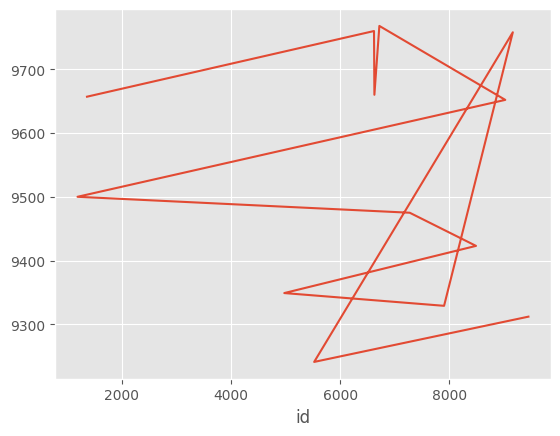

In [500]:
dataVideoValues["Valence Rank"].plot()


<AxesSubplot: >

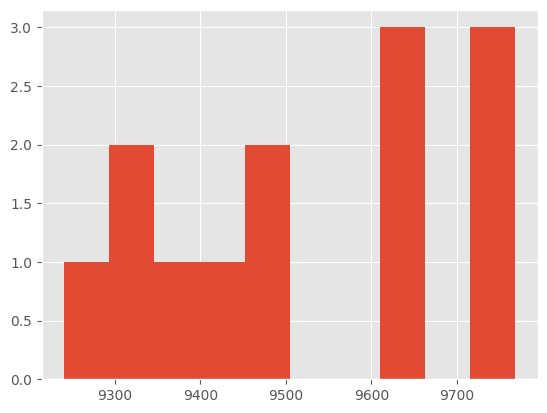

In [501]:
dataVideoValues["Valence Rank"].hist()


<AxesSubplot: xlabel='id'>

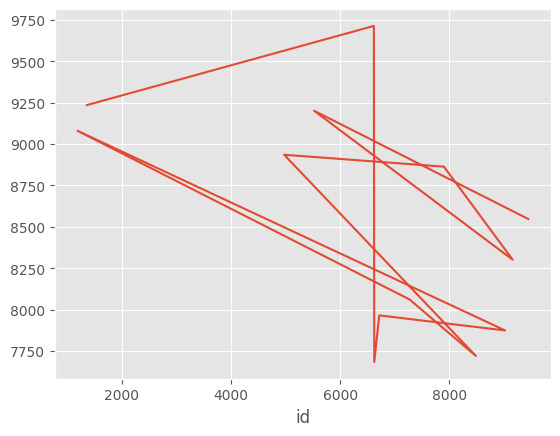

In [502]:
dataVideoValues["Arousal Rank"].plot()


<AxesSubplot: >

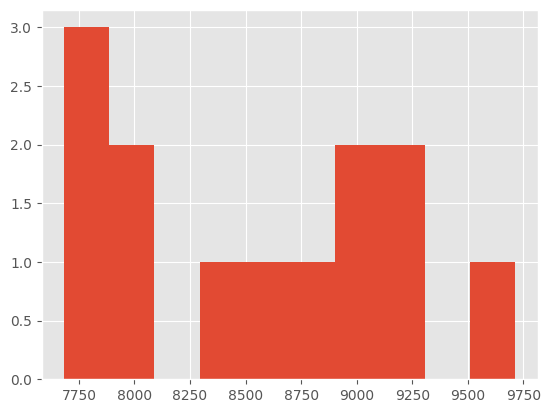

In [503]:
dataVideoValues["Arousal Rank"].hist()


<AxesSubplot: xlabel='id'>

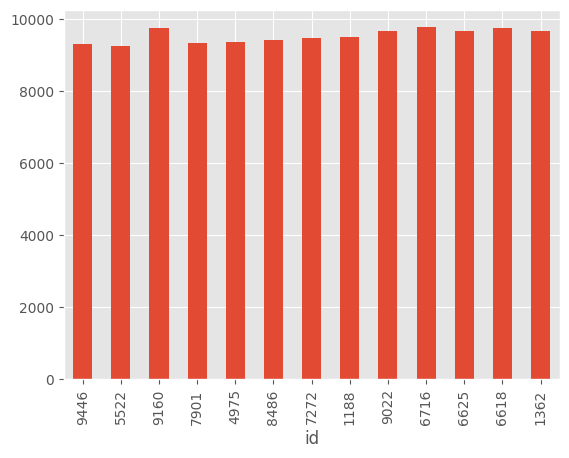

In [504]:
dataVideoValues["Arousal Rank"].plot(kind="bar")
dataVideoValues["Valence Rank"].plot(kind="bar")


## Practical Task No. 2. Signal filtering


#### Simple Moving Average:


SMA is calculated by taking the mean of a size of the window observations at a time that is present in the current window. It is used for analyzing trends. It goes through the time series from the time T + window size and aggregates values from the current time T and window size – 1 steps back. Usually, we take an average from this window as the expected value (thus, we have the Moving Average algorithm).


Median filtering is better if we are removing rare events, outliers, from our dataset.
Average filter is better for volatile and high-frequency datasets.


The so named trend is only the (rolling) average of the signal, where the window size is large enough so that local fluctuations are averaged out.

In [505]:
window_size = 5


In [506]:
# Uncomment to see the result applied to the dataset

# for volunteer in volunteerIndexesList:
#     for signal in signalsList:
#         signalSeries = volunteersDictionary[volunteer][signal]
#         movingAverages = signalSeries.rolling(window_size).mean()

#         plt.plot(signalSeries, label='Not filtered')
#         plt.plot(movingAverages, label='Filtered')
#         plt.legend(title='Signal')
#         plt.xlabel('Time period', fontsize=12)
#         plt.title(f'{volunteer} - {signal}', fontsize=14)
#         plt.show()


#### Fourier transformation for EEG and frequency signals.


In [507]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### Fourier transformation for EEG and frequency signals.


The official definition of the Fourier Transform states that it is a method that allows us to decompose functions depending on space or time into functions depending on frequency.


Fourier method is named after the French mathematician and physicist Joseph Fourier, who used this type of method to study the heat transfer. The basic idea of this method is to express some complicated functions as the infinite sum of sine and cosine waves. 


The Fourier method has many applications in engineering and science, such as signal processing, partial differential equations, image processing and so on. The Fast Fourier Transform is chosen as one of the 10 algorithms with the greatest influence on the development and practice of science and engineering in the 20th century in the January/February 2000 issue of Computing in Science and Engineering.

Other common applications of Fourier Transform are in sound or music data, but also in signal processing. Basically, any domain that works with wave-like data benefits from using the Fourier Transform.


There are many types of waves in our life, for example, if you throw a rock into a pond, you can see the waves form and travel in the water. Of course, there are many more examples of waves, some of them are even difficult to see, such as such as sound waves, earthquake waves, microwaves (that we use to cook our food in the kitchen). But in physics, a wave is a disturbance that travels through space and matter with a transferring energy from one place to another. It is important to study waves in our life to understand how they form, travel and so on. A basic tool that help us to understand and study the waves is - the Fourier Transform.

##### Time Series: a combination of seasonality, trend, and noise

An often very important aspect of time series is seasonality. Many variables, whether it be sales, weather, or other time series, often show inherent seasonality.


We can use the Fourier Transform to detect seasonality in time series.


We can model a single wave as a field with a function 𝐹(𝑥,𝑡), where 𝑥 is the location of a point in space, while 𝑡 is the time. One simplest case is the shape of a sine wave change over 𝑥.

In [508]:
x = np.linspace(0, 20, 201)
x


array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [509]:
y = np.sin(x)
y


array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

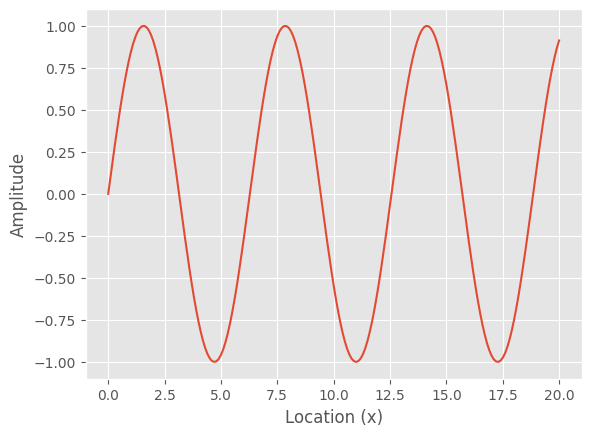

In [510]:
plt.plot(x, y)
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()


We can think of the sine wave can change both in time and space. If we plot the changes at various locations, each time snapshot will be a sine wave changes with location. See the following figure with a fix point at 𝑥=2.5 showing as a red dot. 

In [511]:
times = np.arange(5)
times


array([0, 1, 2, 3, 4])

In [512]:
n = len(times)
n


5

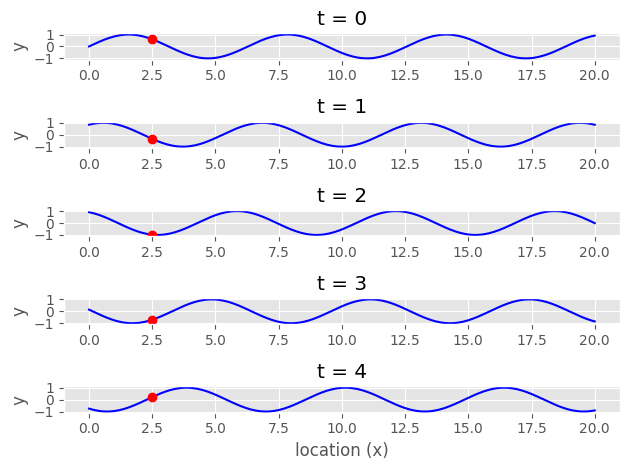

In [513]:
for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y[25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()
plt.show()


#### Characteristics of a wave

We can see waves can be a continuous entity both in time and space. But in reality, many times we discrete the time and space at various points. For example, we can use sensors such as accelerometers (can measure the acceleration of a movement) at different locations on the Earth to monitor the earthquakes, which is spatial discretization. Similarly, these sensors usually record the data at certain times which is a temporal discretization. For a single wave, it has different characteristics. See the following two figures.

<img class="fit-picture"
     src="https://pythonnumericalmethods.berkeley.edu/_images/24.01.01-period_amplitude.jpg"
     alt="Period and amplitude">

<img class="fit-picture"
     src="https://pythonnumericalmethods.berkeley.edu/_images/24.01.02-wavelength_amplitude.jpg"
     alt="Wavelength and amplitude">



Amplitude is used to describe the difference between the maximum values to the baseline value (see the above figures). A sine wave is a periodic signal, which means it repeats itself after certain time, which can be measured by period. Period of a wave is time it takes to finish the complete cycle, in the figure, we can see that the period can be measured from the two adjacent peaks. Wavelength measures the distance between two successive crests or troughs of a wave. Frequency describes the number of waves that pass a fixed place in a given amount of time. Frequency can be measured by how many cycles pass within 1 second. Therefore, the unit of frequency is cycles/second, or more commonly used Hertz (abbreviated Hz). Frequency is different from period, but they are related to each other. Frequency refers to how often something happens while period refers to the time it takes to complete something, mathematically,



𝑝𝑒𝑟𝑖𝑜𝑑 = 1 / 𝑓𝑟𝑒𝑞𝑢𝑒𝑛𝑐𝑦


From the two figures, we can also see that blue dots on the sine waves, these are the discretization points we did both in time and space. Therefore, only at these dots, we have sampled the value of the wave. Usually when we record a wave, we need to specify how often we sample the wave in time, this is called sampling. And this rate is called sampling rate, with the unit Hz. For example, if we sample a wave at 2 Hz, it means that every second we sample two data points. Let’s see a sine wave more carefully. A sine wave can be represented by the following equation:



𝑦(𝑡) = 𝐴𝑠𝑖𝑛(𝜔𝑡+𝜙)

where 𝐴 is the amplitude of the wave, 𝜔 is the angular frequency, which specifies how many cycles occur in a second, in radians per second. 𝜙 is the phase of the signal. If 𝑇 is the period of the wave, and 𝑓 is the frequency of the wave, then 𝜔 has the following relationship to them:

𝜔 = 2𝜋 / 𝑇 = 2𝜋𝑓

 Let us generate two sine waves with time between 0 and 1 seconds and frequency is 5 Hz and 10 Hz, all sampled at 100 Hz. We will plot the two waves and see the difference. The amount of cycles in the 1 second is the frequency in Hz.

In [514]:
# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
ts


0.01

In [515]:
t = np.arange(0, 1, ts)
t


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [516]:
# frequency of the signal
freq = 5
y = np.sin(2*np.pi*freq*t)
y

array([ 0.00000000e+00,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  1.22464680e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
       -2.44929360e-16,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  3.67394040e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
       -4.89858720e-16,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  6.12323400e-16, -3.09016994e-01,
       -5.87785252e-01, -

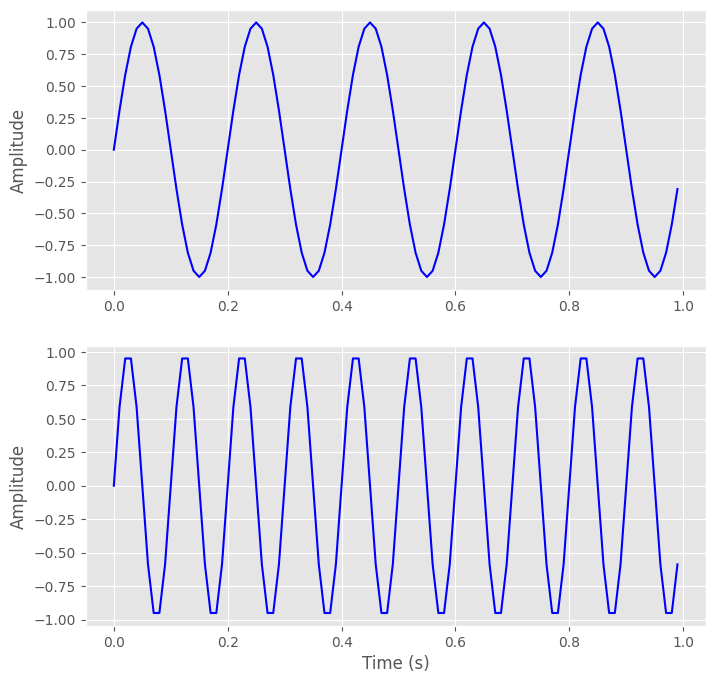

In [517]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()


Afterwards we can generate two sine waves with time between 0 and 1 seconds. Both waves have frequency 5 Hz and sampled at 100 Hz, but the phase at 0 and 10, respectively. Also the amplitude of the two waves are 5 and 10. We will plot the two waves and see the difference.

In [518]:
# frequency of the signal
freq = 5
y = 5*np.sin(2*np.pi*freq*t)
y


array([ 0.00000000e+00,  1.54508497e+00,  2.93892626e+00,  4.04508497e+00,
        4.75528258e+00,  5.00000000e+00,  4.75528258e+00,  4.04508497e+00,
        2.93892626e+00,  1.54508497e+00,  6.12323400e-16, -1.54508497e+00,
       -2.93892626e+00, -4.04508497e+00, -4.75528258e+00, -5.00000000e+00,
       -4.75528258e+00, -4.04508497e+00, -2.93892626e+00, -1.54508497e+00,
       -1.22464680e-15,  1.54508497e+00,  2.93892626e+00,  4.04508497e+00,
        4.75528258e+00,  5.00000000e+00,  4.75528258e+00,  4.04508497e+00,
        2.93892626e+00,  1.54508497e+00,  1.83697020e-15, -1.54508497e+00,
       -2.93892626e+00, -4.04508497e+00, -4.75528258e+00, -5.00000000e+00,
       -4.75528258e+00, -4.04508497e+00, -2.93892626e+00, -1.54508497e+00,
       -2.44929360e-15,  1.54508497e+00,  2.93892626e+00,  4.04508497e+00,
        4.75528258e+00,  5.00000000e+00,  4.75528258e+00,  4.04508497e+00,
        2.93892626e+00,  1.54508497e+00,  3.06161700e-15, -1.54508497e+00,
       -2.93892626e+00, -

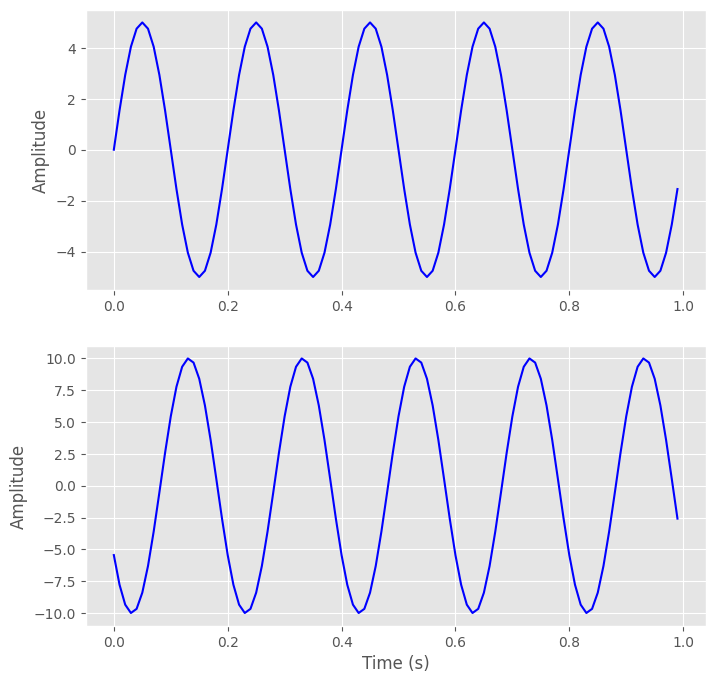

In [519]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

y = 10*np.sin(2*np.pi*freq*t + 10)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()


#### Discrete Fourier Transform (DFT)

There are more complicated cases in real world, it would be great if we have a method that we can use to analyze the characteristics of the wave. The Fourier Transform can be used for this purpose, which it decompose any signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. The Fourier transform can be applied to continuous or discrete waves. It is called discrete because the input data is measured at discrete intervals: our time series data is not a continuous function.

1. The input is a sequence of numbers of the original variable (one value per time step)
2. The output is one value of amplitude (or signal strength) for each frequency. These are represented by the Fourier Coefficients


Using the DFT, we can compose a complicated signal to a series of sinusoids and each of them will have a different frequency. The following 3D figure shows the idea behind the DFT, that a complicated signal is actually the results of the sum of 3 different sine waves. The time domain signal, which is a usual signal we saw can be transformed into a figure in the frequency domain called DFT amplitude spectrum, where the signal frequencies are showing as vertical bars. The height of the bar after normalization is the amplitude of the signal in the time domain. You can see that the 3 vertical bars are corresponding the 3 frequencies of the sine wave, which are also plotted in the figure.

<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.02.02-time_frequency.png"/>


#### DFT

The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. It is defined as:

<img src="./DFT.png"/>

where
- N = number of samples
- n = current sample
- k = current frequency, where 𝑘∈[0,𝑁−1]
- 𝑥𝑛 = the sine value at sample n
- 𝑋𝑘 = The DFT which include information of both amplitude and phase

Also, the last expression in the above equation derived from the Euler’s formula, which links the trigonometric functions to the complex exponential function: 𝑒𝑖⋅𝑥=𝑐𝑜𝑠𝑥+𝑖⋅𝑠𝑖𝑛𝑥

Due to the nature of the transform, 𝑋0=∑𝑁−1𝑛=0𝑥𝑛. If 𝑁 is an odd number, the elements 𝑋1,𝑋2,...,𝑋(𝑁−1)/2 contain the positive frequency terms and the elements 𝑋(𝑁+1)/2,...,𝑋𝑁−1 contain the negative frequency terms, in order of decreasingly negative frequency. While if 𝑁 is even, the elements 𝑋1,𝑋2,...,𝑋𝑁/2−1 contain the positive frequency terms, and the elements 𝑋𝑁/2,...,𝑋𝑁−1 contain the negative frequency terms, in order of decreasingly negative frequency. In the case that our input signal 𝑥 is a real-valued sequence, the DFT output 𝑋𝑛 for positive frequencies is the conjugate of the values 𝑋𝑛 for negative frequencies, the spectrum will be symmetric. Therefore, usually we only plot the DFT corresponding to the positive frequencies.t

Note that the 𝑋𝑘 is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component 𝑒𝑖⋅2𝜋𝑘𝑛/𝑁 of function 𝑥𝑛. The amplitude and phase of the signal can be calculated as:

<img src="./DFT_2.png"/>

where 𝐼𝑚(𝑋𝑘) and 𝑅𝑒(𝑋𝑘) are the imagery and real part of the complex number, 𝑎𝑡𝑎𝑛2 is the two-argument form of the 𝑎𝑟𝑐𝑡𝑎𝑛 function.

The amplitudes returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. Note that doing this will divide the power between the positive and negative sides, if the input signal is real-valued sequence as we described above, the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and instead of divide 𝑁, we divide 𝑁/2 to get the amplitude corresponding to the time domain signal.

After computing this, we obtain data about the frequencies that are present in our variable. Each of the values in the outcome series is the strength of a specific frequency. If the amplitude of this frequency is high, then this seasonality is important in our time series (or other waves).
In short, we started with values and by passing it through the mathematical function of the Discrete Fourier Transform, we have obtained the strength per frequency.


Let us generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. We will add this 3 sine waves together with a sampling rate 100 Hz.

In [520]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)
t


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

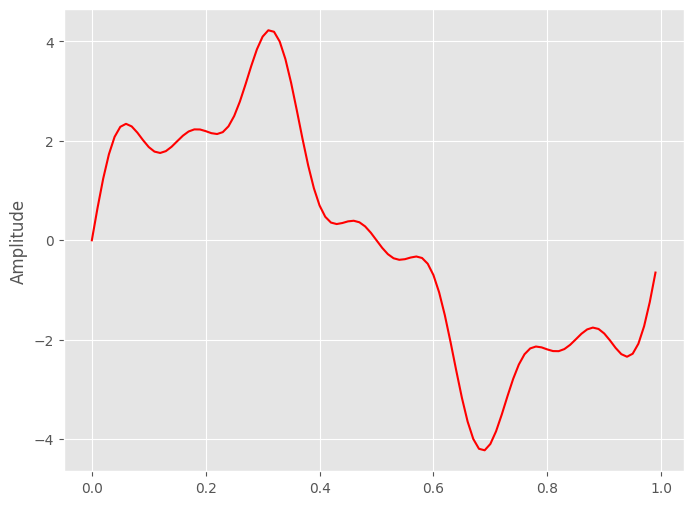

In [521]:
freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5 * np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


We can write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Then we apply this function to the signal we generated above and plot the result.

In [522]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X


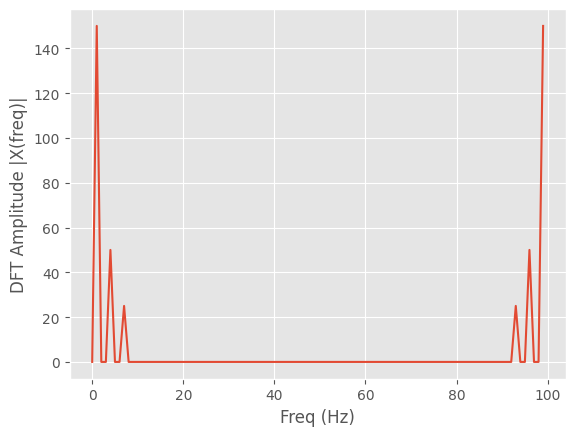

In [523]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.plot(freq, abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


Working with Delta signal.

In [524]:
volunteer1Table = volunteersDictionary["Volunteer 1"]
volunteer1Table

Record Time (Records each 0.5s) Date (Experiment Date)  \
0                           0.505302    2020-04-27 13:55:02   
1                           1.008255    2020-04-27 13:55:02   
2                           1.511114    2020-04-27 13:55:02   
3                           2.014117    2020-04-27 13:55:02   
4                           2.516871    2020-04-27 13:55:02   
..                               ...                    ...   
240                       121.192700    2020-04-27 13:55:02   
241                       121.695600    2020-04-27 13:55:02   
242                       122.198500    2020-04-27 13:55:02   
243                       122.701300    2020-04-27 13:55:02   
244                       123.204300    2020-04-27 13:55:02   

     Signal level (0 (perfect) -200 (no signal))  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
..                                           ...   
240                                            0   
241                                            0   
242                                            0   
243                                            0   
244                                            0   

     Attention (0-100% (maximum attention))  \
0                                         0   
1                                         0   
2                                        57   
3                                        57   
4                                        50   
..                                      ...   
240                                      81   
241                                      87   
242                                      87   
243                                     100   
244                                     100   

     Meditation (0-100% (maximum meditation))  Delta (1-3Hz)  Theta (4-7Hz)  \
0                                           0              0              0   
1                                           0              0              0   
2                                          80        2095216         243891   
3                                          80        2095216         243891   
4                                          77         645745          30745   
..                                        ...            ...            ...   
240                                        69          40028          61914   
241                                        69          18717          18632   
242                                        69          18717          18632   
243                                        53         251586          24802   
244                                        53         251586          24802   

     Low Alpha (8-9Hz)  High Alfa (10-12Hz)  Low Beta (13-17Hz)  \
0                    0                    0                   0   
1                    0                    0                   0   
2                75645                39325               44126   
3                75645                39325               44126   
4                 8015                 7933                4479   
..                 ...                  ...                 ...   
240               3618                 7784                3490   
241              11831                 8448               14008   
242              11831                 8448               14008   
243               7367                 2902               19098   
244               7367                 2902               19098   

     High Beta (18-30Hz)  Low Gama (31-40Hz)  High Gama (41-50Hz)  \
0                      0                   0                    0   
1                      0                   0                    0   
2                  50714               44850                26796   
3                  50714    

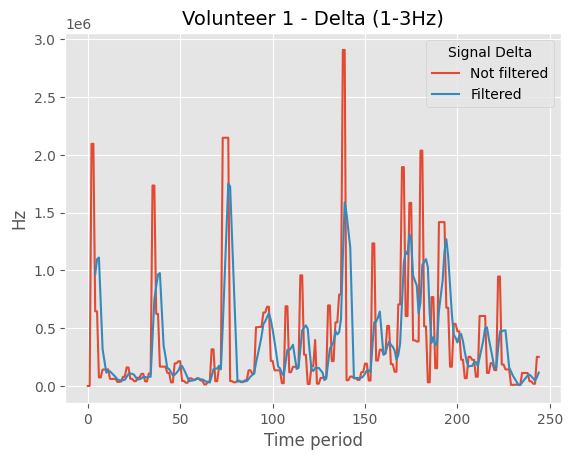

In [525]:
signalSeries = volunteer1Table['Delta (1-3Hz)']
movingAverages = signalSeries.rolling(window_size).mean()

plt.plot(signalSeries, label='Not filtered')
plt.plot(movingAverages, label='Filtered')
plt.legend(title='Signal Delta')
plt.xlabel('Time period', fontsize=12)
plt.ylabel('Hz', fontsize=12)
plt.title('Volunteer 1 - Delta (1-3Hz)', fontsize=14)
plt.show()


In [526]:
delta_N = len(signalSeries)
delta_N


245

In [527]:
# get the sampling rate
delta_sr = 245 / 123.63 
delta_sr


1.9817196473347893

In [528]:
delta_X = DFT(signalSeries)
delta_X

array([ 9.07498760e+07       +0.j        ,
       -1.08795522e+07+18680341.05179049j,
       -1.40634491e+07 -1951637.77182075j,
        6.28928002e+06 -9111026.53929468j,
        7.86543873e+06 -5717890.10883275j,
       -4.17374658e+06+13610544.12548422j,
        2.41700380e+06 -2904526.96178566j,
        2.13324086e+07 -7166819.8283573j ,
       -6.29458961e+06-14601506.26763402j,
        6.46561706e+06 -4858333.17482457j,
        9.30788294e+06 +1540230.53607641j,
        3.65169545e+06 -9847079.97474227j,
       -1.40495575e+07+16365683.70496877j,
        1.74086127e+07-13681874.20648337j,
        1.25892241e+07 -5334702.67870894j,
       -1.03002066e+07 -2720569.83043739j,
        7.70296754e+06 -3889022.19647527j,
       -6.99020687e+06 -6172488.07127962j,
       -7.04524539e+06 -8263038.46742673j,
        3.87796916e+06 +8053839.85279304j,
        7.71880548e+06 -5588986.82902852j,
       -1.96135825e+06-10436190.57447393j,
       -5.89957327e+06-11902399.58372625j,
        1.9

In [529]:
# calculate the frequency
delta_n = np.arange(delta_N)
delta_n


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [530]:
delta_T = delta_N/delta_sr
delta_T


123.63

In [531]:
delta_freq = delta_n/delta_T
delta_freq

array([0.        , 0.00808865, 0.0161773 , 0.02426595, 0.03235461,
       0.04044326, 0.04853191, 0.05662056, 0.06470921, 0.07279786,
       0.08088652, 0.08897517, 0.09706382, 0.10515247, 0.11324112,
       0.12132977, 0.12941843, 0.13750708, 0.14559573, 0.15368438,
       0.16177303, 0.16986168, 0.17795034, 0.18603899, 0.19412764,
       0.20221629, 0.21030494, 0.21839359, 0.22648225, 0.2345709 ,
       0.24265955, 0.2507482 , 0.25883685, 0.2669255 , 0.27501416,
       0.28310281, 0.29119146, 0.29928011, 0.30736876, 0.31545741,
       0.32354606, 0.33163472, 0.33972337, 0.34781202, 0.35590067,
       0.36398932, 0.37207797, 0.38016663, 0.38825528, 0.39634393,
       0.40443258, 0.41252123, 0.42060988, 0.42869854, 0.43678719,
       0.44487584, 0.45296449, 0.46105314, 0.46914179, 0.47723045,
       0.4853191 , 0.49340775, 0.5014964 , 0.50958505, 0.5176737 ,
       0.52576236, 0.53385101, 0.54193966, 0.55002831, 0.55811696,
       0.56620561, 0.57429427, 0.58238292, 0.59047157, 0.59856

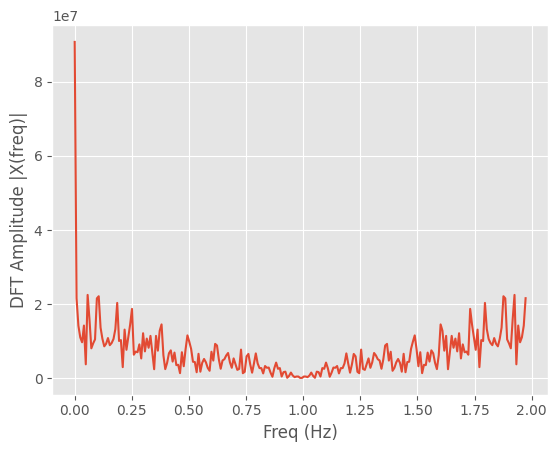

In [532]:
plt.plot(delta_freq, abs(delta_X))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


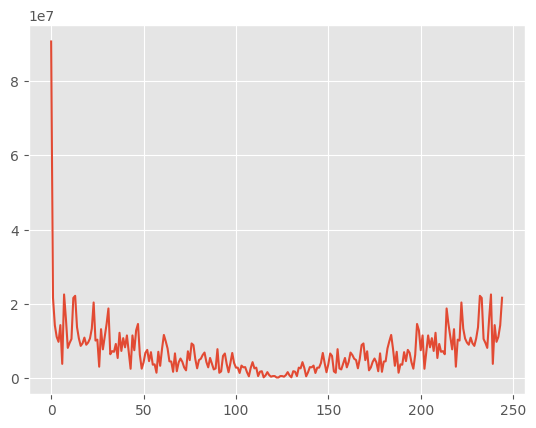

In [533]:
# improve the plot by adding periods in number of seconds rather than  frequency
results = pd.DataFrame({'freq': delta_freq, 'nspectrum': abs(delta_X)})
results['period'] = results['freq'] / (1 / 123.63)
plt.plot(results['period'], results['nspectrum'])


We can see from here that the output of the DFT is symmetric at half of the sampling rate (we can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate.



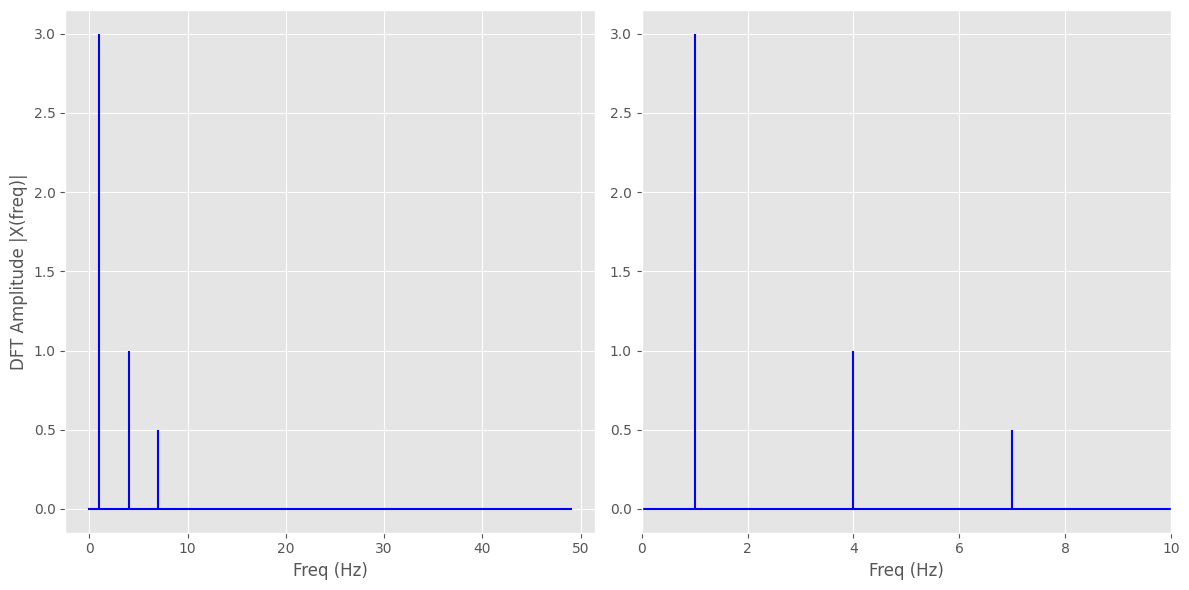

In [534]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency 1 Hz, 4 Hz, and 7 Hz, with amplitude 3, 1, 0.5 as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.



Delta signal first half of DFT signal:

In [535]:
delta_n_oneside = delta_N//2
delta_n_oneside

122

In [536]:
delta_f_oneside = delta_freq[:delta_n_oneside]
delta_f_oneside


array([0.        , 0.00808865, 0.0161773 , 0.02426595, 0.03235461,
       0.04044326, 0.04853191, 0.05662056, 0.06470921, 0.07279786,
       0.08088652, 0.08897517, 0.09706382, 0.10515247, 0.11324112,
       0.12132977, 0.12941843, 0.13750708, 0.14559573, 0.15368438,
       0.16177303, 0.16986168, 0.17795034, 0.18603899, 0.19412764,
       0.20221629, 0.21030494, 0.21839359, 0.22648225, 0.2345709 ,
       0.24265955, 0.2507482 , 0.25883685, 0.2669255 , 0.27501416,
       0.28310281, 0.29119146, 0.29928011, 0.30736876, 0.31545741,
       0.32354606, 0.33163472, 0.33972337, 0.34781202, 0.35590067,
       0.36398932, 0.37207797, 0.38016663, 0.38825528, 0.39634393,
       0.40443258, 0.41252123, 0.42060988, 0.42869854, 0.43678719,
       0.44487584, 0.45296449, 0.46105314, 0.46914179, 0.47723045,
       0.4853191 , 0.49340775, 0.5014964 , 0.50958505, 0.5176737 ,
       0.52576236, 0.53385101, 0.54193966, 0.55002831, 0.55811696,
       0.56620561, 0.57429427, 0.58238292, 0.59047157, 0.59856

In [537]:
delta_X_oneside = delta_X[:delta_n_oneside]/delta_n_oneside
delta_X_oneside

array([ 7.43851443e+05     +0.j        , -8.91766574e+04+153117.54960484j,
       -1.15274173e+05 -15997.03091656j,  5.15514756e+04 -74680.54540405j,
        6.44708092e+04 -46867.95171174j, -3.42110375e+04+111561.83709413j,
        1.98115066e+04 -23807.59804742j,  1.74855808e+05 -58744.4248226j ,
       -5.15949968e+04-119684.47760356j,  5.29968612e+04 -39822.40307233j,
        7.62941225e+04 +12624.84045964j,  2.99319299e+04 -80713.77028477j,
       -1.15160308e+05+134144.94840138j,  1.42693547e+05-112146.50988921j,
        1.03190361e+05 -43727.07113696j, -8.44279226e+04 -22299.7527085j ,
        6.31390782e+04 -31877.23111865j, -5.72967777e+04 -50594.16451869j,
       -5.77479130e+04 -67729.8235035j ,  3.17866324e+04 +66015.0807606j ,
        6.32688973e+04 -45811.36745105j, -1.60767070e+04 -85542.54569241j,
       -4.83571580e+04 -97560.65232562j,  1.62457920e+05 -37486.52195839j,
       -8.25526124e+04   -975.16034492j, -7.51827000e+04 +38591.65200018j,
        1.38477133e+04 -2

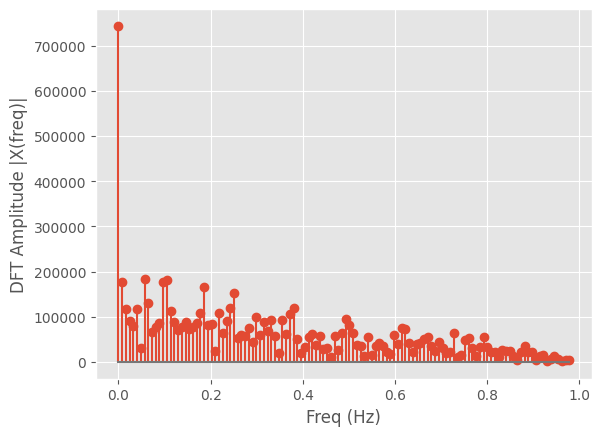

In [538]:
plt.stem(delta_f_oneside, abs(delta_X_oneside))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.show()

By plotting the first half of the DFT results we can see clear peaks at different frequencies with different amplitudes. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.

In [539]:
# improve the plot by adding periods in number of weeks rather than  frequency
results = pd.DataFrame(
    {'freq': delta_f_oneside, 'nspectrum': abs(delta_X_oneside)})
results['period'] = results['freq'] / (1 / 123.63)
results


freq      nspectrum  period
0    0.000000  743851.442623     0.0
1    0.008089  177193.284917     1.0
2    0.016177  116378.863732     2.0
3    0.024266   90745.459918     3.0
4    0.032355   79706.274154     4.0
..        ...            ...     ...
117  0.946372   12698.103401   117.0
118  0.954461    6099.269377   118.0
119  0.962550    2645.127535   119.0
120  0.970638    3975.999687   120.0
121  0.978727    3982.112609   121.0

[122 rows x 3 columns]

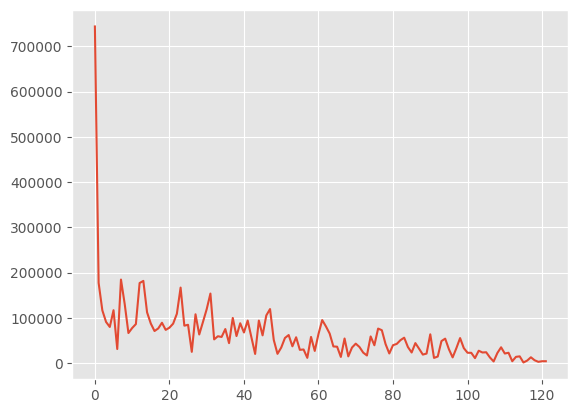

In [540]:
plt.plot(results['period'], results['nspectrum'])


#### The limit of DFT

The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.



We can write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.



In [541]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0, 1, ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x


In [542]:
# sampling rate = 2000
sr = 2000
%timeit DFT(gen_sig(sr))


565 ms ± 68.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [543]:
# sampling rate 20000
sr = 20000
# %timeit DFT(gen_sig(sr))


We can see that, with the number of data points increasing, we can use a lot of computation time with this DFT. Luckily, the Fast Fourier Transform (FFT) was popularized by Cooley and Tukey in their 1965 paper that solve this problem efficiently.


#### Fast Fourier Transform (FFT) 

The Fast Fourier Transform (FFT) is an efficient algorithm to calculate the DFT of a sequence. It is described first in Cooley and Tukey’s classic paper in 1965, but the idea actually can be traced back to Gauss’s unpublished work in 1805. It is a divide and conquer algorithm that recursively breaks the DFT into smaller DFTs to bring down the computation. As a result, it successfully reduces the complexity of the DFT from 𝑂(𝑛2) to 𝑂(𝑛𝑙𝑜𝑔𝑛), where 𝑛 is the size of the data. This reduction in computation time is significant especially for data with large 𝑁, therefore, making FFT widely used in engineering, science and mathematics. The FFT algorithm is the Top 10 algorithm of 20th century by the journal Computing in Science & Engineering.

#### Symmetries in the DFT

The answer to how FFT speedup the computing of DFT lies in the exploitation of the symmetries in the DFT. Let’s take a look of the symmetries in the DFT. From the definition of the DFT equation



<img src="./symmetries_in_DFT_1.png"/>

we can calculate the



<img src="./symmetries_in_DFT_2.png"/>

Note that, 𝑒−𝑖2𝜋𝑛=1, therefore, we have

<img src="./symmetries_in_DFT_3.png"/>

with a little extension, we can have



<img src="./symmetries_in_DFT_4.png"/>


This means that within the DFT, we clearly have some symmetries that we can use to reduce the computation.



#### Tricks in FFT

Since we know there are symmetries in the DFT, we can consider to use it reduce the computation, because if we need to calculate both 𝑋𝑘 and 𝑋𝑘+𝑁, we only need to do this once. This is exactly the idea behind the FFT. Cooley and Tukey showed that we can calculate DFT more efficiently if we continue to divide the problem into smaller ones. Let’s first divide the whole series into two parts, i.e. the even number part and the odd number part:


<img src="./tricks_in_FFT.png"/>

We can see that, the two smaller terms which only have half of the size (𝑁2) in the above equation are two smaller DFTs. For each term, the 0≤𝑚≤𝑁2, but 0≤𝑘≤𝑁, therefore, we can see that half of the values will be the same due to the symmetry properties we described above. Thus, we only need to calculate half of the fields in each term. Of course, we don’t need to stop here, we can continue to divide each term into half with the even and odd values until it reaches the last two numbers, then calculation will be really simple.


This is how FFT works using this recursive approach. Let’s see a quick and dirty implementation of the FFT. Note that, the input signal to FFT should have a length of power of 2. If the length is not, usually we need to fill up zeros to the next power of 2 size.

In [544]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
            np.exp(-2j*np.pi*np.arange(N) / N)

        X = np.concatenate(
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X


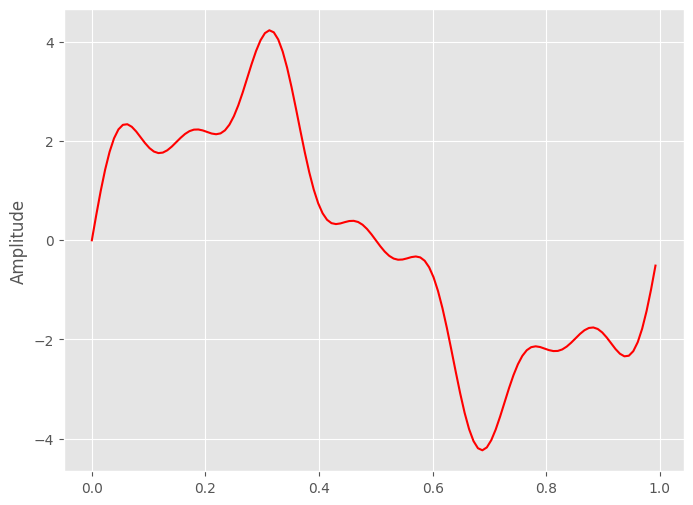

In [545]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5 * np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


Let us use the FFT function to calculate the Fourier transform of the above signal. We will plot the amplitude spectrum for both the two-sided and one-side frequencies.

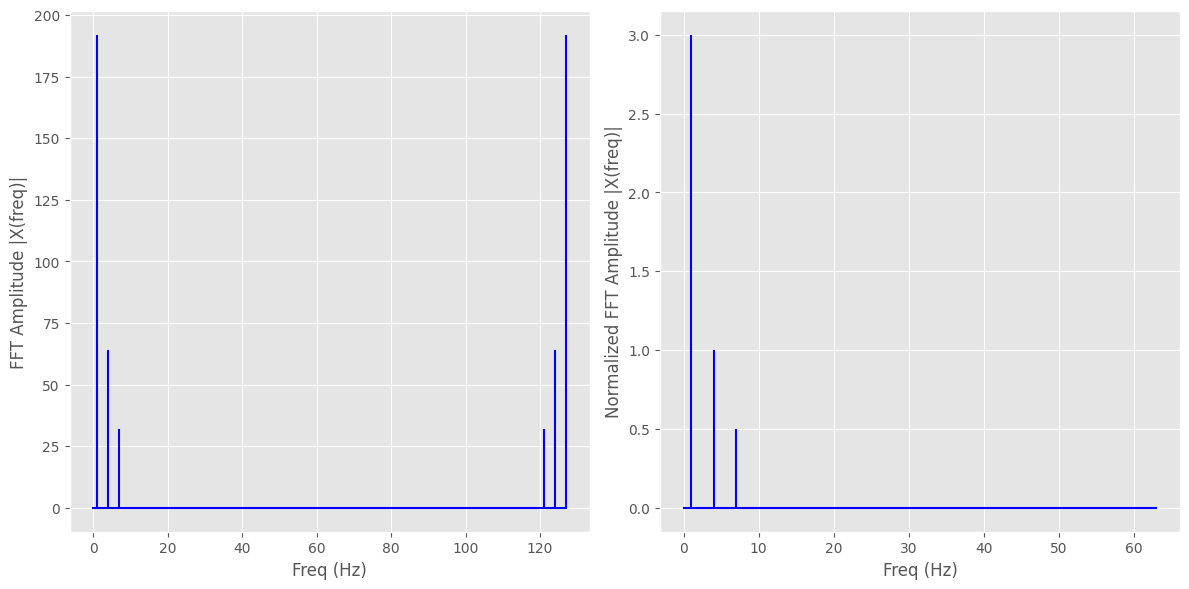

In [546]:
X = FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()


Let us now generate a simple signal for length 2048, and time how long it will run the FFT and compare the speed with the DFT.

In [547]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0, 1, ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x


In [548]:
# sampling rate = 2048
sr = 2048
%timeit FFT(gen_sig(sr))


78.3 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can see that, for a signal with length 2048 (about 2000), this implementation of FFT uses 16.9 ms instead of 120 ms using DFT. Note that, there are also a lot of ways to optimize the FFT implementation which will make it faster. We are now going to take a look at the Python built-in FFT functions, which will be much faster.


In Python, there are very mature FFT functions both in numpy and scipy.

Let’s first generate the signal as before.


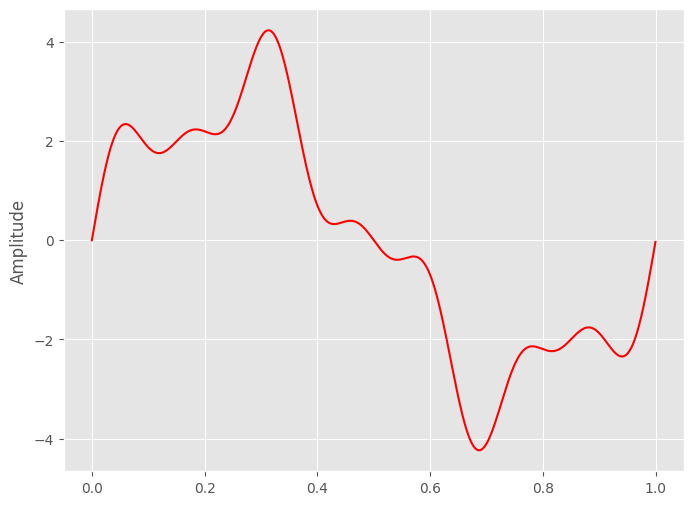

In [549]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5 * np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


#### FFT in Numpy

Let use fft and ifft function from numpy to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Then we will plot both results and time the fft function using this 2000 length signal.

C:\Users\Viktor_Shevchuk\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


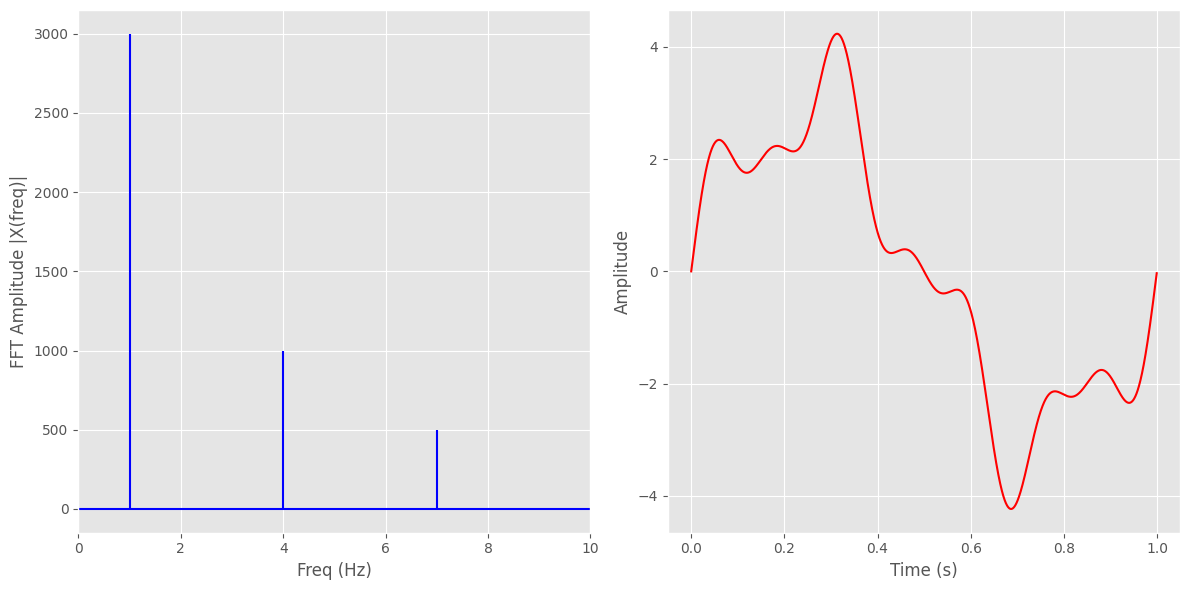

In [550]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [551]:
%timeit fft(x)


68 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Let us do the same for the Delta signal of the first volunteer:

In [552]:
from numpy.fft import fft, ifft

delta_X = fft(signalSeries)
delta_X

array([ 9.07498760e+07       +0.j        ,
       -1.08795522e+07+18680341.05179048j,
       -1.40634491e+07 -1951637.77182075j,
        6.28928002e+06 -9111026.53929467j,
        7.86543873e+06 -5717890.10883274j,
       -4.17374658e+06+13610544.12548422j,
        2.41700380e+06 -2904526.96178567j,
        2.13324086e+07 -7166819.8283573j ,
       -6.29458961e+06-14601506.26763403j,
        6.46561706e+06 -4858333.17482453j,
        9.30788294e+06 +1540230.53607643j,
        3.65169545e+06 -9847079.97474227j,
       -1.40495575e+07+16365683.70496872j,
        1.74086127e+07-13681874.20648333j,
        1.25892241e+07 -5334702.6787089j ,
       -1.03002066e+07 -2720569.83043741j,
        7.70296754e+06 -3889022.19647522j,
       -6.99020687e+06 -6172488.07127965j,
       -7.04524539e+06 -8263038.46742672j,
        3.87796916e+06 +8053839.852793j  ,
        7.71880548e+06 -5588986.82902852j,
       -1.96135825e+06-10436190.57447396j,
       -5.89957327e+06-11902399.5837262j ,
        1.9

In [553]:
delta_N = len(delta_X)
delta_N

245

In [554]:
delta_n = np.arange(delta_N)
delta_n

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [555]:
delta_T = delta_N / delta_sr
delta_T


123.63

In [556]:
delta_freq = delta_n / delta_T
delta_freq

array([0.        , 0.00808865, 0.0161773 , 0.02426595, 0.03235461,
       0.04044326, 0.04853191, 0.05662056, 0.06470921, 0.07279786,
       0.08088652, 0.08897517, 0.09706382, 0.10515247, 0.11324112,
       0.12132977, 0.12941843, 0.13750708, 0.14559573, 0.15368438,
       0.16177303, 0.16986168, 0.17795034, 0.18603899, 0.19412764,
       0.20221629, 0.21030494, 0.21839359, 0.22648225, 0.2345709 ,
       0.24265955, 0.2507482 , 0.25883685, 0.2669255 , 0.27501416,
       0.28310281, 0.29119146, 0.29928011, 0.30736876, 0.31545741,
       0.32354606, 0.33163472, 0.33972337, 0.34781202, 0.35590067,
       0.36398932, 0.37207797, 0.38016663, 0.38825528, 0.39634393,
       0.40443258, 0.41252123, 0.42060988, 0.42869854, 0.43678719,
       0.44487584, 0.45296449, 0.46105314, 0.46914179, 0.47723045,
       0.4853191 , 0.49340775, 0.5014964 , 0.50958505, 0.5176737 ,
       0.52576236, 0.53385101, 0.54193966, 0.55002831, 0.55811696,
       0.56620561, 0.57429427, 0.58238292, 0.59047157, 0.59856

In [557]:
delta_time_series = volunteer1Table["Record Time (Records each 0.5s)"]
delta_time_series


0        0.505302
1        1.008255
2        1.511114
3        2.014117
4        2.516871
          ...    
240    121.192700
241    121.695600
242    122.198500
243    122.701300
244    123.204300
Name: Record Time (Records each 0.5s), Length: 245, dtype: float64

In [558]:
delta_t = delta_time_series.to_numpy()
delta_t


array([  0.5053025,   1.008255 ,   1.511114 ,   2.014117 ,   2.516871 ,
         3.019786 ,   3.522626 ,   4.025524 ,   4.528333 ,   5.031263 ,
         5.533982 ,   6.036999 ,   6.539821 ,   7.042625 ,   7.545503 ,
         8.048374 ,   8.551463 ,   9.054103 ,   9.557018 ,  10.05998  ,
        10.5628   ,  11.06561  ,  11.56841  ,  12.07135  ,  12.57419  ,
        13.07709  ,  13.57992  ,  14.08282  ,  14.58562  ,  15.08843  ,
        15.59142  ,  16.09428  ,  16.59717  ,  17.09999  ,  17.60291  ,
        18.10571  ,  18.6085   ,  19.11139  ,  19.61427  ,  20.11718  ,
        20.61999  ,  21.12293  ,  21.62578  ,  22.12855  ,  22.63156  ,
        23.13434  ,  23.63729  ,  24.14005  ,  24.64289  ,  25.14574  ,
        25.64856  ,  26.15143  ,  26.6544   ,  27.1572   ,  27.66021  ,
        28.16299  ,  28.66589  ,  29.16865  ,  29.67162  ,  30.17437  ,
        30.67735  ,  31.18016  ,  31.68297  ,  32.18583  ,  32.68885  ,
        33.1917   ,  33.69452  ,  34.19748  ,  34.70016  ,  35.2

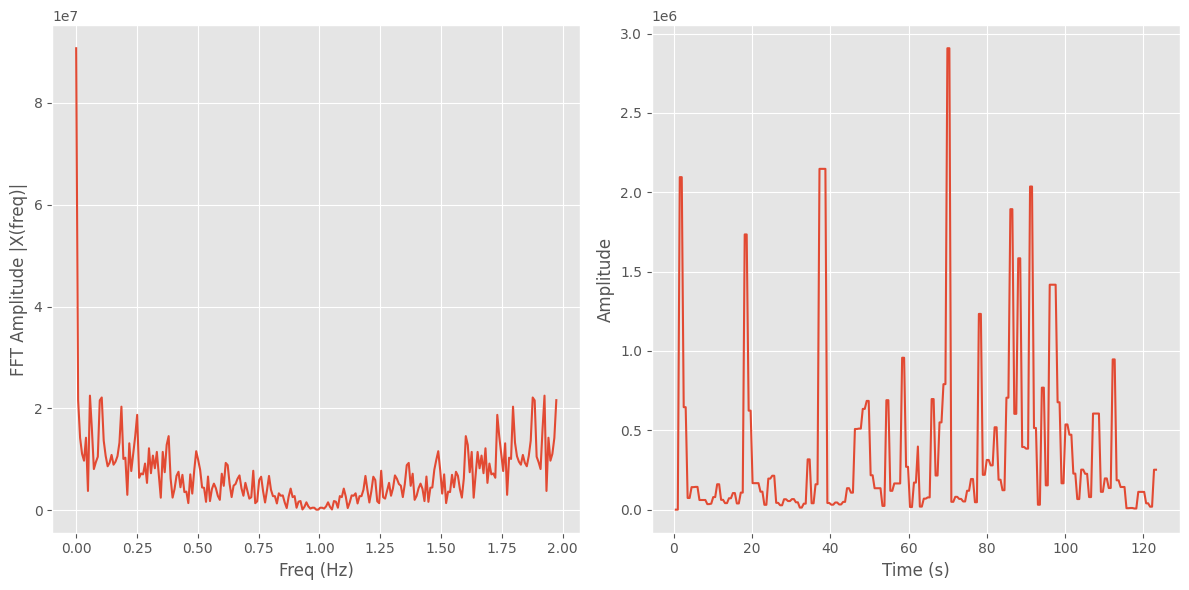

In [559]:
plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.plot(delta_freq, np.abs(delta_X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(122)
plt.plot(delta_t, ifft(delta_X))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


#### FFT in Scipy

Now let use fft and ifft function from scipy to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Then we will plot both results and time the fft function using this 2000 length signal.

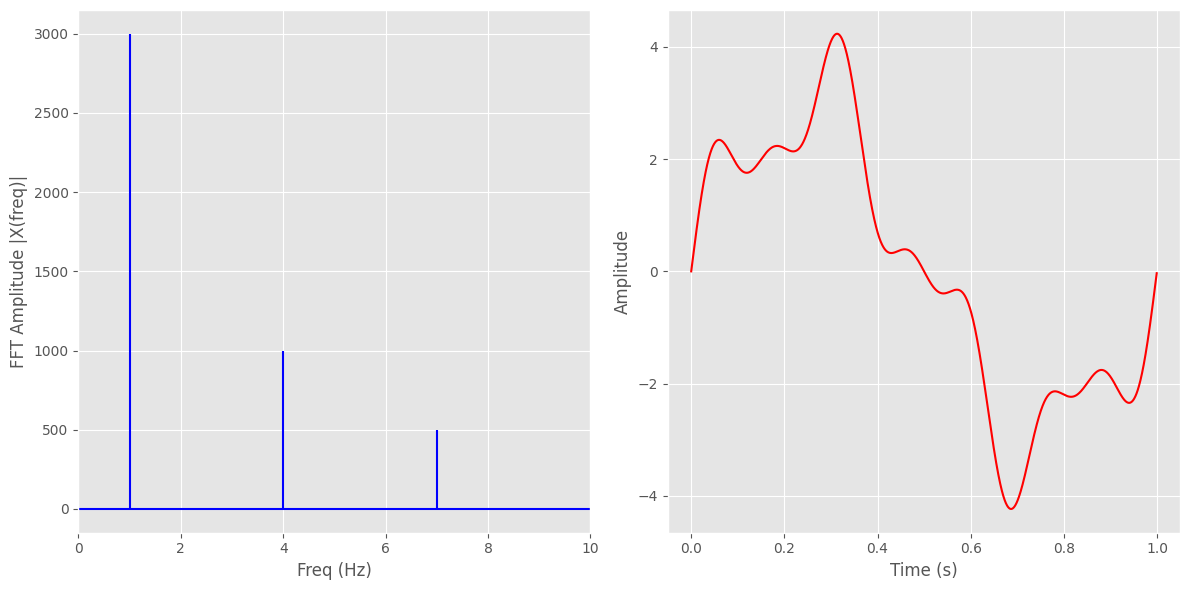

In [560]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [561]:
%timeit fft(x)


50.7 µs ± 5.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Now we can see that the built-in fft functions are much faster and easy to use, especially for the scipy version. Here is the results for comparison:

Implemented DFT: ~120 ms

Implemented FFT: ~16 ms

Numpy FFT: ~40 µs

Scipy FFT: ~12 µs



Delta signal using Scipy FFT:

In [562]:
from scipy.fftpack import fft, ifft

delta_X = fft(signalSeries)
delta_X

array([ 9.07498760e+07       -0.j        ,
       -1.08795522e+07+18680341.05179048j,
       -1.40634491e+07 -1951637.77182075j,
        6.28928002e+06 -9111026.53929467j,
        7.86543873e+06 -5717890.10883273j,
       -4.17374658e+06+13610544.12548422j,
        2.41700380e+06 -2904526.96178567j,
        2.13324086e+07 -7166819.82835729j,
       -6.29458961e+06-14601506.26763404j,
        6.46561706e+06 -4858333.17482453j,
        9.30788294e+06 +1540230.53607642j,
        3.65169545e+06 -9847079.97474227j,
       -1.40495575e+07+16365683.70496872j,
        1.74086127e+07-13681874.20648333j,
        1.25892241e+07 -5334702.6787089j ,
       -1.03002066e+07 -2720569.83043742j,
        7.70296754e+06 -3889022.19647523j,
       -6.99020687e+06 -6172488.07127965j,
       -7.04524539e+06 -8263038.46742672j,
        3.87796916e+06 +8053839.852793j  ,
        7.71880548e+06 -5588986.82902852j,
       -1.96135825e+06-10436190.57447396j,
       -5.89957327e+06-11902399.5837262j ,
        1.9

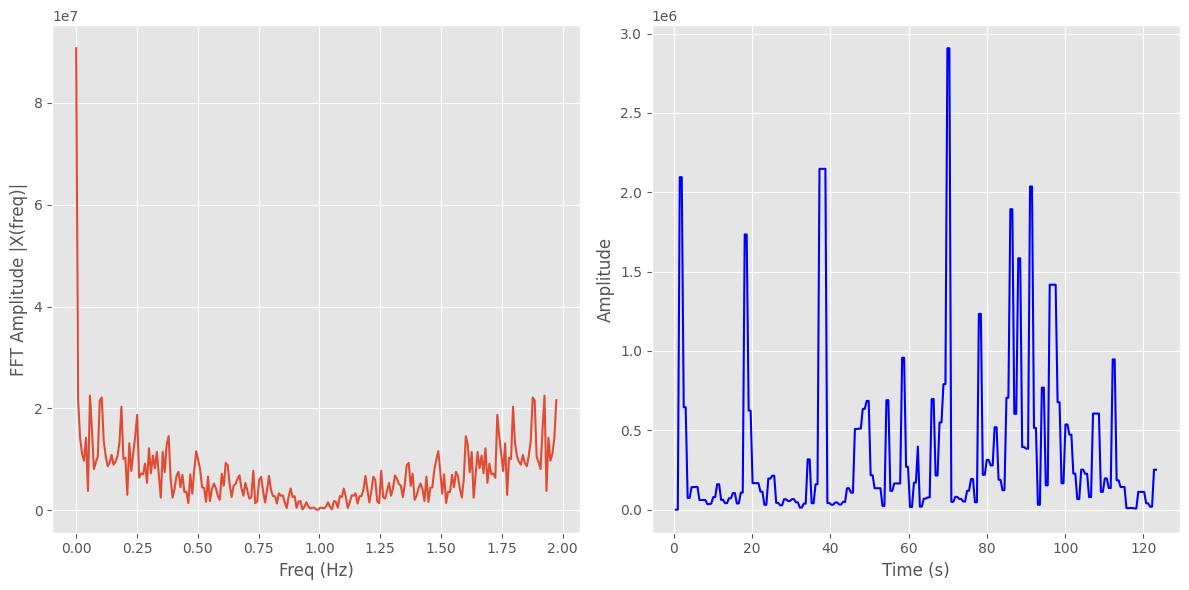

In [563]:
plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.plot(delta_freq, np.abs(delta_X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(122)
plt.plot(delta_t, ifft(delta_X), 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


Finally, let’s put all of this together and work on our reactions to
stimuli data set.


We’ll walk through a Fast Fourier Transform with NumPy code and see how to execute and interpret it. At the end, we’ll compare the result with a function that is specifically made for decomposing time series, so that we can see whether we did it right.


Let’s have a look at the data by creating a plot.


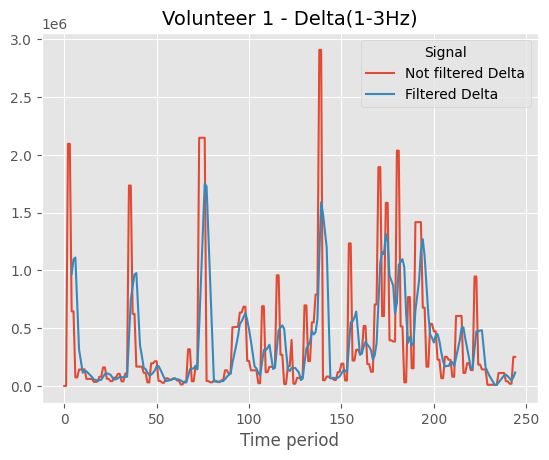

In [564]:
volunteer1Table = volunteersDictionary["Volunteer 1"]
signalSeries = volunteer1Table['Delta (1-3Hz)']
movingAverages = signalSeries.rolling(window_size).mean()

plt.plot(signalSeries, label='Not filtered Delta')
plt.plot(movingAverages, label='Filtered Delta')
plt.legend(title='Signal')
plt.xlabel('Time period', fontsize=12)
plt.title(f'{"Volunteer 1"} - {"Delta(1-3Hz)"}', fontsize=14)
plt.show()


Text(0.5, 0, 's')

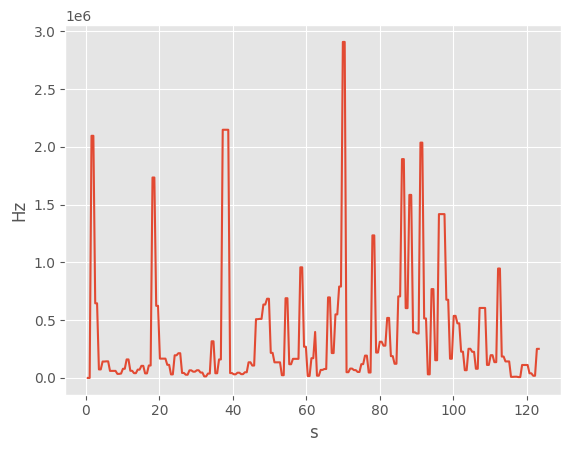

In [565]:
# convert into x and y
x = volunteer1Table['Record Time (Records each 0.5s)']
y = volunteer1Table['Delta (1-3Hz)']

# plot the Delta data
fig = plt.figure()
plt.plot(x, y)
plt.ylabel('Hz')
plt.xlabel('s')


Here we just obtain a graph that shows a trend over time and a seasonality if it present.



Let’s now apply the fast Fourier transform and plot the result. As expected, we now obtain a plot of strength per frequency:


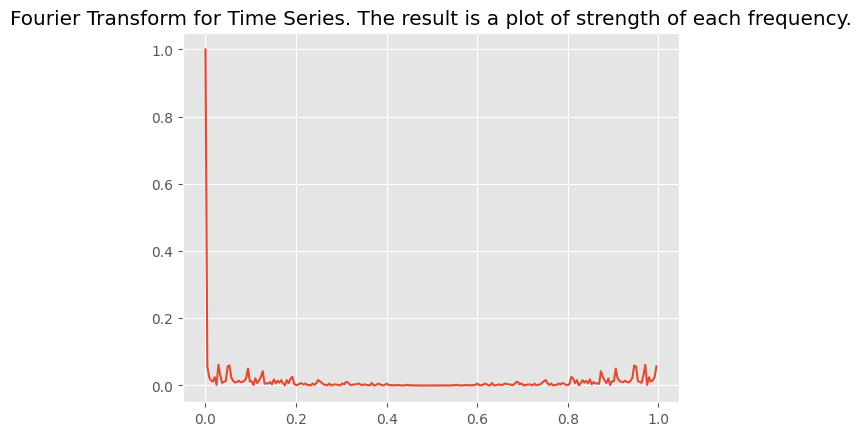

In [566]:
import numpy as np
from scipy.fftpack import fft, ifft

# apply fast fourier transform and take absolute values
f = abs(fft(y))

# get the list of frequencies
num = np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum = f.real*f.real+f.imag*f.imag
nspectrum = spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.title('Fourier Transform for Time Series. The result is a plot of strength of each frequency.')

plt.plot(freq, nspectrum)


The reason why we are seeing peaks with negative amplitudes in the frequency spectrum is because the Fourier transform is a measure for the correlation of the cosine at that frequency with the signal. Since a correlation can be negative (indicating a 180 degree phase shift) we can also have negative amplitudes in the frequency spectrum.



How come the frequency spectrum is mirrored at the center? Euler’s identity tells us that the cosine can be written as cos k = 0.5*e^{ik} +0.5*e^{-ik}. For a real valued signal, this becomes cos (2*pi*f*t) = 0.5e^{i*2*pi*f*t} + 0.5e^{-i*2*pi*f*t}, where the first term corresponds with negative and the second term with positive frequencies. Usually the positive frequencies increase up to the Nyquist frequency and after the Nyquist frequency we will see the negative frequencies which are a mirror image (complex conjugated) of the positive ones. This means that if the we have time-series which only contains real-values (which it usually does), the FFT will be perfectly symmetric around the center / nyquist frequency. That is why we are seeing a ‘duplicate’ frequency spectrum mirrored around the center.



The large peak at zero frequency is the DC component in the signal. As we know, the period is inversely proportional to the frequency; T = 1 / f. So, high frequencies f correspond with small periods T and low frequencies with large period values. The lower we go in frequency, the larger the period T becomes. In fact, a frequency f of zero corresponds with a period T of infinite. So if the result of the FFT contains a large peak at zero frequency, this means that we have a component in the signal with an infinite period, i.e. a component which is simply a flat line. This means that we have a bias offset in the signal and the average y-value in our signal is not zero. This is called the DC component of the signal.

To better understand what we are looking at, let’s replace the frequencies by the time period. We convert from frequency to time period using the following code:


In [567]:
# improve the plot by adding periods in number of rows rather than  frequency
results = pd.DataFrame(
    {'freq': freq, 'nspectrum': nspectrum})
results


freq  nspectrum
0    0.000000   1.000000
1    0.004082   0.056744
2    0.008163   0.024478
3    0.012245   0.014883
4    0.016327   0.011482
..        ...        ...
240  0.979592   0.024609
241  0.983673   0.011482
242  0.987755   0.014883
243  0.991837   0.024478
244  0.995918   0.056744

[245 rows x 2 columns]

In [568]:
# 123.63 seconds
results['period'] = results['freq'] / (1 / 123.63)
results


freq  nspectrum      period
0    0.000000   1.000000    0.000000
1    0.004082   0.056744    0.504612
2    0.008163   0.024478    1.009224
3    0.012245   0.014883    1.513837
4    0.016327   0.011482    2.018449
..        ...        ...         ...
240  0.979592   0.024609  121.106939
241  0.983673   0.011482  121.611551
242  0.987755   0.014883  122.116163
243  0.991837   0.024478  122.620776
244  0.995918   0.056744  123.125388

[245 rows x 3 columns]

We will now obtain an x-axis that has the period in time records - 123 seconds:


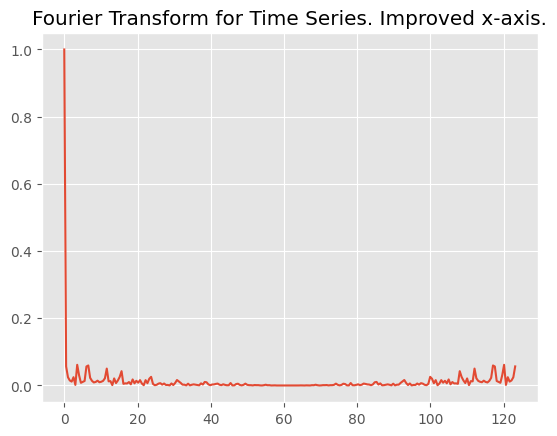

In [569]:
plt.title('Fourier Transform for Time Series. Improved x-axis.')
plt.plot(results['period'], results['nspectrum'])


In this final plot, we clearly see a huge peak at the beginning: this one we ignore as it is not relevant. The peak at the end however is the peak at 120 seconds: this is the peak that shows us that a seasonality of period 123 seconds is present.

As a final step, I want to show a better way to do the time series decomposition. The following code shows how to do a decomposition using statsmodels:



We need to import statsmodels which has a tsa (time series analysis) package as well as the seasonal_decompose() function we need:


In [570]:
x = volunteer1Table['Delta (1-3Hz)'].set_axis(
    (volunteer1Table['Record Time (Records each 0.5s)'])
)
x


Record Time (Records each 0.5s)
0.505302            0
1.008255            0
1.511114      2095216
2.014117      2095216
2.516871       645745
               ...   
121.192700      40028
121.695600      18717
122.198500      18717
122.701300     251586
123.204300     251586
Name: Delta (1-3Hz), Length: 245, dtype: int64

The advantage of this is that you get a fast and pretty result in one execution, as follows:



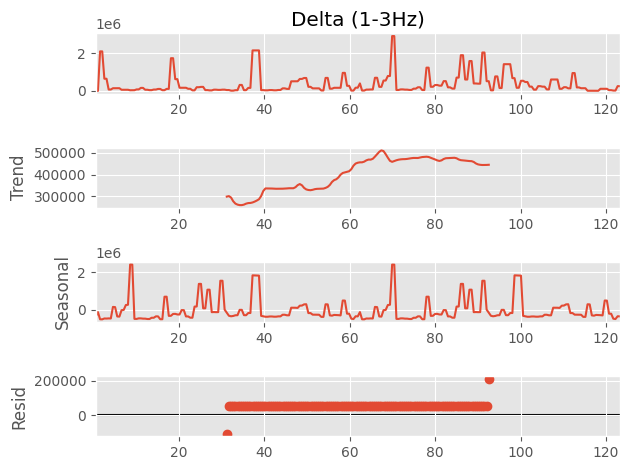

In [571]:
# use the seasonal_decompose function to observe the same conclusion
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(x=x, period=int(len(x) / 2))
resplot = res.plot()


Now we have a much clearer plot showing us the trend and the seasonality following a regular pattern.



We can also plot the trend alongside the observed time series.

We plot our dataset (blue color) using the time of the dataframe as x-axis and the value of our signal for the y-axis.

We did the same for the trend observations which we plotted in orange color.



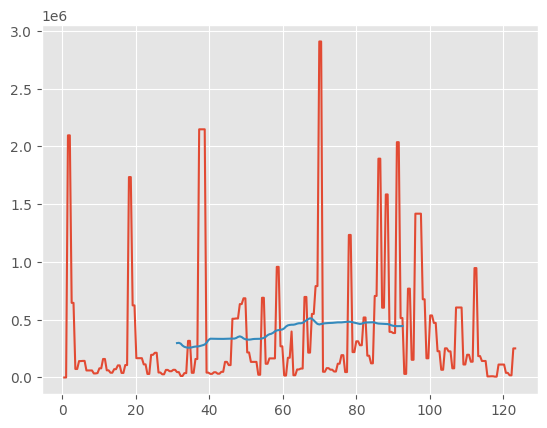

In [572]:
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(x.index, x)
plt.plot(res.trend.index, res.trend)


We can see the trend is going up against the individual video observations.



Now we will explore the delta signal of the first volunteer using one-sided spectrum.

As from the plotted time series, it is hard to tell there are some patterns behind the data, let us transform the data into frequency domain and see if there is anything interesting.



In [573]:
delta_sr = 245 / 123.63
delta_sr


1.9817196473347893

In [574]:
delta_T = delta_N / delta_sr
delta_freq = delta_n / delta_T


In [575]:
# Get the one-sided specturm
delta_n_oneside = delta_N//2
delta_n_oneside


122

In [576]:
# get the one side frequency
delta_f_oneside = delta_freq[:delta_n_oneside]
delta_f_oneside


array([0.        , 0.00808865, 0.0161773 , 0.02426595, 0.03235461,
       0.04044326, 0.04853191, 0.05662056, 0.06470921, 0.07279786,
       0.08088652, 0.08897517, 0.09706382, 0.10515247, 0.11324112,
       0.12132977, 0.12941843, 0.13750708, 0.14559573, 0.15368438,
       0.16177303, 0.16986168, 0.17795034, 0.18603899, 0.19412764,
       0.20221629, 0.21030494, 0.21839359, 0.22648225, 0.2345709 ,
       0.24265955, 0.2507482 , 0.25883685, 0.2669255 , 0.27501416,
       0.28310281, 0.29119146, 0.29928011, 0.30736876, 0.31545741,
       0.32354606, 0.33163472, 0.33972337, 0.34781202, 0.35590067,
       0.36398932, 0.37207797, 0.38016663, 0.38825528, 0.39634393,
       0.40443258, 0.41252123, 0.42060988, 0.42869854, 0.43678719,
       0.44487584, 0.45296449, 0.46105314, 0.46914179, 0.47723045,
       0.4853191 , 0.49340775, 0.5014964 , 0.50958505, 0.5176737 ,
       0.52576236, 0.53385101, 0.54193966, 0.55002831, 0.55811696,
       0.56620561, 0.57429427, 0.58238292, 0.59047157, 0.59856

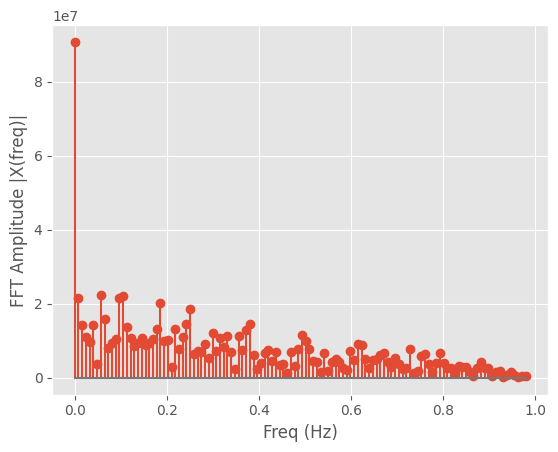

In [577]:

plt.stem(delta_f_oneside, np.abs(delta_X[:delta_n_oneside]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()


We see some clear peaks in the FFT amplitude figure, but it is hard to tell what are they in terms of frequency. Let us plot the results using seconds and then highlight all the videos whick are associated with the peaks.



In [578]:
# convert frequency to second
delta_t_s = delta_f_oneside / (1 / 123.63)
delta_t_s


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121.])

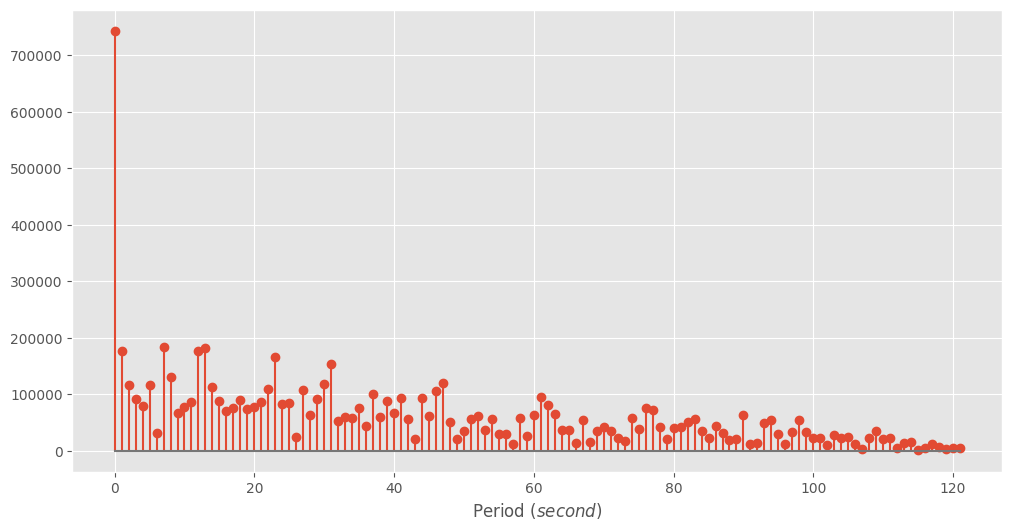

In [579]:
plt.figure(figsize=(12, 6))
plt.stem(delta_t_s, np.abs(delta_X[:delta_n_oneside])/delta_n_oneside)
plt.xlabel('Period ($second$)')
plt.show()


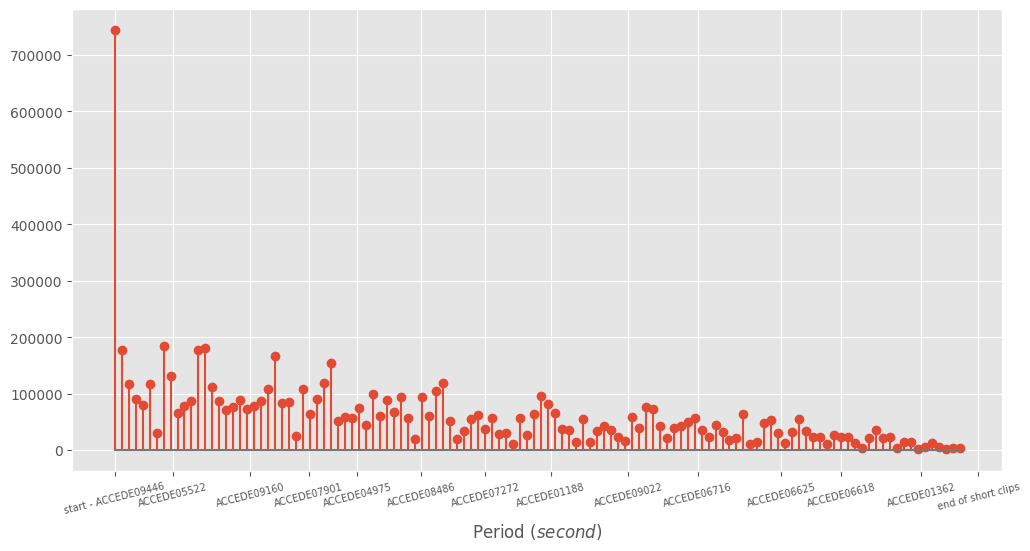

In [580]:
# convert frequency to second
delta_t_s = delta_f_oneside / (1 / 123.63)

plt.figure(figsize=(12, 6))
plt.stem(delta_t_s, np.abs(delta_X[:delta_n_oneside])/delta_n_oneside)
ticks = [
    0, 8.33, 19.43, 27.76, 34.70,
    43.86, 53.06, 62.43, 73.53, 83.46, 95.43, 104, 115.43,  123.63
]
labels = [
    'start - ACCEDE09446', 'ACCEDE05522',
    'ACCEDE09160', 'ACCEDE07901', 'ACCEDE04975', 'ACCEDE08486', 'ACCEDE07272', 'ACCEDE01188', 'ACCEDE09022', 'ACCEDE06716', 'ACCEDE06625', 'ACCEDE06618', 'ACCEDE01362', 'end of short clips'
]
plt.xticks(ticks=ticks, labels=labels, rotation=14, fontsize=7)
plt.xlabel('Period ($second$)')
plt.show()


We can now see some interesting patterns, peaks associate with video clips. These peaks mean that we see some repeating signal every video clip. This makes sense and corresponding to the stimulis in real time. The FFT can help us to understand some of the repeating signal in our physical world.



According to Fourier analysis, any function no matter how complex can be fully described in terms of its Fourier coefficients, i.e. its frequency spectrum. So once we know how the frequency spectrum looks like, we can also use it to forecast the time-series into the future .



 The frequency spectrum can be used to determine whether the time-series contains any seasonal components, at which frequencies these seasonal components occur and how we can separate them.

A time-series can have multiple seasonal components mixed together in the total signal.

Below, we can see the concept of the time vs the frequency domain visualised. We have five sine-waves (blue signals) with frequencies of 6.5, 5, 3, 1.5 and 1 Hz. By combining these signals we form a new composite signal (black). This signal contains all of the five different seasonal signals. The Fourier Transform transforms this signal from the time-domain to the frequency-domain (red signal) and shows us what the frequencies are of the seasonal signals.



<img src="./signals3D.png"/>

A signal (black) consisting of multiple component signals (blue) with different frequencies (red).

So, two or more different signals (with different frequencies, amplitudes, etc) can be mixed together to form a new composite signal. The composite signal then consists of all of its component signals.

Now I want to apply FFT for all of our EEG and frequency
signals.

In [581]:
## course

In [582]:
signalSeries

0            0
1            0
2      2095216
3      2095216
4       645745
        ...   
240      40028
241      18717
242      18717
243     251586
244     251586
Name: Delta (1-3Hz), Length: 245, dtype: int64

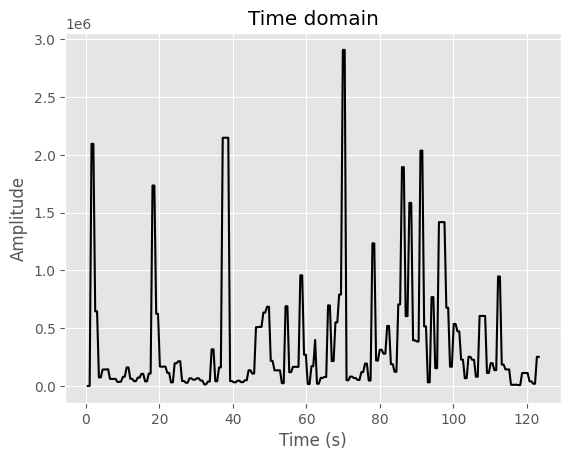

In [583]:
# create the signal
srate = 245/123.63  # hz
time = delta_t  # time vector in seconds
pnts = len(time)  # number of time points
signal = signalSeries

# show the original signal
plt.plot(time, signal, 'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()


In [584]:
# prepare the Fourier transform
fourTime = np.arange(0, pnts)/pnts
fCoefs = np.zeros(len(signal), dtype=complex)

for fi in range(pnts):

    # create complex sine wave
    csw = np.exp(-1j*2*np.pi*fi*fourTime)

    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = sum(signal*csw) / pnts

# extract amplitudes
ampls = 2*abs(fCoefs)
ampls

array([740815.31428571, 176470.0470196 , 115903.84796175,  90375.07028583,
        79380.94242236, 116213.21280474,  30846.10995896, 183707.0194883 ,
       129799.98545945,  66020.38241166,  77015.98244804,  85733.66688473,
       176074.20916083, 180748.3130092 , 111615.337368  ,  86966.84625494,
        70441.08198233,  76125.50243549,  88643.171298  ,  72970.17752867,
        77794.13310907,  86684.8836161 , 108443.09759508, 166046.24992815,
        82221.39880156,  84163.96458889,  24627.53565712, 107272.24628875,
        62810.67883049,  90399.03919841, 118467.11426137, 152892.95874744,
        52022.76963762,  58928.42038655,  57407.77775531,  74769.14947948,
        43773.56073205,  99295.25857036,  59334.61990645,  87551.49859441,
        67245.26990231,  93441.76030684,  56652.1895186 ,  20036.83049463,
        93468.32095709,  60904.31557944, 104790.03020432, 118766.63797644,
        50835.28141755,  20221.94043535,  34000.95533893,  55145.11078477,
        61606.05351327,  

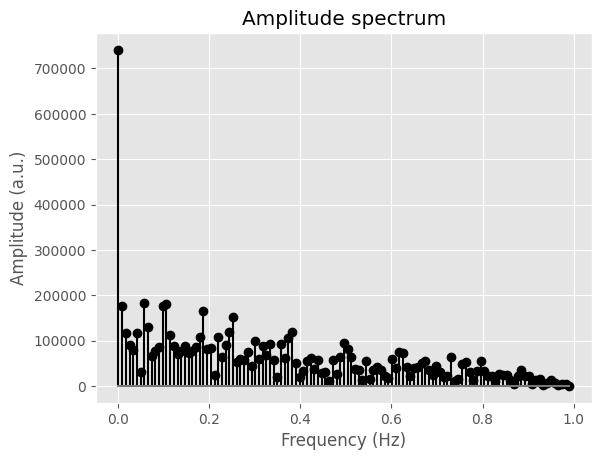

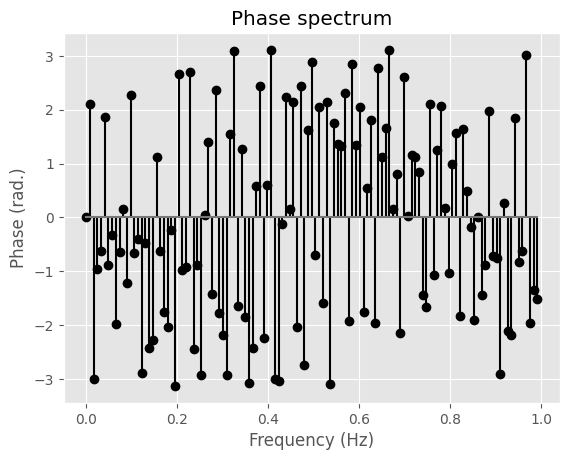

In [585]:
# compute frequencies vector
hz = np.linspace(0, srate/2, int(np.floor(pnts/2)+1))

# plot amplitude
plt.stem(hz, ampls[:len(hz)], 'ks-')

# make plot look a bit nicer
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Amplitude spectrum')
plt.show() 

# plot angles
plt.stem(hz, np.angle(fCoefs[:len(hz)]), 'ks-')

# make plot look a bit nicer
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (rad.)')
plt.title('Phase spectrum')
plt.show()


In [586]:
results = pd.DataFrame({'freq': hz, 'nspectrum': ampls[:len(hz)]})
results


freq      nspectrum
0    0.000000  740815.314286
1    0.008122  176470.047020
2    0.016244  115903.847962
3    0.024365   90375.070286
4    0.032487   79380.942422
..        ...            ...
118  0.958373    6074.374400
119  0.966494    2634.331096
120  0.974616    3959.771117
121  0.982738    3965.859089
122  0.990860     876.866413

[123 rows x 2 columns]

<StemContainer object of 3 artists>

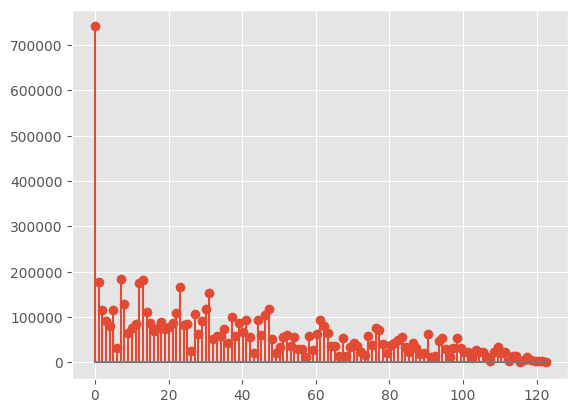

In [587]:
results['period'] = results['freq'] / (1 / 123.63)
plt.stem(results['period'], results['nspectrum'] )


In [588]:
def get_time(time_series):
  return time_series.to_numpy()


In [589]:
def show_fourier(time, signalSeries, ampls, hz, fCoefs, volunteer, signalName):
    fig = plt.figure(figsize=(7, 20))
    gs = fig.add_gridspec(3, hspace=.25)
    axis = gs.subplots()

    axis[0].plot(time, signalSeries)
    axis[0].set_title(f"Time domain - {volunteer} - {signalName}")
    axis[0].set_xlabel('Time (s)')
    axis[0].set_ylabel('Amplitude')

    axis[1].stem(hz, ampls[:len(hz)])
    axis[1].set_title(f'Amplitude spectrum - {volunteer} - {signalName}')
    axis[1].set_xlabel('Frequency (Hz)')
    axis[1].set_ylabel('One-sided FFT Amplitude')

    axis[2].stem(hz, np.angle(fCoefs[:len(hz)]))
    axis[2].set_title(f'Phase spectrum - {volunteer} - {signalName}')
    axis[2].set_xlabel('Frequency (Hz)')
    axis[2].set_ylabel('Phase')

    plt.show()


In [590]:
def create_f_coefs(signal):
    return np.zeros(len(signal), dtype=complex)


In [591]:
def prepare_fourier_transform(pnts, signal, fCoefs):
    fourTime = np.arange(0, pnts)/pnts

    for fi in range(pnts):

        # create complex sine wave
        csw = np.exp(-1j*2*np.pi*fi*fourTime)

        # compute dot product between sine wave and signal
        # these are called the Fourier coefficients
        fCoefs[fi] = sum(signal*csw) / pnts 
    
    return fCoefs


In [592]:
def compute_frequencies_vector(srate, pnts):
    return np.linspace(0, srate/2, int(np.floor(pnts/2)+1))


In [593]:
srate = 245/123.63  # hz

for volunteer in volunteerIndexesList:
    for signalName in EEGAndSignalsList:
        signalSeries = volunteersDictionary[volunteer][signalName]
        time_series = volunteersDictionary[volunteer]["Record Time (Records each 0.5s)"]

        time = get_time(time_series)  # time vector in seconds
        pnts = len(time)  # number of time points

        fCoefs = create_f_coefs(signalSeries)
        fCoefs = prepare_fourier_transform(pnts, signalSeries, fCoefs)
        ampls = 2*abs(fCoefs)  # extract amplitudes

        hz = compute_frequencies_vector(srate, pnts)

        # Uncomment to see the output
        # show_fourier(
        #     time, signalSeries, ampls, hz,
        #     fCoefs, volunteer, signalName
        # )


In [594]:
# experiments
import os
import numpy as np
import pandas as pd
import datetime as dt
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns
from siml.detect_peaks import *
from siml.signal_analysis_utils import *


In [595]:
signalSeries = volunteer1Table['Delta (1-3Hz)']
signalSeries


0            0
1            0
2      2095216
3      2095216
4       645745
        ...   
240      40028
241      18717
242      18717
243     251586
244     251586
Name: Delta (1-3Hz), Length: 245, dtype: int64

In [596]:
x = volunteer1Table['Delta (1-3Hz)'].set_axis(
    (volunteer1Table['Record Time (Records each 0.5s)'])
)

x


Record Time (Records each 0.5s)
0.505302            0
1.008255            0
1.511114      2095216
2.014117      2095216
2.516871       645745
               ...   
121.192700      40028
121.695600      18717
122.198500      18717
122.701300     251586
123.204300     251586
Name: Delta (1-3Hz), Length: 245, dtype: int64

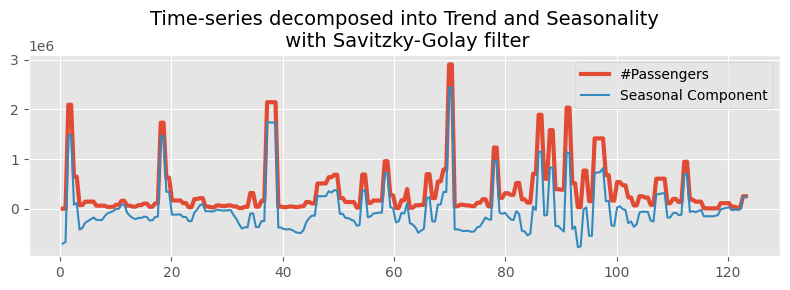

In [597]:
yvalues = x.values
yvalues_trend = savgol_filter(yvalues, 25, 1)
yvalues_seasonal = yvalues-yvalues_trend

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x.index.values, yvalues, label='#Passengers', linewidth=3)
ax.plot(x.index.values, yvalues_seasonal, label='Seasonal Component')
ax.legend()
ax.set_title(
    'Time-series decomposed into Trend and Seasonality\n with Savitzky-Golay filter', fontsize=14)
plt.tight_layout()
plt.show()


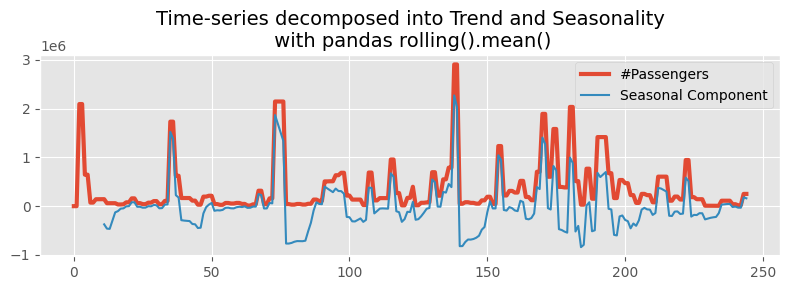

In [598]:
yvalues = x
yvalues_trend = x.rolling(window=12).mean()
yvalues_detrended = yvalues - yvalues_trend
xvalues = range(len(yvalues))

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(xvalues, yvalues, label='#Passengers', linewidth=3)
ax.plot(xvalues, yvalues_detrended, label='Seasonal Component')
ax.legend()
ax.set_title(
    'Time-series decomposed into Trend and Seasonality\n with pandas rolling().mean()', fontsize=14)
plt.tight_layout()
plt.show()


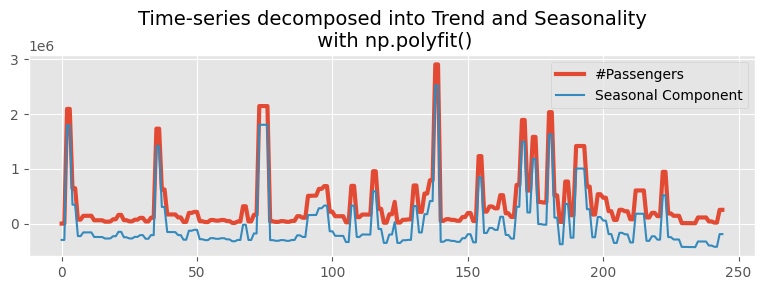

In [599]:
yvalues = x
xvalues = range(len(yvalues))
xvalues_extended = range(-10, 150)

z1 = np.polyfit(xvalues, yvalues, deg=1)
p1 = np.poly1d(z1)
yvalues_trend = p1(xvalues_extended)
yvalues_detrended = yvalues - p1(xvalues)

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(xvalues, yvalues, label='#Passengers', linewidth=3)
ax.plot(xvalues, yvalues_detrended, label='Seasonal Component')
ax.legend()
ax.set_title(
    'Time-series decomposed into Trend and Seasonality\n with np.polyfit()', fontsize=14)
plt.tight_layout()
plt.show()


Size of original time-series: 245 by 1
Size of reshaped array: 245 by 1
Size of reshaped array and averaged array: 245 by 1


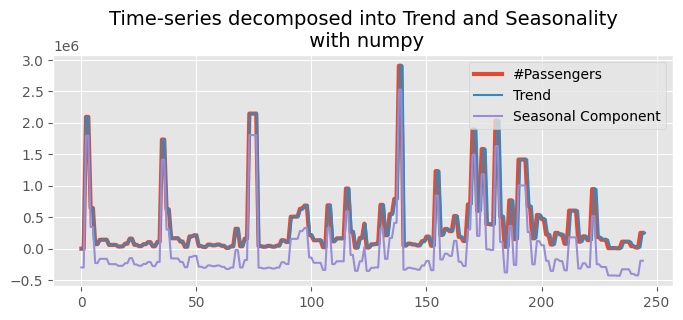

In [600]:
yvalues = x.values
xvalues = range(len(yvalues))
yvalues_reshaped = yvalues.reshape(245, -1)
yvalues_mean = np.nanmean(yvalues_reshaped, axis=1)
xvalues_mean = np.linspace(0, len(yvalues), 245)
print("Size of original time-series: {} by 1".format(*yvalues.shape))
print("Size of reshaped array: {} by {}".format(*yvalues_reshaped.shape))
print("Size of reshaped array and averaged array: {} by 1".format(*yvalues_mean.shape))

fig, ax = plt.subplots(figsize=(8, 3))
ax.set_title(
    'Time-series decomposed into Trend and Seasonality\n with numpy', fontsize=14)
ax.plot(xvalues, yvalues, label='#Passengers', linewidth=3)
ax.plot(xvalues_mean, yvalues_mean, label='Trend')
ax.plot(xvalues, yvalues_detrended, label='Seasonal Component')
ax.legend()
plt.show()


In [601]:
delta_signal_series = volunteer1Table['Delta (1-3Hz)']
delta_signal_series


0            0
1            0
2      2095216
3      2095216
4       645745
        ...   
240      40028
241      18717
242      18717
243     251586
244     251586
Name: Delta (1-3Hz), Length: 245, dtype: int64

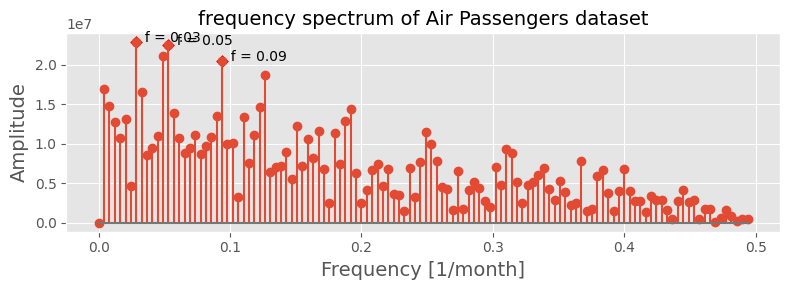

In [602]:
fraction_signal = 1.0
mph = 0.4
deg_polyfit = 1

yvalues = delta_signal_series.values
fft_x, fft_y, p2 = construct_fft(yvalues, deg_polyfit)
#                                 integer_no_only=True, frac=fraction_signal, mph=mph)

indices_peaks = detect_peaks(fft_y, mph=20095216)

fig, ax = plt.subplots(figsize=(8, 3))
ax.stem(fft_x, fft_y)
ax.scatter(fft_x[indices_peaks], fft_y[indices_peaks], color='red', marker='D')
ax.set_title('frequency spectrum of Air Passengers dataset', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Frequency [1/month]', fontsize=14)
for idx in indices_peaks:
    x, y = fft_x[idx], fft_y[idx]
    text = "  f = {:.2f}".format(x, y)
    ax.annotate(text, (x, y))
plt.tight_layout()
plt.show()


#### Practical Task No. 3. Cross-Correlation and Pearson Correlation coefficients and functions

Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of high importance for science and technology, and Python has great tools that you can use to calculate them. SciPy, NumPy, and Pandas correlation methods are fast, comprehensive, and well-documented.



##### Correlation

Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.  

Every dataset we work with uses variables and observations. For example, you might be interested in understanding the following:

- How the height of basketball players is correlated to their shooting accuracy
- Whether there’s a relationship between employee work experience and salary
- What mathematical dependence exists between the population density and the gross domestic product of different countries

In the examples above, the height, shooting accuracy, years of experience, salary, population density, and gross domestic product are the features or variables. The data related to each player, employee, and each country are the observations.

When data is represented in the form of a table, the rows of that table are usually the observations, while the columns are the features. If we take a look at the first volunteer table:

In [603]:
example_df_volunteer_1


Record Time (Records each 0.5s) Date (Experiment Date)  \
0                           0.505302    2020-04-27 13:55:02   
1                           1.008255    2020-04-27 13:55:02   
2                           1.511114    2020-04-27 13:55:02   
3                           2.014117    2020-04-27 13:55:02   
4                           2.516871    2020-04-27 13:55:02   
..                               ...                    ...   
240                       121.192700    2020-04-27 13:55:02   
241                       121.695600    2020-04-27 13:55:02   
242                       122.198500    2020-04-27 13:55:02   
243                       122.701300    2020-04-27 13:55:02   
244                       123.204300    2020-04-27 13:55:02   

     Signal level (0 (perfect) -200 (no signal))  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
..                                           ...   
240                                            0   
241                                            0   
242                                            0   
243                                            0   
244                                            0   

     Attention (0-100% (maximum attention))  \
0                                         0   
1                                         0   
2                                        57   
3                                        57   
4                                        50   
..                                      ...   
240                                      81   
241                                      87   
242                                      87   
243                                     100   
244                                     100   

     Meditation (0-100% (maximum meditation))  Delta (1-3Hz)  Theta (4-7Hz)  \
0                                           0              0              0   
1                                           0              0              0   
2                                          80        2095216         243891   
3                                          80        2095216         243891   
4                                          77         645745          30745   
..                                        ...            ...            ...   
240                                        69          40028          61914   
241                                        69          18717          18632   
242                                        69          18717          18632   
243                                        53         251586          24802   
244                                        53         251586          24802   

     Low Alpha (8-9Hz)  High Alfa (10-12Hz)  Low Beta (13-17Hz)  \
0                    0                    0                   0   
1                    0                    0                   0   
2                75645                39325               44126   
3                75645                39325               44126   
4                 8015                 7933                4479   
..                 ...                  ...                 ...   
240               3618                 7784                3490   
241              11831                 8448               14008   
242              11831                 8448               14008   
243               7367                 2902               19098   
244               7367                 2902               19098   

     High Beta (18-30Hz)  Low Gama (31-40Hz)  High Gama (41-50Hz)  \
0                      0                   0                    0   
1                      0                   0                    0   
2                  50714               44850                26796   
3                  50714    

We see that in this table, each row represents one observation, or the data about one volunteer. Each column shows one property or feature (delta, theta and so on) for all the time points.



If you analyze any two features of a dataset, then you’ll find some type of correlation between those two features. Let's consider the following figures:
<img src="./correlation.webp"/>

Each of these plots shows one of three different forms of correlation:



1. Negative correlation (red dots): In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

2. Weak or no correlation (green dots): The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

3. Positive correlation (blue dots): In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.

When we’re analyzing correlation, we should always have in mind that correlation does not indicate causation. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

There are several statistics that you can use to quantify correlation. I will show two correlation coefficients:
- Cross-correlation
- Pearson’s r

Cross-correlation is a basic signal processing method, which is used to analyze the similarity between two signals with different lags. Not only can we get an idea of how well the two signals match with each other, but we also get the point of time or an index, where they are the most similar.

Whenever we need to find similarities between two signals, datasets, or functions, cross-correlation is one of the tools that we should try.

Below we can see an illustration of the cross-correlation between sine and cosine functions. Unsurprisingly, the maximum is when the phase of the functions (lag) is off by 3π / 2, which is the delay that makes the two signals overlap.


<img src="./cross-correlation-1.gif"/>
<p>Cross-correlation between sine & cosine function.</p>

Cross-correlation has tons of applications. Investors use it to check how two stocks or assets perform against each other.  In time series analysis, it can be used to find the time delays between two series.  



##### Cross-correlation definition


Cross correlation is a way to measure the degree of similarity between a time series and a lagged version of another time series.

It is the correlation between two signals on different delays (lags).  

The definition is quite simple, you just overlap the two signals with given delay. We can write this for real-valued discrete signals as

<img src="./cross-correlation-2.png"/>


It is also called the sliding inner product, because, for a given delay, it is basically an inner product of the two signals.



In [604]:
low_alpha_signal_series = volunteer1Table["Low Alpha (8-9Hz)"]
delta_signal_series = volunteer1Table['Delta (1-3Hz)']


In [605]:
corr = (len(low_alpha_signal_series) - len(delta_signal_series) + 1) * [0]
corr[0]

0

In [606]:
for l in range(len(corr)):
    corr[l] = sum([low_alpha_signal_series[i+l] * delta_signal_series[i]
                  for i in range(len(delta_signal_series))])

print(corr[0])


4259944306594


In [607]:
import numpy as np

corr = np.correlate(a=low_alpha_signal_series, v=delta_signal_series)

print(corr[0])


4259944306594


Suppose we have the following time series in Python that show the total marketing spend (in thousands) for a certain company along with the the total revenue (in thousands) during 12 consecutive months:

In [608]:
import numpy as np

#define data
marketing = np.array([3, 4, 5, 5, 7, 9, 13, 15, 12, 10, 8, 8])
revenue = np.array([21, 19, 22, 24, 25, 29, 30, 34, 37, 40, 35, 30])


We can calculate the cross correlation for every lag between the two time series by using the ccf() function from the statsmodels package as follows:



In [609]:
import statsmodels.api as sm

# calculate cross correlation
sm.tsa.stattools.ccf(marketing, revenue, adjusted=False)


array([ 0.77109358,  0.46238654,  0.19352232, -0.06066296, -0.28159595,
       -0.44531104, -0.49159463, -0.35783655, -0.15697476, -0.03430078,
        0.01587722,  0.0070399 ])

Here’s how to interpret this output:

The cross correlation at lag 0 is 0.771.
The cross correlation at lag 1 is 0.462.
The cross correlation at lag 2 is 0.194.
The cross correlation at lag 3 is -0.061.
And so on.

Notice that the correlation between the two time series becomes less and less positive as the number of lags increases. This tells us that marketing spend during a given month is quite predictive of revenue one or two months later, but not predictive of revenue beyond more than two months.



This intuitively makes sense – we would expect that high marketing spend during a given month is predictive of increased revenue during the next two months, but not necessarily predictive of revenue several months into the future.

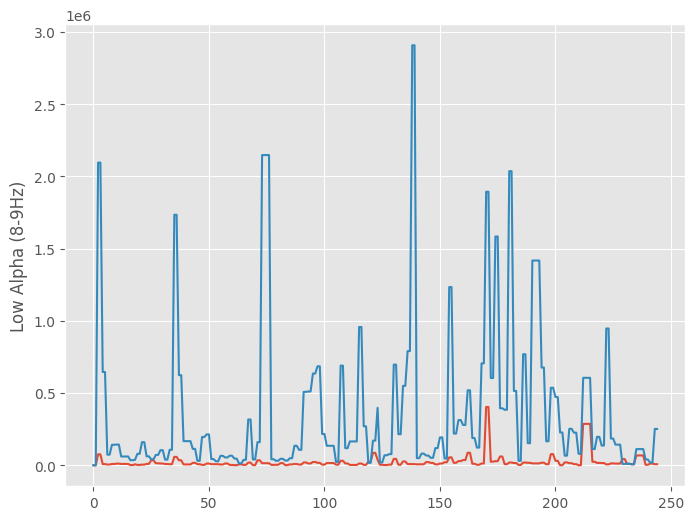

In [610]:
fig = plt.figure(figsize=(8, 6))
sns.lineplot(data=low_alpha_signal_series)
sns.lineplot(data=delta_signal_series,)
plt.show()


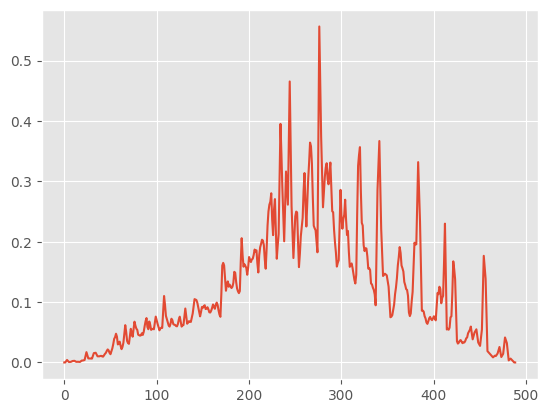

In [611]:
import numpy as np
a = low_alpha_signal_series
b = delta_signal_series
norm_a = np.linalg.norm(a)
a = a / norm_a
norm_b = np.linalg.norm(b)
b = b / norm_b
c = np.correlate(a, b, mode='full')
plt.plot(c)

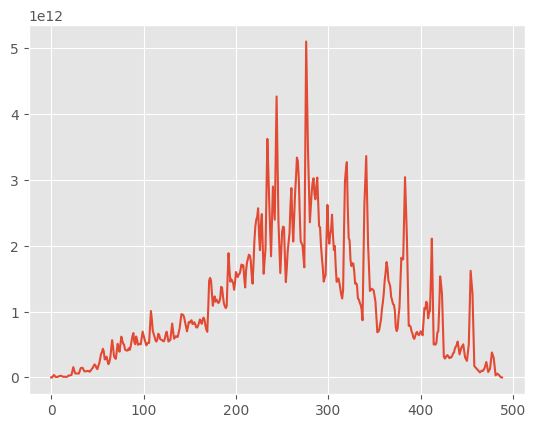

In [612]:
import scipy.signal
x = low_alpha_signal_series
y = delta_signal_series
Z = scipy.signal.correlate(x, y)
plt.plot(Z)


In [613]:
''' Python only implementation '''

# Pre-allocate correlation array
corr = (len(low_alpha_signal_series) - len(delta_signal_series) + 1) * [0]

# Go through lag components one-by-one
for l in range(len(corr)):
    corr[l] = sum([low_alpha_signal_series[i+l] * delta_signal_series[i]
                  for i in range(len(delta_signal_series))])

print(corr[0])


4259944306594


In [614]:
''' Numpy implementation '''

import numpy as np

corr = np.correlate(a=low_alpha_signal_series, v=delta_signal_series)

print(corr[0])


4259944306594


Our signals contain data sampled uniformly in time.

Let us start with the correlation coefficient between two independent signal series. We will make an ensemble of series, and find the PDF of the correlation coefficient as the normalized histogram of correlation coefficients for all pairs. We can calculate the correlation coefficient using different functions:





In [615]:
x = low_alpha_signal_series
y = delta_signal_series

# With correlate:
# We must remove the means.
cc1 = np.correlate(x - x.mean(), y - y.mean())[0]
# And we must normalize by the number of points
# and the product of the standard deviations.
cc1 /= (len(x) * x.std() * y.std())

# with corrcoef:
cc2 = np.corrcoef(x, y)[0, 1]

print(cc1, cc2)


0.3003824501034516 0.3016135257186299


"Crosscorrelation" is correlation between two series of the same length, with or without lags. "Correlation coefficient" is a normalized correlation.

##### Correlation coefficient

In [616]:
x = low_alpha_signal_series
y = delta_signal_series

# With correlate:
# We must remove the means.
cc1 = np.correlate(x - x.mean(), y - y.mean())[0]
# And we must normalize by the number of points
# and the product of the standard deviations.
cc1 /= (len(x) * x.std() * y.std())

print(cc1)


0.3003824501034516


Let us now calculate cross-correlation between Frequency, Blink strength, EEG, Attention, Meditation signal for each pair of signals. I will prepare a table with maximums of correlation coefficients.

In [617]:
def correlate(x, y):
    # With correlate:
    # We must remove the means.
    cc = np.correlate(x - x.mean(), y - y.mean())[0]
    # And we must normalize by the number of points
    # and the product of the standard deviations.
    cc /= (len(x) * x.std() * y.std())

    return cc


In [618]:
signalsList


['Attention (0-100% (maximum attention))',
 'Meditation (0-100% (maximum meditation))',
 'Blink Strength (0-255 (maximum))',
 'Delta (1-3Hz)',
 'Theta (4-7Hz)',
 'Low Alpha (8-9Hz)',
 'High Alfa (10-12Hz)',
 'Low Beta (13-17Hz)',
 'High Beta (18-30Hz)',
 'Low Gama (31-40Hz)',
 'High Gama (41-50Hz)',
 'RAW EEG (Voltage)']

In [619]:
volunteerIndexesList


['Volunteer 1',
 'Volunteer 2',
 'Volunteer 3',
 'Volunteer 4',
 'Volunteer 5',
 'Volunteer 6',
 'Volunteer 7',
 'Volunteer 8',
 'Volunteer 9',
 'Volunteer 10']

In [620]:
correlationCoefficients = {}

for volunteer in volunteerIndexesList:
    for i in range(len(signalsList)):
        for j in range(i + 1, len(signalsList)):
            signalNameA = signalsList[i]
            signalNameB = signalsList[j]
            signalA = volunteersDictionary[volunteer][signalNameA]
            signalB = volunteersDictionary[volunteer][signalNameB]
            corrCoefficient = correlate(signalA, signalB)

            if not volunteer in correlationCoefficients:
                correlationCoefficients[volunteer] = []

            valueKeyName = corrCoefficient
            corrCoefficientBetweenSignals = {
                'signal A': signalNameA, 'signal B': signalNameB,  'value': corrCoefficient
            }
            correlationCoefficients[volunteer].append(
                corrCoefficientBetweenSignals
            )

print(correlationCoefficients)

{'Volunteer 1': [{'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Meditation (0-100% (maximum meditation))', 'value': 0.27139792798600554}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Blink Strength (0-255 (maximum))', 'value': -0.13970073936028468}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Delta (1-3Hz)', 'value': 0.046333242267206066}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Theta (4-7Hz)', 'value': -0.04451081377303478}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Low Alpha (8-9Hz)', 'value': 0.0579730938883458}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'High Alfa (10-12Hz)', 'value': -0.017333169299119905}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Low Beta (13-17Hz)', 'value': 0.036708463156160755}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'High Beta (18-30Hz)', 'value': 0.23928753011

In [621]:
sortedCorrelationCoefficients = {}
for volunteer, corrCoefBetweenSignalsList in correlationCoefficients.items():
    sortedCorrCoefBetweenSignalsList = sorted(
        corrCoefBetweenSignalsList,
        key=lambda x: abs(x['value'])
    )

    if not volunteer in sortedCorrelationCoefficients:
        sortedCorrelationCoefficients[volunteer] = sortedCorrCoefBetweenSignalsList

print(sortedCorrelationCoefficients)

{'Volunteer 1': [{'signal A': 'Meditation (0-100% (maximum meditation))', 'signal B': 'Low Alpha (8-9Hz)', 'value': -0.0026569659011209507}, {'signal A': 'Meditation (0-100% (maximum meditation))', 'signal B': 'Blink Strength (0-255 (maximum))', 'value': 0.008991418147528232}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'High Alfa (10-12Hz)', 'value': -0.017333169299119905}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'RAW EEG (Voltage)', 'value': 0.01787067049526302}, {'signal A': 'Blink Strength (0-255 (maximum))', 'signal B': 'RAW EEG (Voltage)', 'value': 0.02167515175687557}, {'signal A': 'Meditation (0-100% (maximum meditation))', 'signal B': 'RAW EEG (Voltage)', 'value': 0.023936982079502532}, {'signal A': 'Blink Strength (0-255 (maximum))', 'signal B': 'Delta (1-3Hz)', 'value': 0.03584287855840181}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Low Beta (13-17Hz)', 'value': 0.036708463156160755}, {'signal A': 'D

In [622]:
largestCorrCoefficientsList = []

for volunteerName in sortedCorrelationCoefficients:
    sortedCorrCoefficientsOfVolunteer = sortedCorrelationCoefficients[volunteerName]
    secondTheLargestCorrCoeff, firstTheLargestCorrCoeff = sortedCorrCoefficientsOfVolunteer[
        -2:]

    largestCorrCoeffsOfVolunteer = {}
    if not volunteerName in largestCorrCoeffsOfVolunteer:
        largestCorrCoeffsOfVolunteer[volunteerName] = {
            'First the Largest Corr Coeff': firstTheLargestCorrCoeff, 'Second the Largest Corr Coeff': secondTheLargestCorrCoeff
        }

    largestCorrCoefficientsList.append(largestCorrCoeffsOfVolunteer)

largestCorrCoefficientsList


[{'Volunteer 1': {'First the Largest Corr Coeff': {'signal A': 'Low Gama (31-40Hz)',
    'signal B': 'High Gama (41-50Hz)',
    'value': 0.8559210569309855},
   'Second the Largest Corr Coeff': {'signal A': 'High Beta (18-30Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': 0.818650445252274}}},
 {'Volunteer 2': {'First the Largest Corr Coeff': {'signal A': 'Low Gama (31-40Hz)',
    'signal B': 'High Gama (41-50Hz)',
    'value': 0.7766227967264817},
   'Second the Largest Corr Coeff': {'signal A': 'High Beta (18-30Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': 0.6795264493883216}}},
 {'Volunteer 3': {'First the Largest Corr Coeff': {'signal A': 'Delta (1-3Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': 0.8242803143215369},
   'Second the Largest Corr Coeff': {'signal A': 'High Alfa (10-12Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': 0.7662104125678397}}},
 {'Volunteer 4': {'First the Largest Corr Coeff': {'signal A': 'High Alfa (10-12Hz)',
    'sign

In [623]:
iterableOfPandasObjects = []

for i, largestCorrCoefficient in enumerate(largestCorrCoefficientsList):
    volunteer = f"Volunteer {i+1}"
    firstKey = f'First the Largest Corr Coeff of {volunteer}'
    secondKey = f'Second the Largest Corr Coeff of {volunteer}'
    largestCorrCoefficientOfVolunteer = largestCorrCoefficient[volunteer]
    d = {}
    if not firstKey in d:
        d[firstKey] = largestCorrCoefficientOfVolunteer['First the Largest Corr Coeff']
    if not secondKey in d:
        d[secondKey] = largestCorrCoefficientOfVolunteer['Second the Largest Corr Coeff']

    df = pd.DataFrame(d)
    iterableOfPandasObjects.append(df)

pd.concat(iterableOfPandasObjects, axis="columns", join="inner")


First the Largest Corr Coeff of Volunteer 1  \
signal A                          Low Gama (31-40Hz)   
signal B                         High Gama (41-50Hz)   
value                                       0.855921   

         Second the Largest Corr Coeff of Volunteer 1  \
signal A                          High Beta (18-30Hz)   
signal B                           Low Gama (31-40Hz)   
value                                         0.81865   

         First the Largest Corr Coeff of Volunteer 2  \
signal A                          Low Gama (31-40Hz)   
signal B                         High Gama (41-50Hz)   
value                                       0.776623   

         Second the Largest Corr Coeff of Volunteer 2  \
signal A                          High Beta (18-30Hz)   
signal B                           Low Gama (31-40Hz)   
value                                        0.679526   

         First the Largest Corr Coeff of Volunteer 3  \
signal A                               Delta (1-3Hz)   
signal B                          Low Gama (31-40Hz)   
value                                        0.82428   

         Second the Largest Corr Coeff of Volunteer 3  \
signal A                          High Alfa (10-12Hz)   
signal B                           Low Gama (31-40Hz)   
value                                         0.76621   

         First the Largest Corr Coeff of Volunteer 4  \
signal A                         High Alfa (10-12Hz)   
signal B                          Low Beta (13-17Hz)   
value                                       0.832569   

         Second the Largest Corr Coeff of Volunteer 4  \
signal A                           Low Gama (31-40Hz)   
signal B                          High Gama (41-50Hz)   
value                                        0.727312   

         First the Largest Corr Coeff of Volunteer 5  \
signal A                         High Beta (18-30Hz)   
signal B                          Low Gama (31-40Hz)   
value                                        0.90934   

         Second the Largest Corr Coeff of Volunteer 5  \
signal A                          High Alfa (10-12Hz)   
signal B                          High Beta (18-30Hz)   
value                                        0.848852   

         First the Largest Corr Coeff of Volunteer 6  \
signal A                         High Beta (18-30Hz)   
signal B                          Low Gama (31-40Hz)   
value                                       0.827633   

         Second the Largest Corr Coeff of Volunteer 6  \
signal A                                Theta (4-7Hz)   
signal B                            Low Alpha (8-9Hz)   
value                                        0.806775   

         First the Largest Corr Coeff of Volunteer 7  \
signal A                         High Beta (18-30Hz)   
signal B                         High Gama (41-50Hz)   
value                                       0.817486   

         Second the Largest Corr Coeff of Volunteer 7  \
signal A                           Low Gama (31-40Hz)   
signal B                          High Gama (41-50Hz)   
value                                        0.785328   

         First the Largest Corr Coeff of Volunteer 8  \
signal A                         High Beta (18-30Hz)   
signal B                          Low Gama (31-40Hz)   
value                                       0.821543   

         Second the Largest Corr Coeff of Volunteer 8  \
signal A                          High Beta (18-30Hz)   
signal B                          High Gama (41-50Hz)   
value                                        0.793248   

         First the Largest Corr Coeff of Volunteer 9  \
signal A                         High Beta (18-30Hz)   
signal B                          Low Gama (31-40Hz)   
value                                       0.676936   

         Second the Largest Corr Coeff of Volunteer 9  \
signal A                                Theta (4-7Hz)   
signal B                           Low

##### Cross correlation

The calculation is straightforward; the main point of confusion is the definition of the lag. Let's experiment with two time series, each with a sinusoid plus some noise. The first, y1, reaches its maximum value 1/4 cycle after the second one, y2. Therefore y1 lags y2, or y2 leads y1. Unfortunately, there is no single convention for defining the cross-covariance or cross-correlation; Jenkins and Watts (1968) use one convention, and Emery and Thompson (2001) use the opposite. The np.correlate() function matches Emery and Thompson; we will use that one.

max correlation is at lag 32


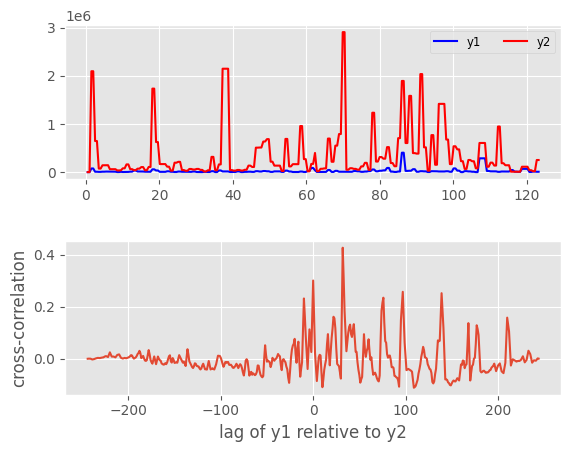

In [624]:
npts = 245
x = volunteer1Table["Record Time (Records each 0.5s)"]
y1 = low_alpha_signal_series
y2 = delta_signal_series

lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)


This can all get quite confusing. The red curve, y2, peaks to the left of y1. Doesn't that mean it lags y1? No, it leads. Think of yourself moving forward in time, to the right along the x-axis. As you slide along, you see the red curve peak before the blue.



To summarize: with the calculation done as above, a positive lag means the first series lags the second, or the second leads the first--peaks earlier in time, so at a location to the left on the time series plot.



##### Let us visualize 2 correlation functions with the highest Correlation coefficients for every volunteer.

In [625]:
def visualizeLargestCorrCoeff(corrCoeff, volunteer):
    npts = 245
    x = volunteersDictionary[volunteer]["Record Time (Records each 0.5s)"]
    signalAName = corrCoeff['signal A']
    signalBName = corrCoeff['signal B']
    y1 = volunteersDictionary[volunteer][signalAName]
    y2 = volunteersDictionary[volunteer][signalBName]

    lags = np.arange(-npts + 1, npts)
    ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
    ccor = ccov / (npts * y1.std() * y2.std())

    fig, axs = plt.subplots(nrows=2)
    fig.subplots_adjust(hspace=0.4)
    ax = axs[0]
    ax.set_title(volunteer)
    ax.plot(x, y1, 'b', label=signalAName)
    ax.plot(x, y2, 'r', label=signalBName)
    ax.legend(loc='upper right', fontsize='small', ncol=2)

    ax = axs[1]
    ax.plot(ccor)
    ax.set_ylabel('cross-correlation')
    ax.set_xlabel(f'lag of {signalAName} relative to {signalBName}')
    maxlag = lags[np.argmax(ccor)]
    ax.set_title("max correlation is at lag %d" % maxlag)


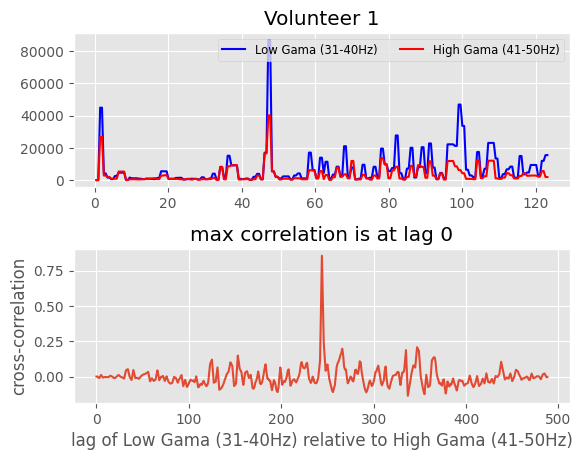

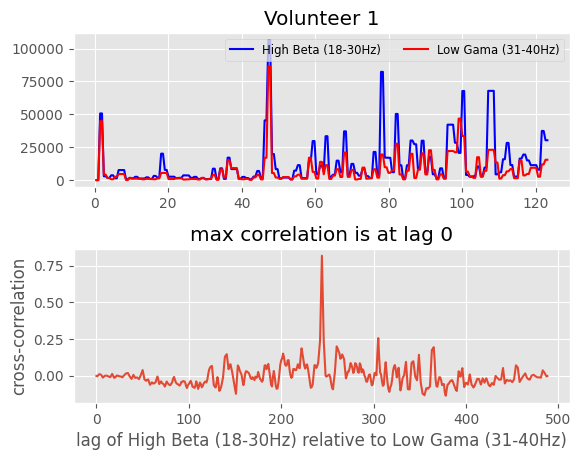

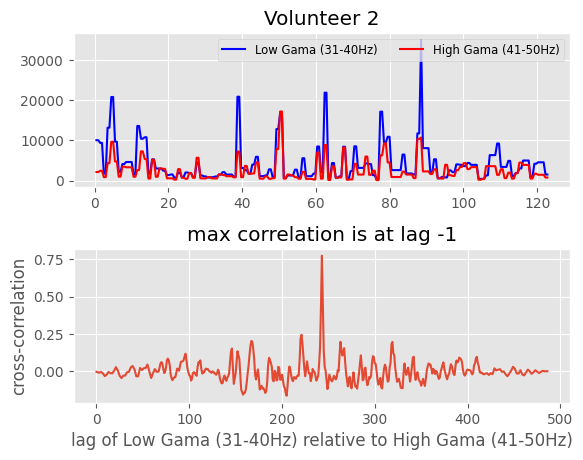

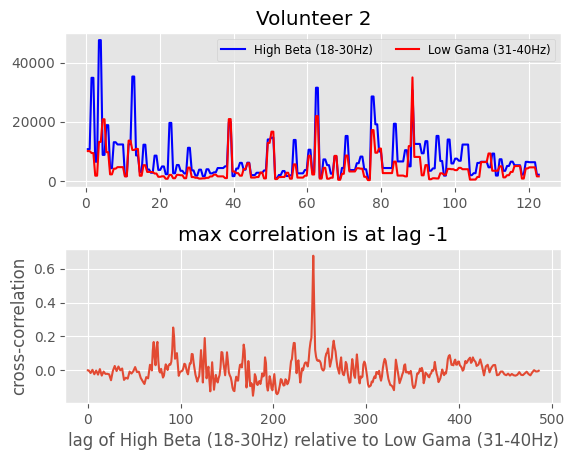

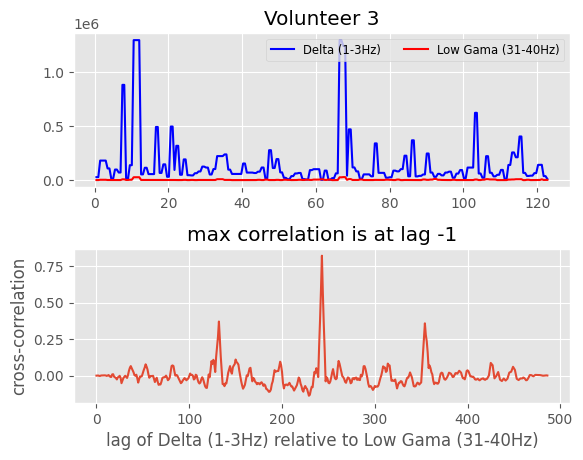

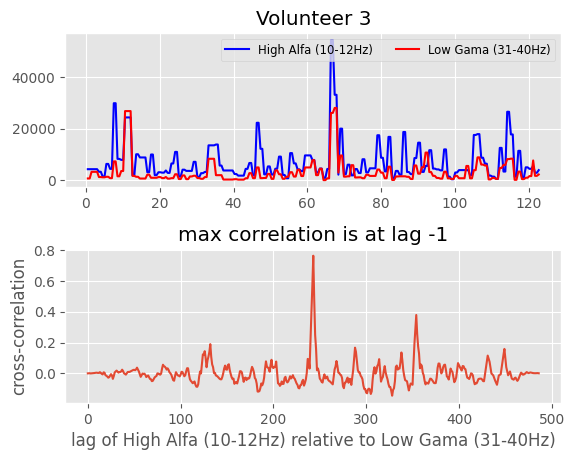

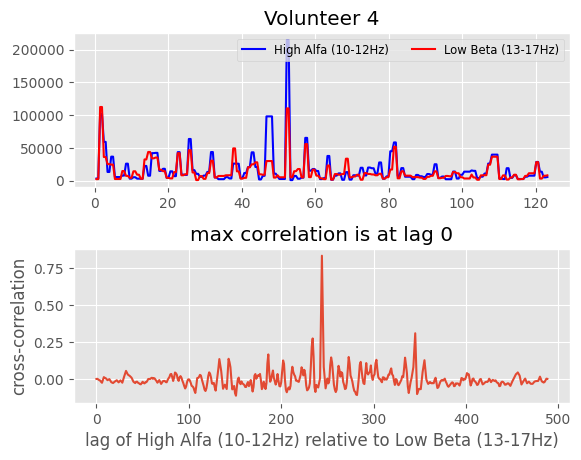

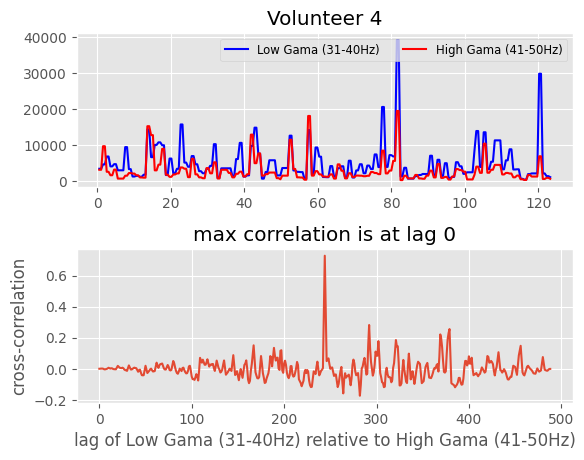

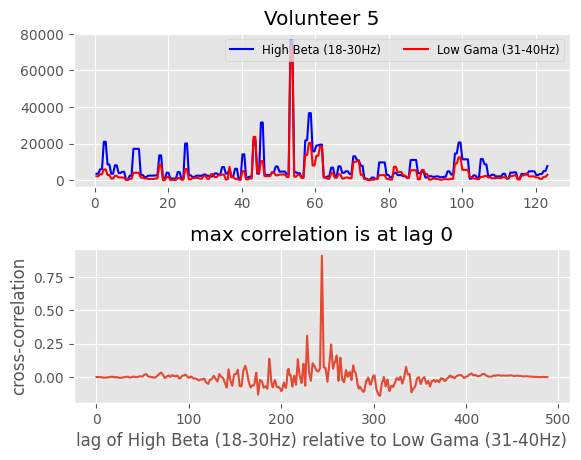

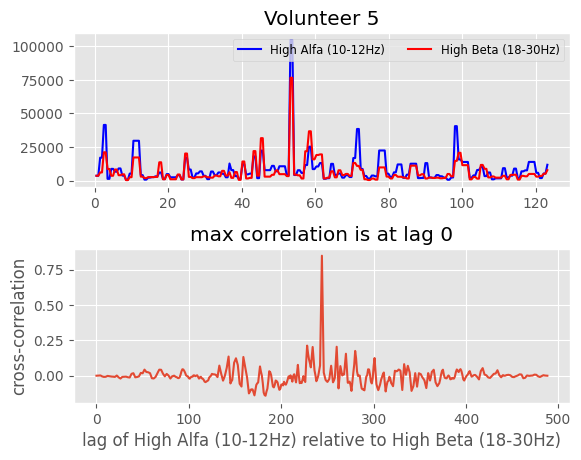

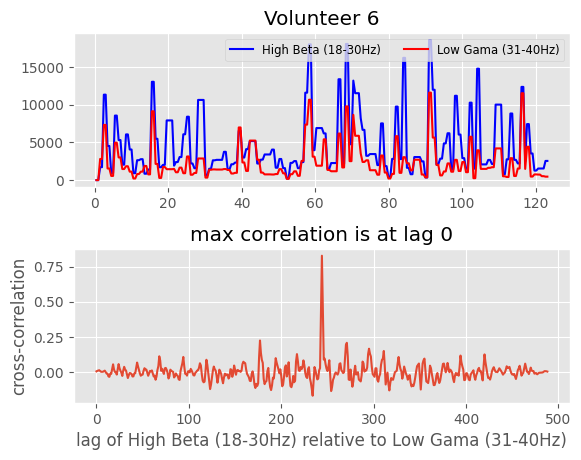

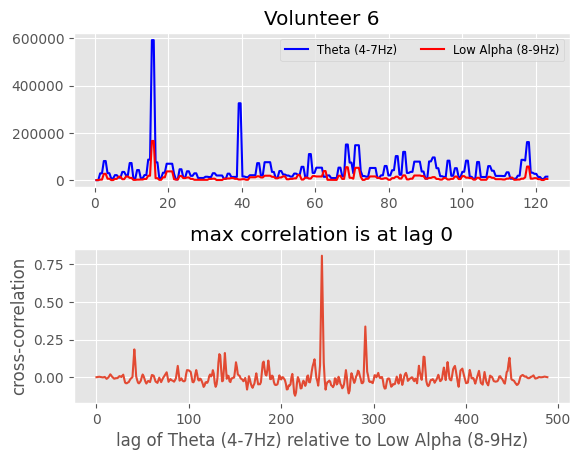

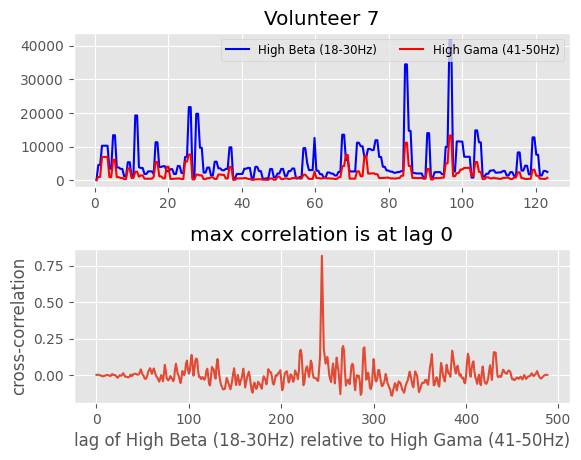

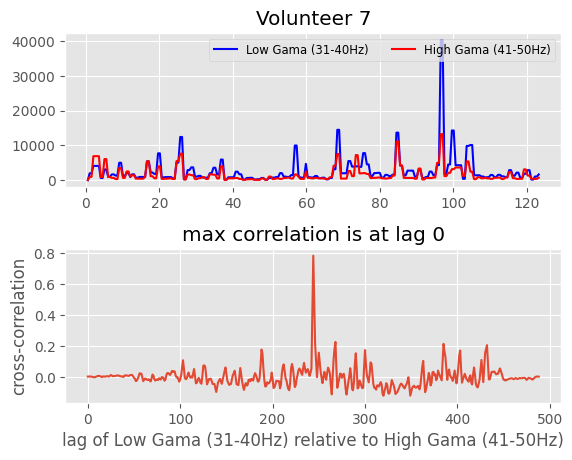

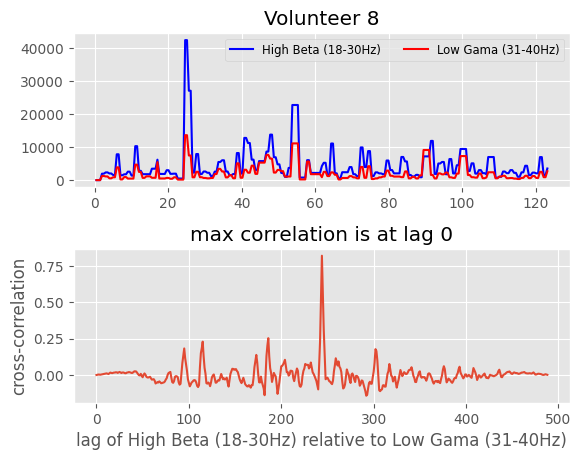

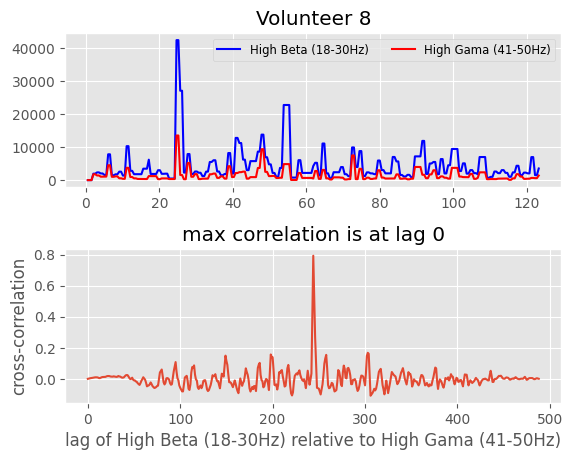

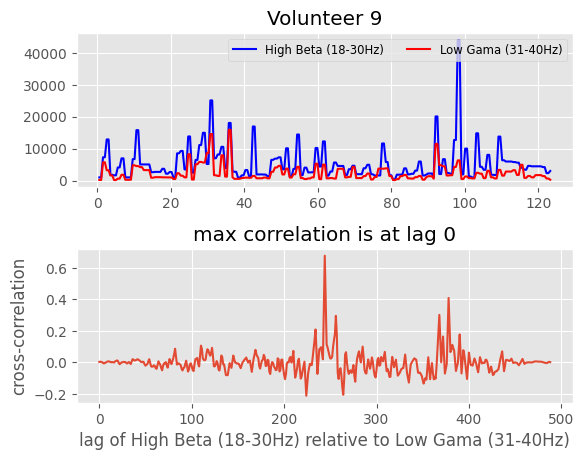

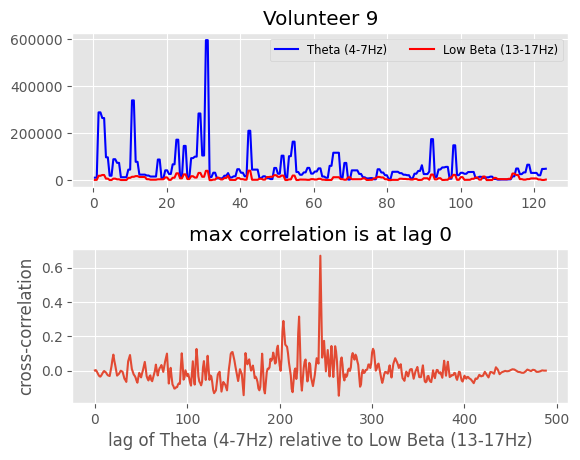

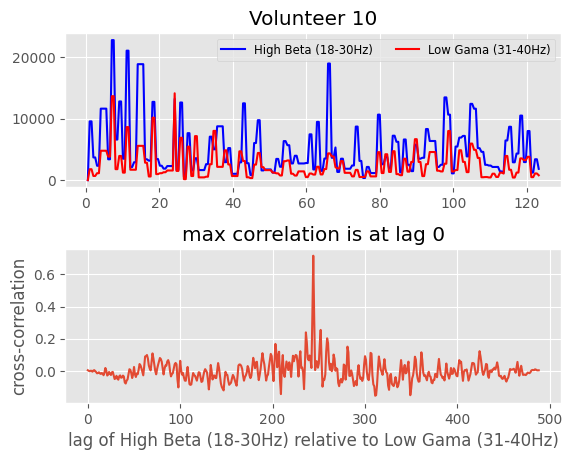

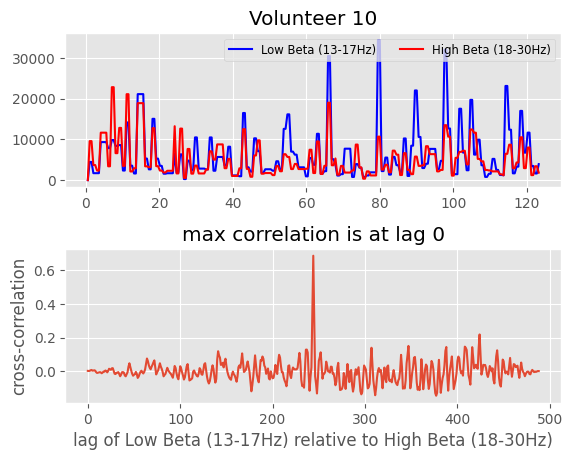

In [626]:
for i, largestCorrCoefficient in enumerate(largestCorrCoefficientsList):
    volunteer = f"Volunteer {i+1}"
    largestCorrCoefficientOfVolunteer = largestCorrCoefficient[volunteer]
    firstLargestCorrCoeffOfVolunteer = largestCorrCoefficientOfVolunteer[
        'First the Largest Corr Coeff']
    secondLargestCorrCoeffOfVolunteer = largestCorrCoefficientOfVolunteer[
        'Second the Largest Corr Coeff']
    visualizeLargestCorrCoeff(firstLargestCorrCoeffOfVolunteer, volunteer)
    visualizeLargestCorrCoeff(secondLargestCorrCoeffOfVolunteer, volunteer)


One more statistic that we can use to quantify correlation is Pearson’s. Pearson’s coefficient measures linear correlation.

NumPy has many statistics routines, including np.corrcoef(), that return a matrix of Pearson correlation coefficients. 

In [627]:
x = low_alpha_signal_series
y = delta_signal_series


Once we have two arrays of the same length, we can call np.corrcoef() with both arrays as arguments:

In [628]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.30161353],
       [0.30161353, 1.        ]])

In [629]:
r[0, 1]


0.3016135257186299

In [630]:
r[1, 0]


0.30161352571862987

corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients. Here’s a simplified version of the correlation matrix we just created:

In [631]:
pd.DataFrame(r)

0         1
0  1.000000  0.301614
1  0.301614  1.000000

The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what we usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.3.



SciPy also has many statistics routines contained in scipy.stats.



In [632]:
import scipy.stats
scipy.stats.pearsonr(x, y)   

PearsonRResult(statistic=0.30161352571862976, pvalue=1.5144241518100884e-06)

We can note that this function returns an object that contains two values:
1. The correlation coefficient
2. The p-value

You use the p-value in statistical methods when you’re testing a hypothesis.


We can extract the p-values and the correlation coefficients with their indices, as the items of tuples:

In [633]:
scipy.stats.pearsonr(x, y)[0]


0.30161352571862976

If we want to get the Pearson correlation coefficient and p-value at the same time, then we can unpack the return value:

In [634]:
r, p = scipy.stats.pearsonr(x, y)
r, p


(0.30161352571862976, 1.5144241518100884e-06)

In [635]:
x.corr(y)  # Pandas method


0.3016135257186299

Linear correlation measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.


Let us consider a dataset with two features: x and y. Each feature has n values, so x and y are n-tuples. Say that the first value x₁ from x corresponds to the first value y₁ from y, the second value x₂ from x to the second value y₂ from y, and so on. Then, there are n pairs of corresponding values: (x₁, y₁), (x₂, y₂), and so on. Each of these x-y pairs represents a single observation.

The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. We can express this value mathematically with this equation:

r = Σᵢ((xᵢ − mean(x))(yᵢ − mean(y))) (√Σᵢ(xᵢ − mean(x))² √Σᵢ(yᵢ − mean(y))²)⁻¹


Here, i takes on the values 1, 2, …, n. The mean values of x and y are denoted with mean(x) and mean(y). This formula shows that if larger x values tend to correspond to larger y values and vice versa, then r is positive. On the other hand, if larger x values are mostly associated with smaller y values and vice versa, then r is negative.

Here are some important facts about the Pearson correlation coefficient:
- The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.
- The maximum value r = 1 corresponds to the case in which there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.
- The value r > 0 indicates positive correlation between x and y.
- The value r = 0 corresponds to the case in which there’s no linear relationship between x and y.
- The value r < 0 indicates negative correlation between x and y.
- The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.


The above facts can be summed up in the following table:

<img src="./pearson-table.png"/>


In short, a larger absolute value of r indicates stronger correlation, closer to a linear function. A smaller absolute value of r indicates weaker correlation.



##### Linear Regression

Linear regression is the process of finding the linear function that is as close as possible to the actual relationship between features. In other words, we determine the linear function that best describes the association between the features. This linear function is also called the regression line.



We can implement linear regression with SciPy. We’ll get the linear function that best approximates the relationship between two arrays, as well as the Pearson correlation coefficient. 


In [636]:
result = scipy.stats.linregress(x, y)
result.slope

result.intercept

result.rvalue

result.pvalue

result.stderr


0.6371829929336609

That’s it! You’ve completed the linear regression and gotten the following results:

- .slope: the slope of the regression line
- .intercept: the intercept of the regression line
- .pvalue: the p-value
- .stderr: the standard error of the estimated gradient

We’ll visualize these results in a later section.



##### Visualization of Correlation


Data visualization is very important in statistics and data science. It can help us better understand the data and give a better insight into the relationships between features. In this section, we’ll visually represent the relationship between two features with an x-y plot. We’ll also use heatmaps to visualize a correlation matrix.

X-Y Plots With a Regression Line


First, let's see how to create an x-y plot with the regression line, its equation, and the Pearson correlation coefficient. We can get the slope and the intercept of the regression line, as well as the correlation coefficient, with linregress():



In [637]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)


Now we have all the values we need. We can also get the string with the equation of the regression line and the value of the correlation coefficient. 

In [638]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line


'Regression line: y=294257.96+3.14x, r=0.30'

Now, we create the x-y plot with .plot():

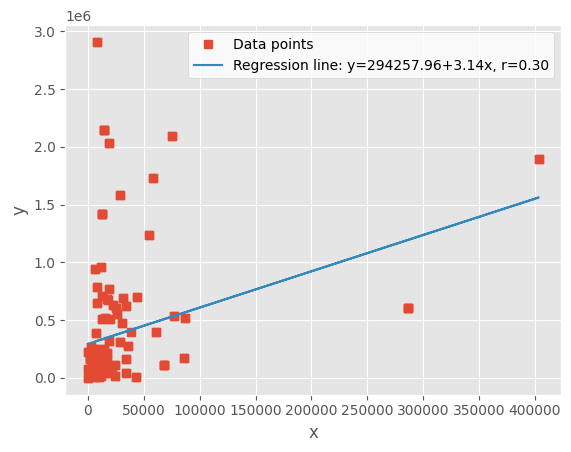

In [639]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()


The red squares represent the observations, while the blue line is the regression line. Its equation is listed in the legend, together with the correlation coefficient.

##### Heatmaps of Correlation Matrices

The correlation matrix can become really big and confusing when we have a lot of features! Fortunately, we can present it visually as a heatmap where each field has the color that corresponds to its value. We’ll need the correlation matrix:



In [640]:
corr_matrix = np.corrcoef(x, y).round(decimals=4)
corr_matrix


array([[1.    , 0.3016],
       [0.3016, 1.    ]])

It can be convenient to round the numbers in the correlation matrix with .round(), as they’re going to be shown be on the heatmap.


Finally, we create a heatmap with .imshow() and the correlation matrix as its argument:

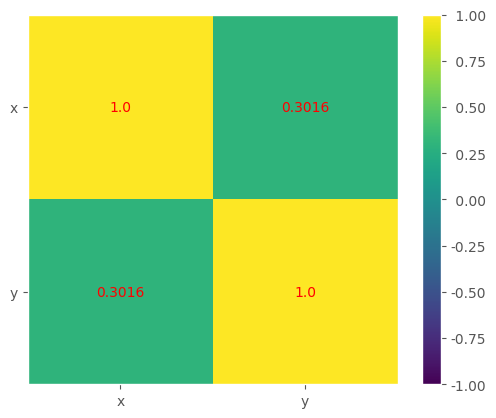

In [641]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()


The result is a table with the coefficients. It sort of looks like the Pandas output with colored backgrounds. The colors help to interpret the output. In this example, the yellow color represents the number 1, green corresponds to 0.76, and purple is used for the negative numbers.

##### Conclusion

We now know that correlation coefficients are statistics that measure the association between variables or features of datasets. They’re very important in data science and machine learning.

We can now use Python to calculate Pearson’s product-moment correlation coefficient.

Now we can use NumPy, SciPy, and Pandas correlation functions and methods to effectively calculate these (and other) statistics, even when we work with large datasets. We also see we can visualize data, regression lines, and correlation matrices with Matplotlib plots and heatmaps.


Let us now calculate Pearson Correlation between Frequency, Blink strength, EEG, Attention, Meditation signal for each pair of signals. I will prepare a table with maximums of correlation coefficients.

In [642]:
signalsList


['Attention (0-100% (maximum attention))',
 'Meditation (0-100% (maximum meditation))',
 'Blink Strength (0-255 (maximum))',
 'Delta (1-3Hz)',
 'Theta (4-7Hz)',
 'Low Alpha (8-9Hz)',
 'High Alfa (10-12Hz)',
 'Low Beta (13-17Hz)',
 'High Beta (18-30Hz)',
 'Low Gama (31-40Hz)',
 'High Gama (41-50Hz)',
 'RAW EEG (Voltage)']

In [643]:
volunteerIndexesList


['Volunteer 1',
 'Volunteer 2',
 'Volunteer 3',
 'Volunteer 4',
 'Volunteer 5',
 'Volunteer 6',
 'Volunteer 7',
 'Volunteer 8',
 'Volunteer 9',
 'Volunteer 10']

In [644]:
pearsonCorrelationCoefficients = {}

for volunteer in volunteerIndexesList:
    for i in range(len(signalsList)):
        for j in range(i + 1, len(signalsList)):
            signalNameA = signalsList[i]
            signalNameB = signalsList[j]
            signalA = volunteersDictionary[volunteer][signalNameA]
            signalB = volunteersDictionary[volunteer][signalNameB]
            pearsonCorrCoefficient = np.corrcoef(signalA, signalB)

            if not volunteer in pearsonCorrelationCoefficients:
                pearsonCorrelationCoefficients[volunteer] = []

            valueKeyName = pearsonCorrCoefficient
            pearsonCorrCoefficientBetweenSignals = {
                'signal A': signalNameA, 'signal B': signalNameB,  'value': pearsonCorrCoefficient
            }
            pearsonCorrelationCoefficients[volunteer].append(
                pearsonCorrCoefficientBetweenSignals
            )

print(pearsonCorrelationCoefficients)


{'Volunteer 1': [{'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Meditation (0-100% (maximum meditation))', 'value': array([[1.        , 0.27251021],
       [0.27251021, 1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Blink Strength (0-255 (maximum))', 'value': array([[ 1.        , -0.14027328],
       [-0.14027328,  1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Delta (1-3Hz)', 'value': array([[1.        , 0.04652313],
       [0.04652313, 1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Theta (4-7Hz)', 'value': array([[ 1.        , -0.04469324],
       [-0.04469324,  1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'Low Alpha (8-9Hz)', 'value': array([[1.        , 0.05821069],
       [0.05821069, 1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'High Alfa (10-12Hz)', 'value': array([[ 1.     

In [645]:
sortedPearsonCorrelationCoefficients = {}

for volunteer, pearsonCorrCoefBetweenSignalsList in pearsonCorrelationCoefficients.items():
    sortedPearsonCorrCoefBetweenSignalsList = sorted(
        pearsonCorrCoefBetweenSignalsList,
        key=lambda x: abs(x['value'][0, 1])
    )

    if not volunteer in sortedPearsonCorrelationCoefficients:
        sortedPearsonCorrelationCoefficients[volunteer] = sortedPearsonCorrCoefBetweenSignalsList

print(sortedPearsonCorrelationCoefficients)

{'Volunteer 1': [{'signal A': 'Meditation (0-100% (maximum meditation))', 'signal B': 'Low Alpha (8-9Hz)', 'value': array([[ 1.        , -0.00266786],
       [-0.00266786,  1.        ]])}, {'signal A': 'Meditation (0-100% (maximum meditation))', 'signal B': 'Blink Strength (0-255 (maximum))', 'value': array([[1.        , 0.00902827],
       [0.00902827, 1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'High Alfa (10-12Hz)', 'value': array([[ 1.        , -0.01740421],
       [-0.01740421,  1.        ]])}, {'signal A': 'Attention (0-100% (maximum attention))', 'signal B': 'RAW EEG (Voltage)', 'value': array([[1.        , 0.01794391],
       [0.01794391, 1.        ]])}, {'signal A': 'Blink Strength (0-255 (maximum))', 'signal B': 'RAW EEG (Voltage)', 'value': array([[1.        , 0.02176398],
       [0.02176398, 1.        ]])}, {'signal A': 'Meditation (0-100% (maximum meditation))', 'signal B': 'RAW EEG (Voltage)', 'value': array([[1.        , 0.02403508]

In [646]:
largestPearsonCorrCoefficientsList = []

for volunteerName in sortedPearsonCorrelationCoefficients:
    sortedPearsonCorrCoefficientsOfVolunteer = sortedPearsonCorrelationCoefficients[volunteerName]
    secondTheLargestPearsonCorrCoeff, firstTheLargestPearsonCorrCoeff = sortedPearsonCorrCoefficientsOfVolunteer[
        -2:]

    largestPearsonCorrCoeffsOfVolunteer = {}
    if not volunteerName in largestPearsonCorrCoeffsOfVolunteer:
        largestPearsonCorrCoeffsOfVolunteer[volunteerName] = {
            'First the Largest Corr Coeff': firstTheLargestPearsonCorrCoeff, 'Second the Largest Corr Coeff': secondTheLargestPearsonCorrCoeff
        }

    largestPearsonCorrCoefficientsList.append(largestPearsonCorrCoeffsOfVolunteer)

largestPearsonCorrCoefficientsList


[{'Volunteer 1': {'First the Largest Corr Coeff': {'signal A': 'Low Gama (31-40Hz)',
    'signal B': 'High Gama (41-50Hz)',
    'value': array([[1.        , 0.85942893],
           [0.85942893, 1.        ]])},
   'Second the Largest Corr Coeff': {'signal A': 'High Beta (18-30Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': array([[1.        , 0.82200557],
           [0.82200557, 1.        ]])}}},
 {'Volunteer 2': {'First the Largest Corr Coeff': {'signal A': 'Low Gama (31-40Hz)',
    'signal B': 'High Gama (41-50Hz)',
    'value': array([[1.        , 0.77981878],
           [0.77981878, 1.        ]])},
   'Second the Largest Corr Coeff': {'signal A': 'High Beta (18-30Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': array([[1.        , 0.68232285],
           [0.68232285, 1.        ]])}}},
 {'Volunteer 3': {'First the Largest Corr Coeff': {'signal A': 'Delta (1-3Hz)',
    'signal B': 'Low Gama (31-40Hz)',
    'value': array([[1.        , 0.82767241],
           [0.827672

In [647]:
pearsonIterableOfPandasObjects = []

for i, largestPearsonCorrCoefficient in enumerate(largestPearsonCorrCoefficientsList):
    volunteer = f"Volunteer {i+1}"
    firstKey = f'First the Largest Pearson Corr Coeff of {volunteer}'
    secondKey = f'Second the Largest Pearson Corr Coeff of {volunteer}'
    largestPearsonCorrCoefficientOfVolunteer = largestPearsonCorrCoefficient[volunteer]
    d = {}
    if not firstKey in d:
        d[firstKey] = largestPearsonCorrCoefficientOfVolunteer['First the Largest Corr Coeff']
    if not secondKey in d:
        d[secondKey] = largestPearsonCorrCoefficientOfVolunteer['Second the Largest Corr Coeff']

    df = pd.DataFrame(d)
    pearsonIterableOfPandasObjects.append(df)

pd.concat(pearsonIterableOfPandasObjects, axis="columns", join="inner")


First the Largest Pearson Corr Coeff of Volunteer 1  \
signal A                                 Low Gama (31-40Hz)    
signal B                                High Gama (41-50Hz)    
value     [[1.0, 0.8594289301151284], [0.859428930115128...    

         Second the Largest Pearson Corr Coeff of Volunteer 1  \
signal A                                High Beta (18-30Hz)     
signal B                                 Low Gama (31-40Hz)     
value     [[1.0, 0.8220055700278985], [0.822005570027898...     

         First the Largest Pearson Corr Coeff of Volunteer 2  \
signal A                                 Low Gama (31-40Hz)    
signal B                                High Gama (41-50Hz)    
value     [[1.0, 0.7798187753138338], [0.779818775313833...    

         Second the Largest Pearson Corr Coeff of Volunteer 2  \
signal A                                High Beta (18-30Hz)     
signal B                                 Low Gama (31-40Hz)     
value     [[1.0, 0.6823228545298379], [0.682322854529837...     

         First the Largest Pearson Corr Coeff of Volunteer 3  \
signal A                                      Delta (1-3Hz)    
signal B                                 Low Gama (31-40Hz)    
value     [[1.0, 0.8276724143804732], [0.827672414380473...    

         Second the Largest Pearson Corr Coeff of Volunteer 3  \
signal A                                High Alfa (10-12Hz)     
signal B                                 Low Gama (31-40Hz)     
value     [[1.0, 0.7693635418376655], [0.769363541837665...     

         First the Largest Pearson Corr Coeff of Volunteer 4  \
signal A                                High Alfa (10-12Hz)    
signal B                                 Low Beta (13-17Hz)    
value     [[1.0, 0.8359808119706259], [0.835980811970625...    

         Second the Largest Pearson Corr Coeff of Volunteer 4  \
signal A                                 Low Gama (31-40Hz)     
signal B                                High Gama (41-50Hz)     
value     [[1.0, 0.7302924281283991], [0.730292428128399...     

         First the Largest Pearson Corr Coeff of Volunteer 5  \
signal A                                High Beta (18-30Hz)    
signal B                                 Low Gama (31-40Hz)    
value     [[1.0, 0.9130671405497164], [0.913067140549716...    

         Second the Largest Pearson Corr Coeff of Volunteer 5  \
signal A                                High Alfa (10-12Hz)     
signal B                                High Beta (18-30Hz)     
value     [[1.0, 0.8523306316082127], [0.852330631608212...     

         First the Largest Pearson Corr Coeff of Volunteer 6  \
signal A                                High Beta (18-30Hz)    
signal B                                 Low Gama (31-40Hz)    
value     [[1.0, 0.8310245073828468], [0.831024507382846...    

         Second the Largest Pearson Corr Coeff of Volunteer 6  \
signal A                                      Theta (4-7Hz)     
signal B                                  Low Alpha (8-9Hz)     
value     [[1.0, 0.8100809659569739], [0.810080965956973...     

         First the Largest Pearson Corr Coeff of Volunteer 7  \
signal A                                High Beta (18-30Hz)    
signal B                                High Gama (41-50Hz)    
value     [[1.0, 0.8208363228020974], [0.820836322802097...    

         Second the Largest Pearson Corr Coeff of Volunteer 7  \
signal A                                 Low Gama (31-40Hz)     
signal B                                High Gama (41-50Hz)     
value     [[1.0, 0.7885464291803878], [0.788546429180387...     

         First the Largest Pearson Corr Coeff of Volunteer 8  \
signal A                                High Beta (18-30Hz)    
signal B                                 Low Gama (31-40Hz)    
value     [[1.0, 0.8249099618870581], [0.824909961887058...    

         Second the Largest Pearson Corr Coeff of Volunteer 8  \
signal A                                High Beta (18-30Hz)  

##### Let us visualize 2 correlation functions with the highest Pearson Correlation coefficients for every volunteer.

In [648]:
def visualizePearsonLargestCorrCoeff(corrCoeff, volunteer):
    x = volunteersDictionary[volunteer]["Record Time (Records each 0.5s)"]
    signalAName = corrCoeff['signal A']
    signalBName = corrCoeff['signal B']
    y1 = volunteersDictionary[volunteer][signalAName]
    y2 = volunteersDictionary[volunteer][signalBName]
    corr_matrix = np.corrcoef(y1, y2).round(decimals=4)
    linregressResult = scipy.stats.linregress(y1, y2)
    slope = linregressResult.slope
    intercept = linregressResult.intercept
    r = linregressResult.rvalue
    regressionLine = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

    fig, axs = plt.subplots(nrows=3, figsize=(8, 14))
    fig.subplots_adjust(hspace=0.3)

    ax = axs[0]
    ax.set_title(volunteer)
    ax.plot(x, y1, 'b', label=signalAName)
    ax.plot(x, y2, 'r', label=signalBName)
    ax.legend(loc='upper right', fontsize='small', ncol=2)

    ax = axs[1]
    ax.set_title(regressionLine, fontsize='small')
    ax.plot(y1, y2, linewidth=0, marker='s', label='Data points')
    ax.plot(y1, intercept + slope * y1, label='Regression line')
    ax.legend(loc='upper right', fontsize='small', ncol=2)
    ax.set_xlabel(signalAName, fontsize='small')
    ax.set_ylabel(signalBName, fontsize='small')

    ax = axs[2]
    im = ax.imshow(corr_matrix)
    im.set_clim(-1, 1)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
    for i in range(2):
        for j in range(2):
            ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                    color='r')
    cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
    ax.set_title('Pearson Correlation', fontsize='small')
    ax.set_xlabel(f'{signalAName} relative to {signalBName}', fontsize='small')

    plt.show()


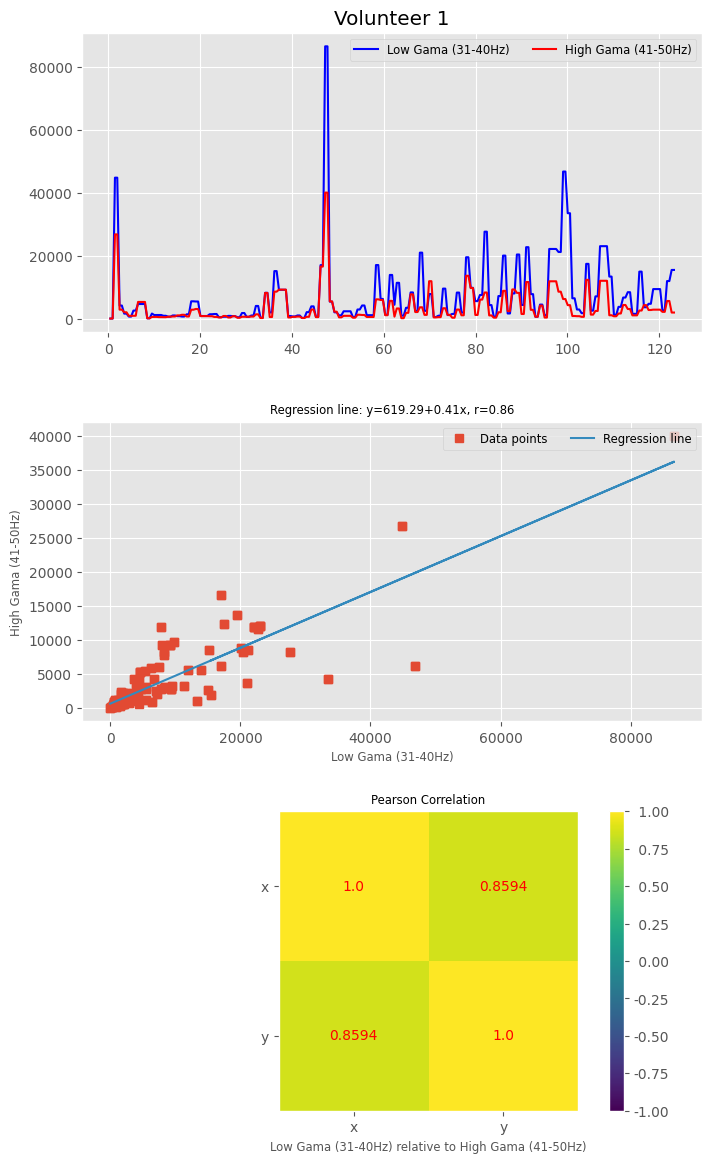

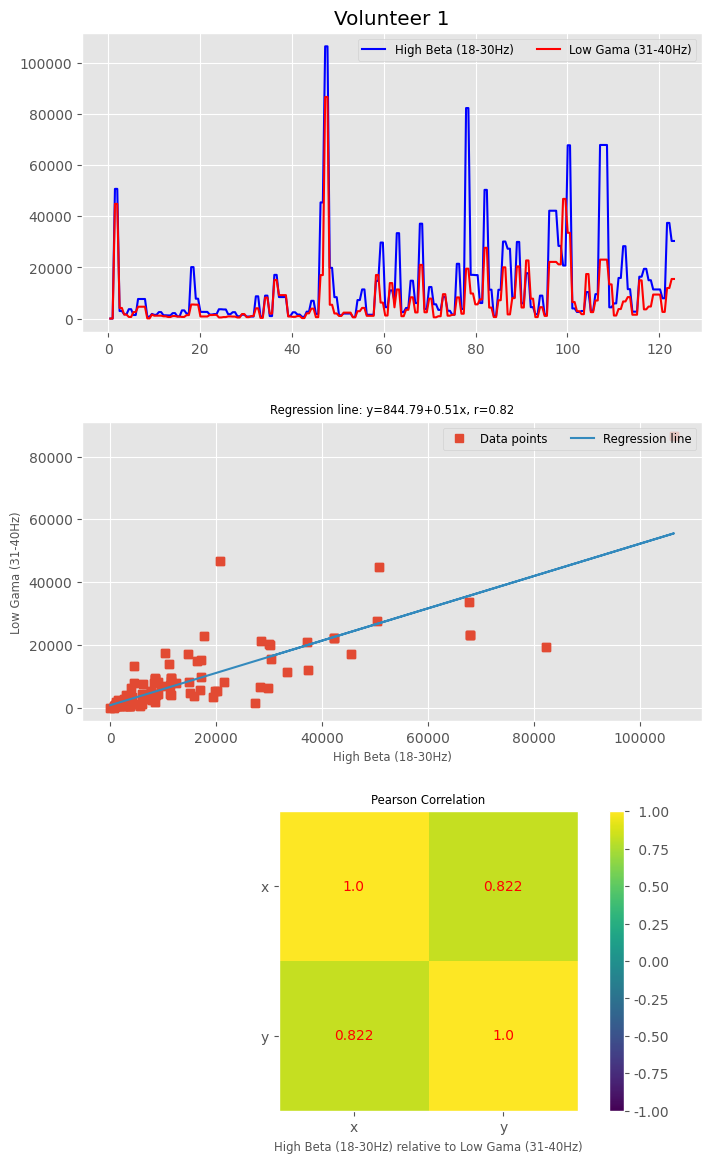

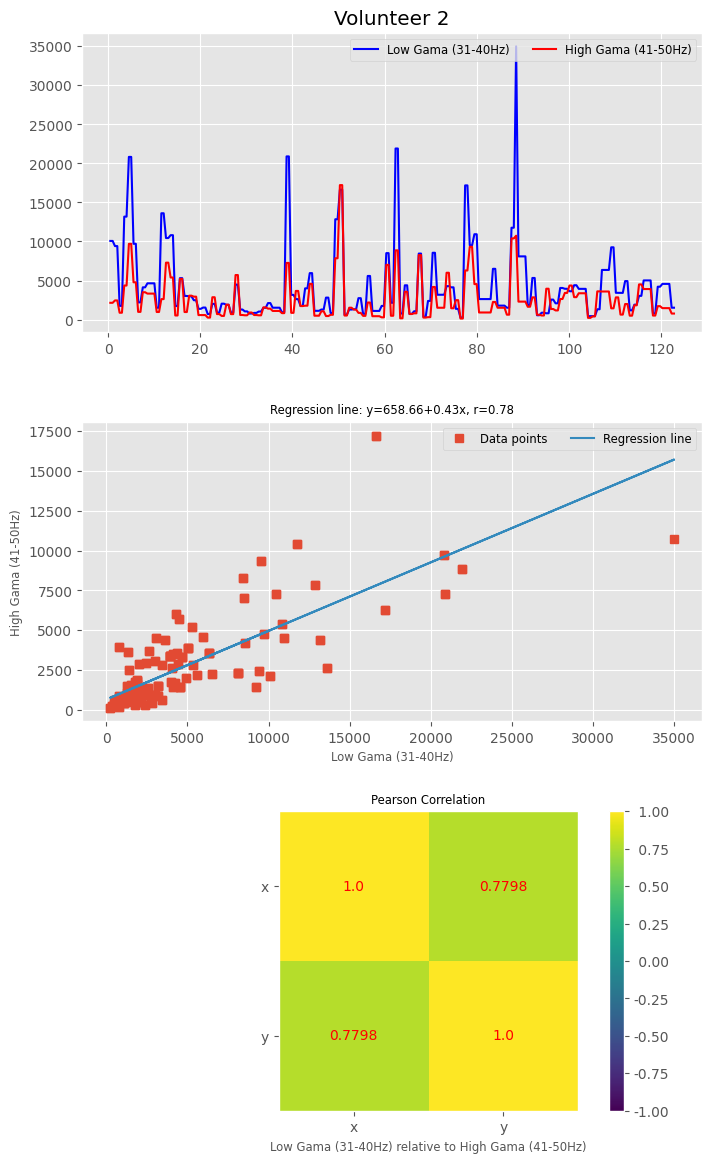

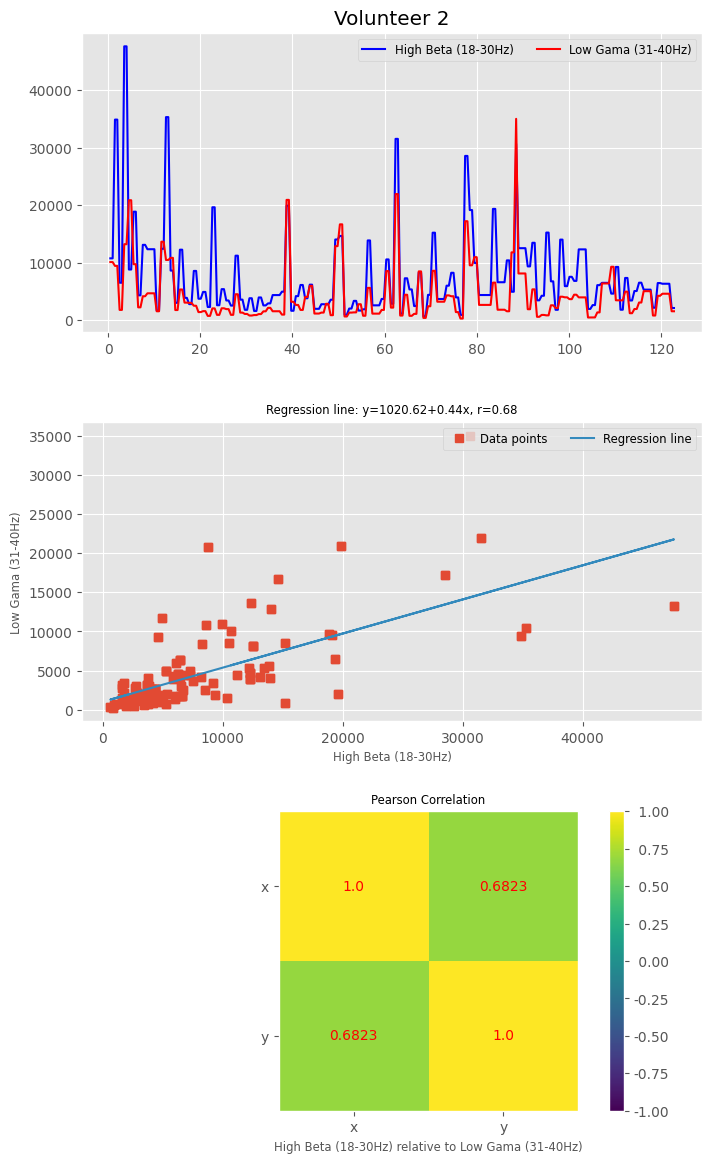

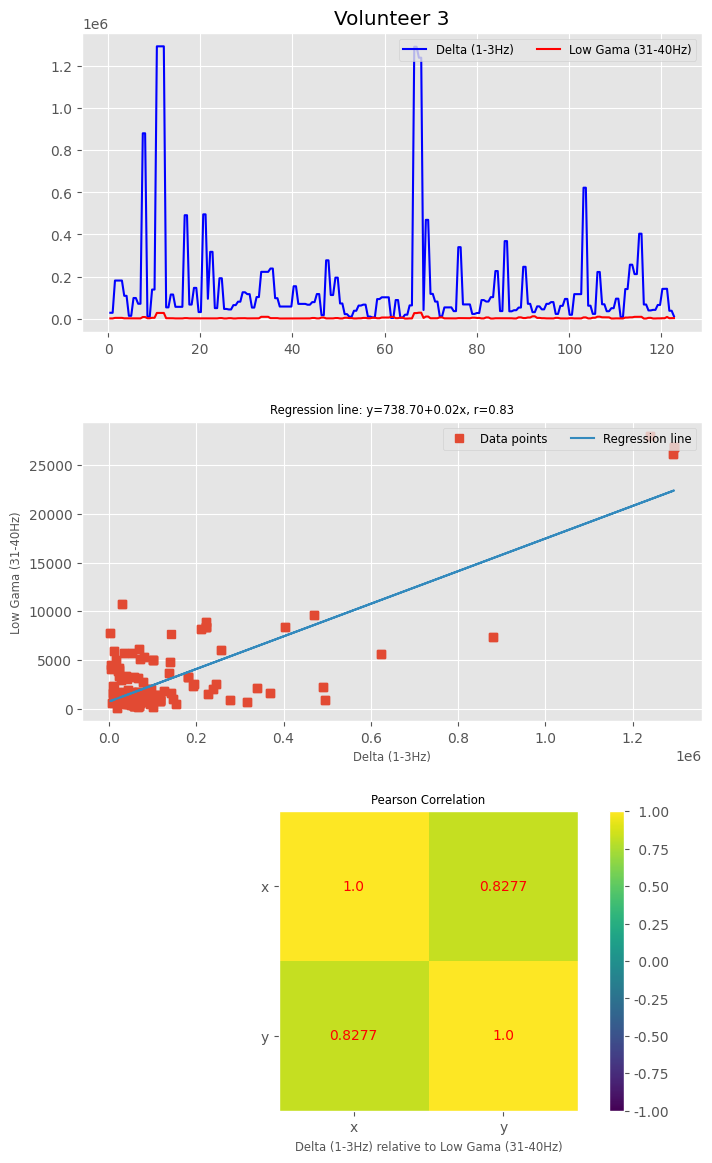

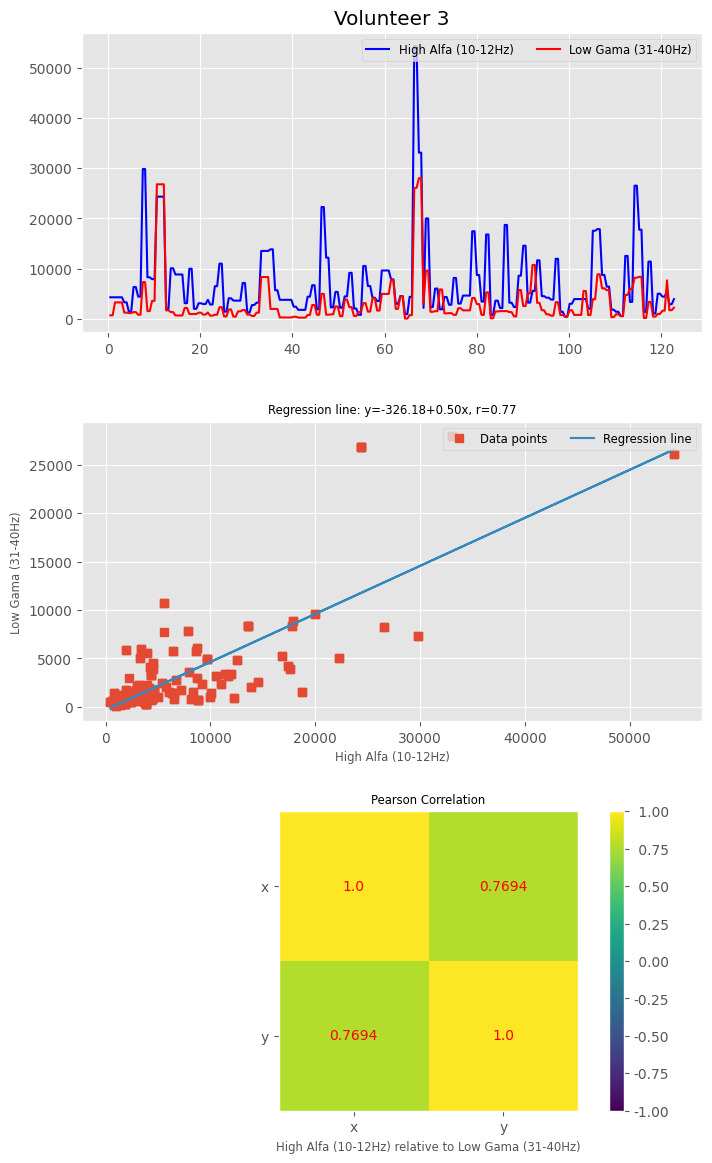

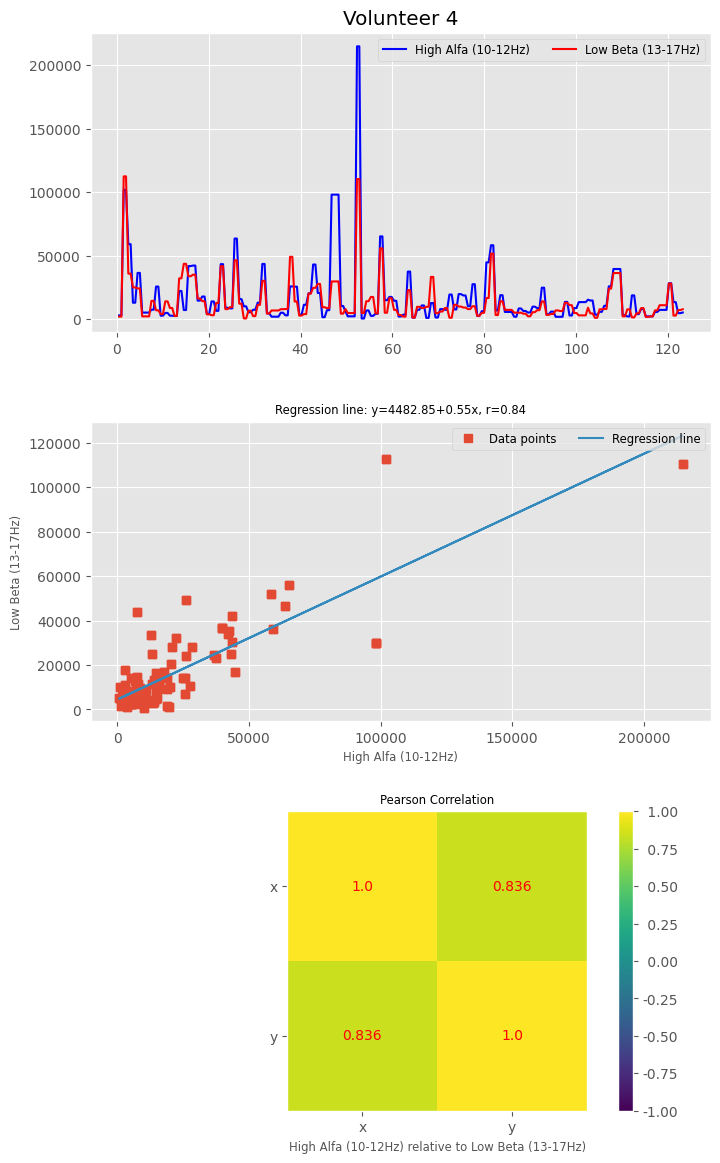

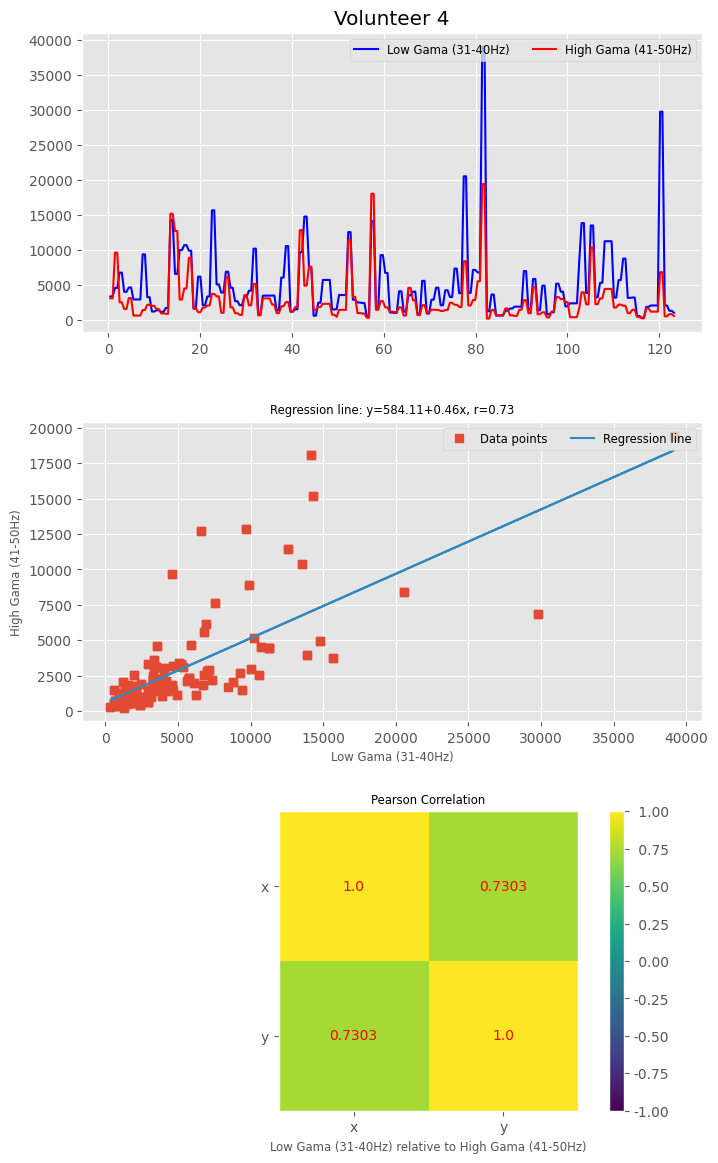

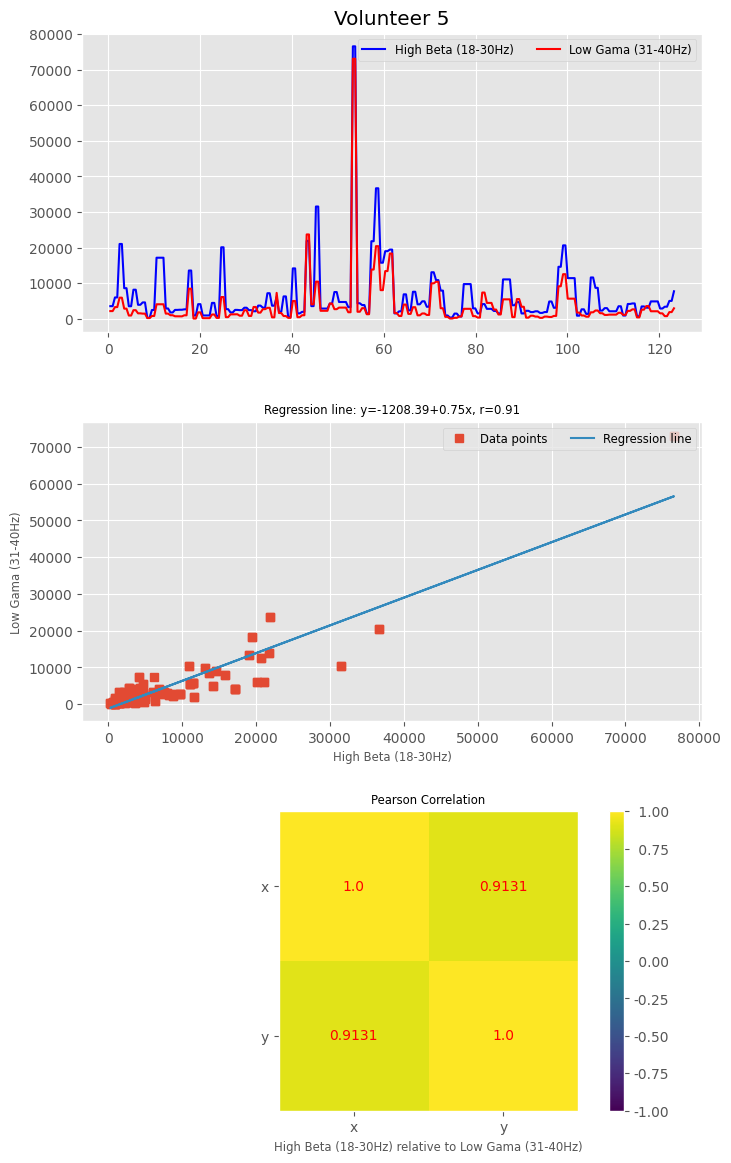

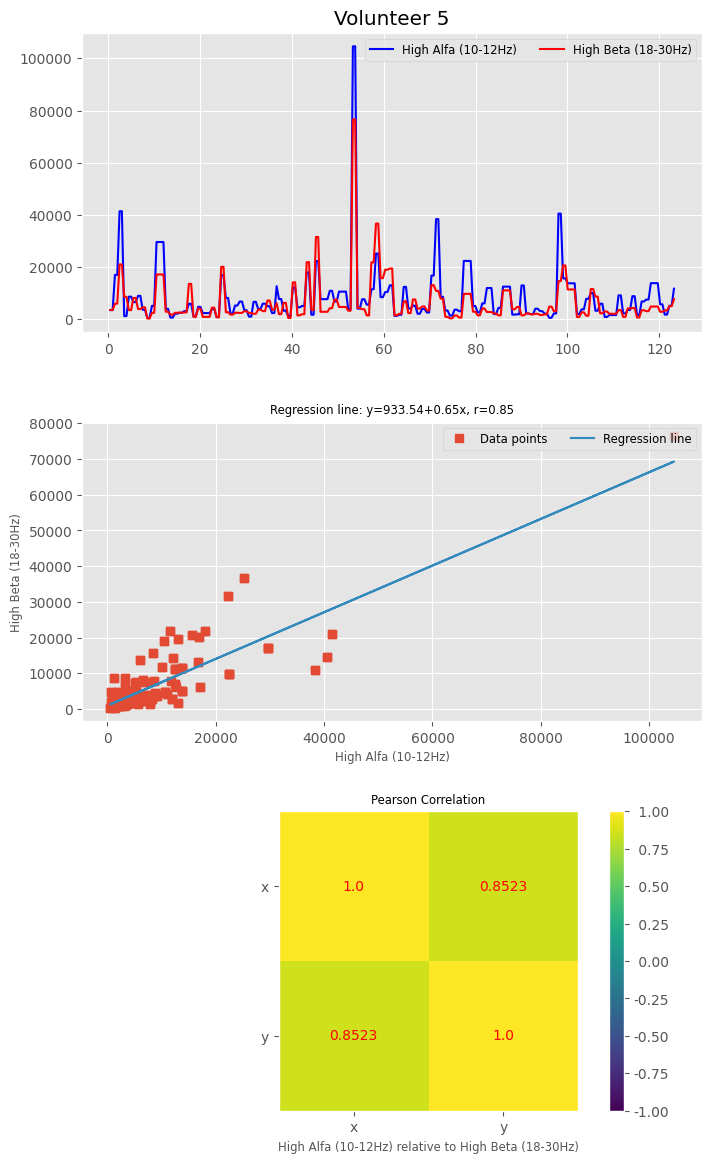

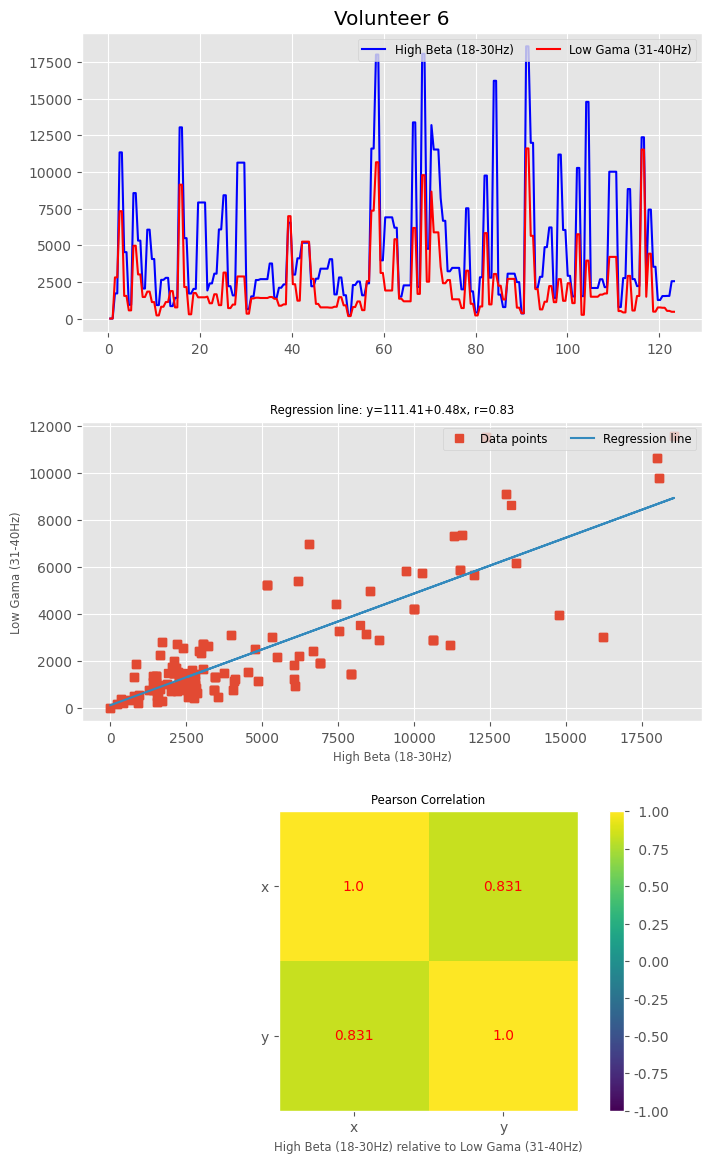

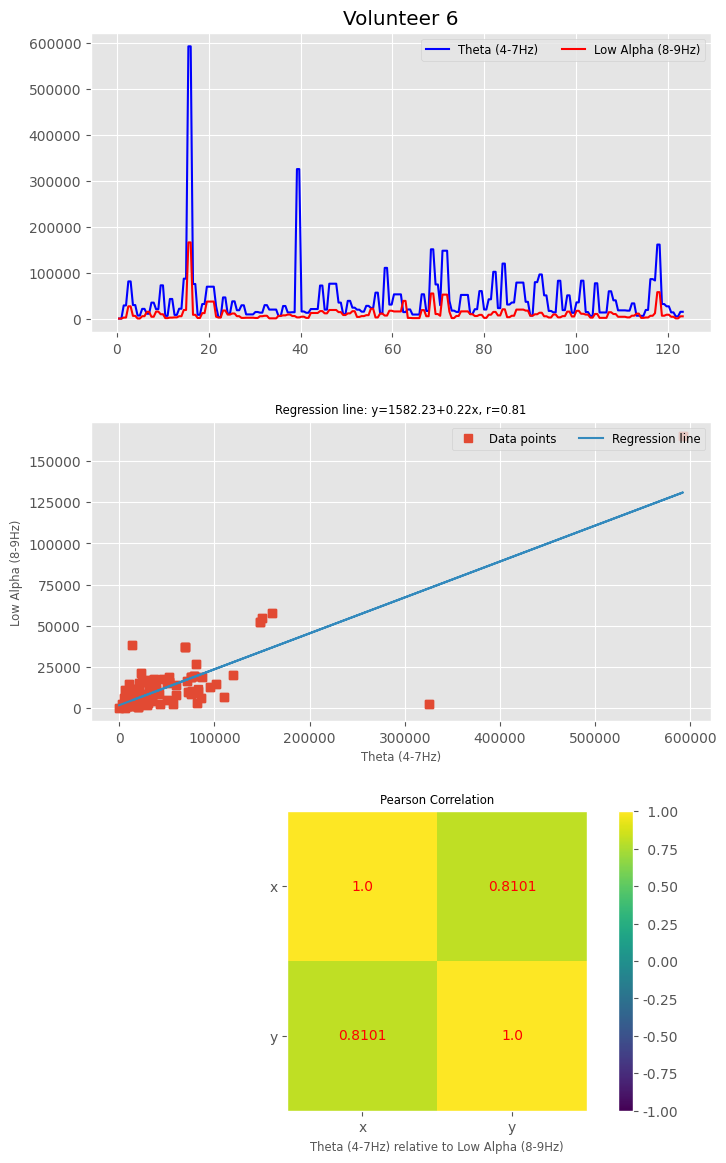

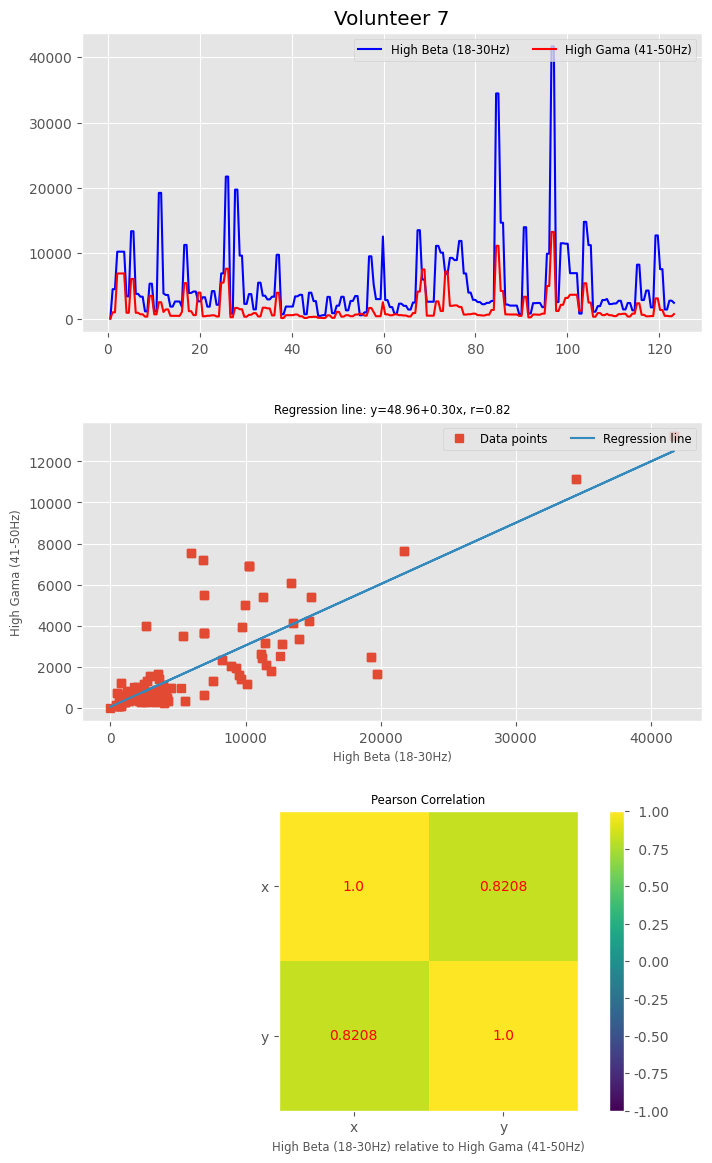

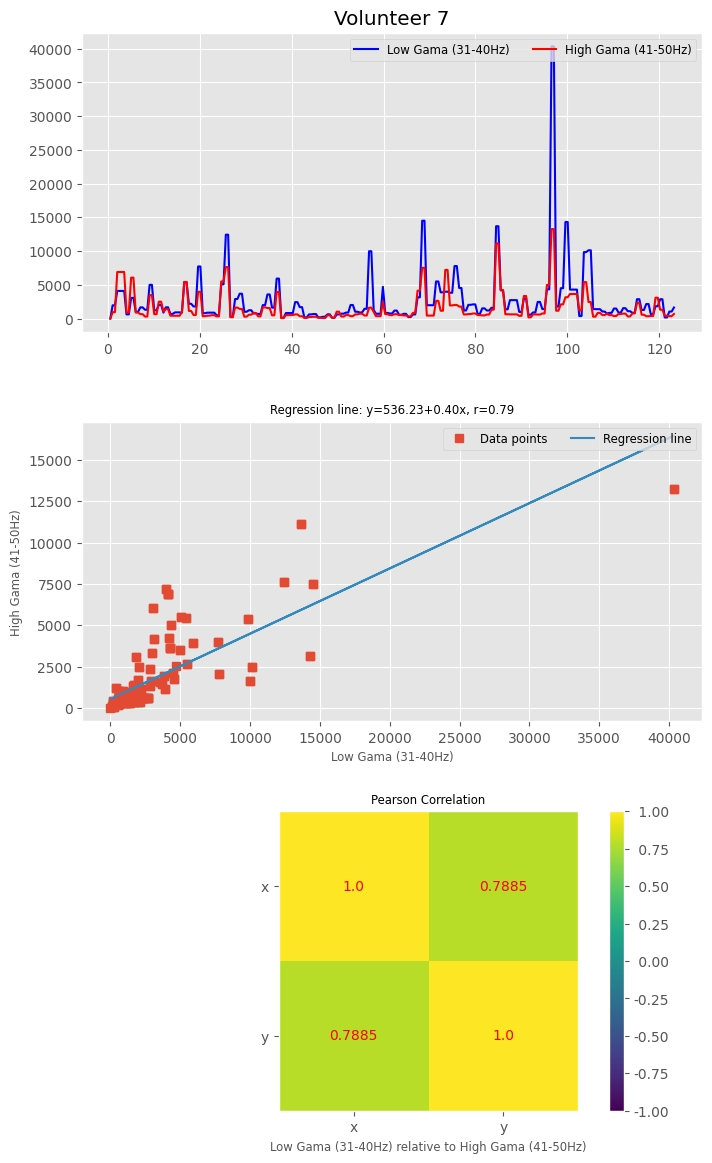

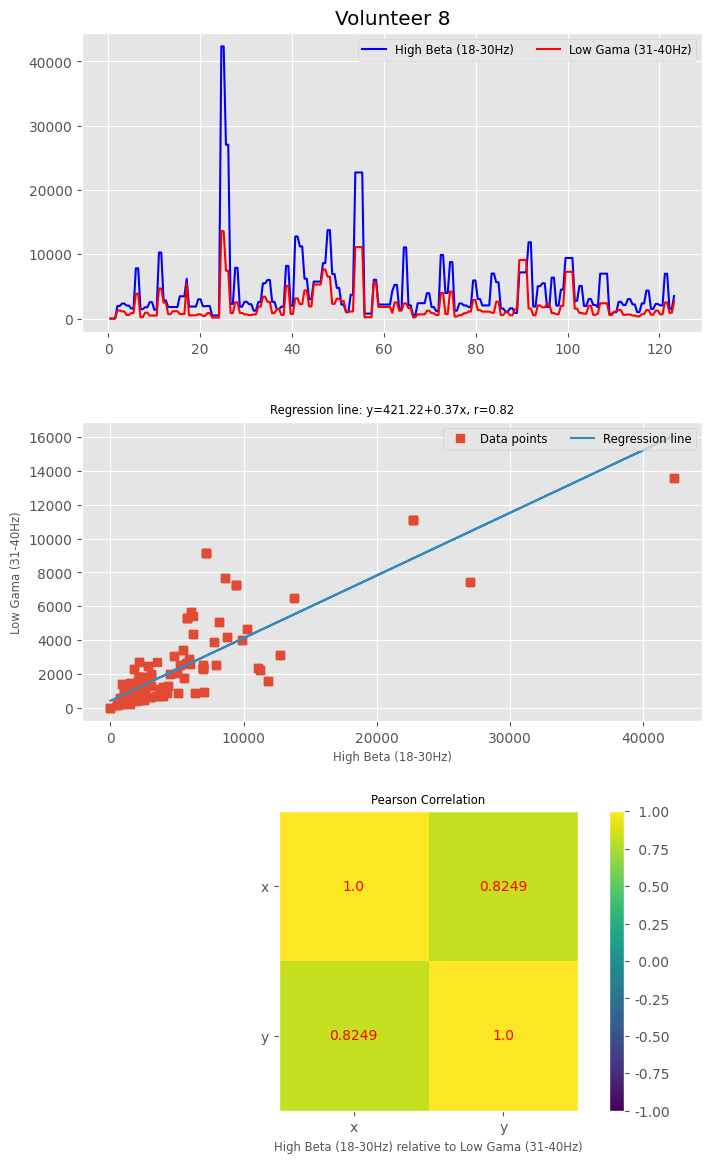

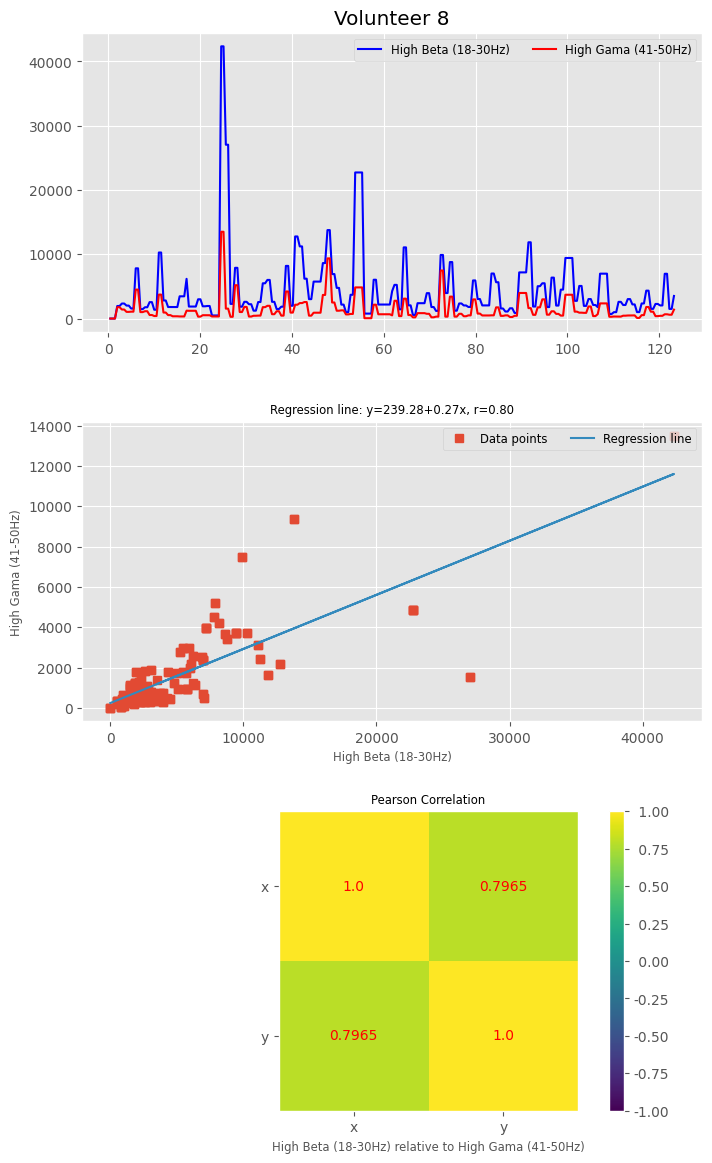

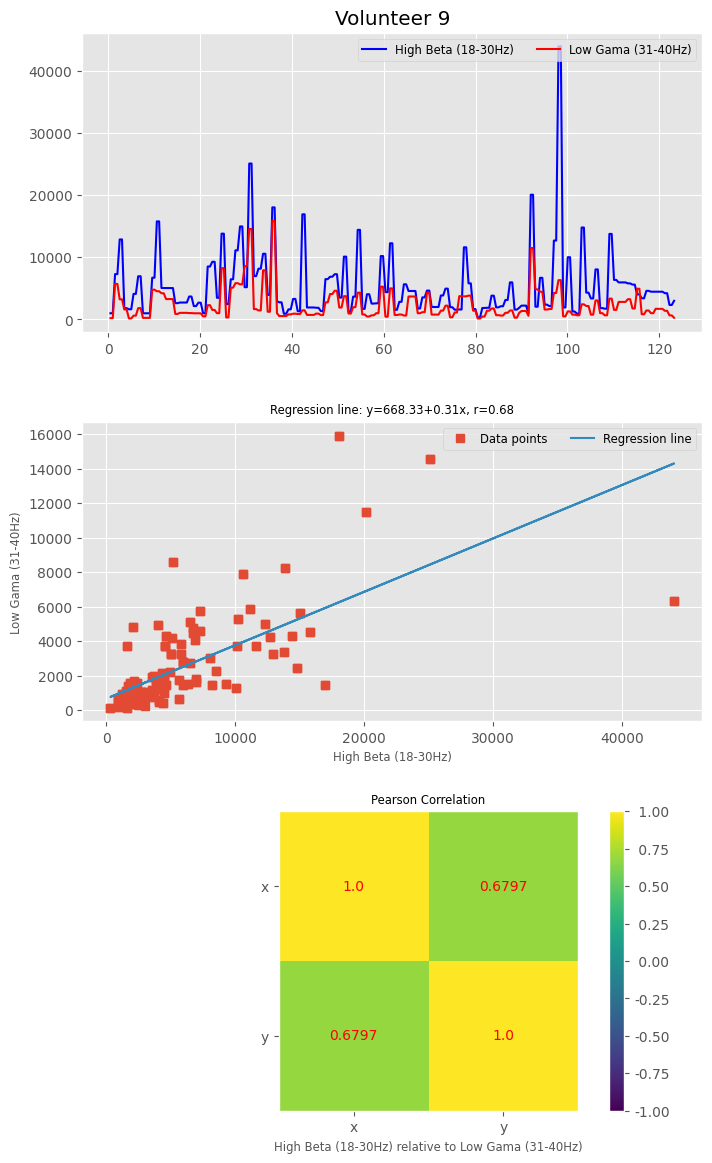

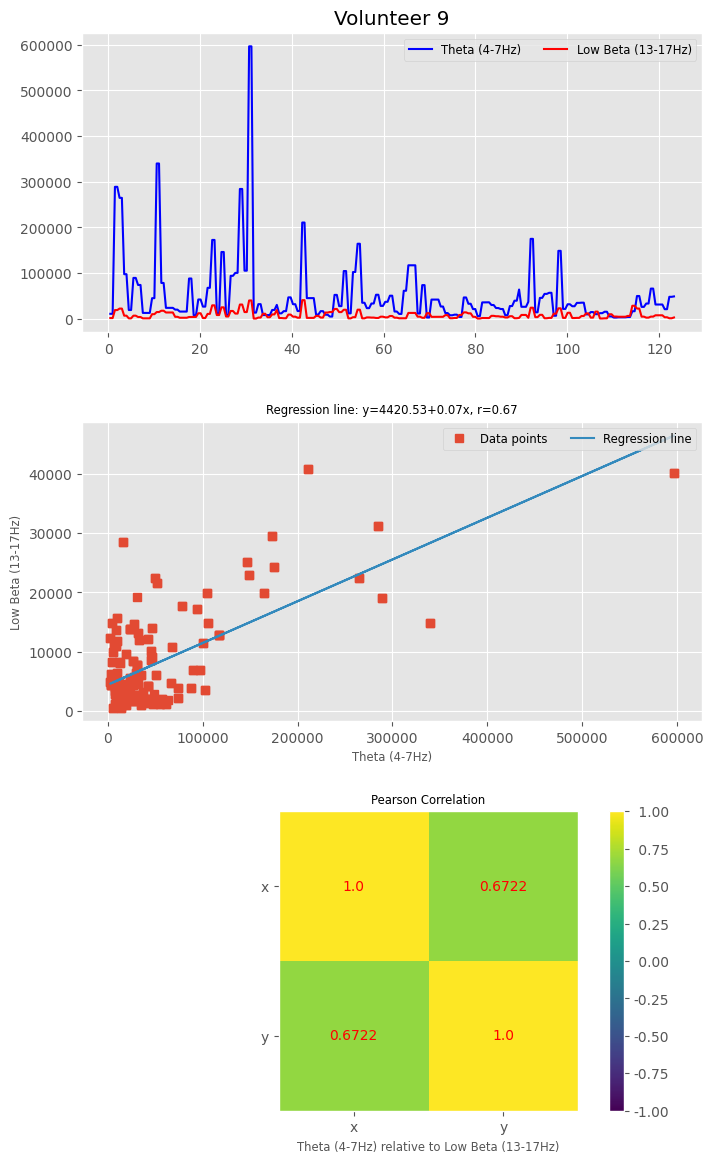

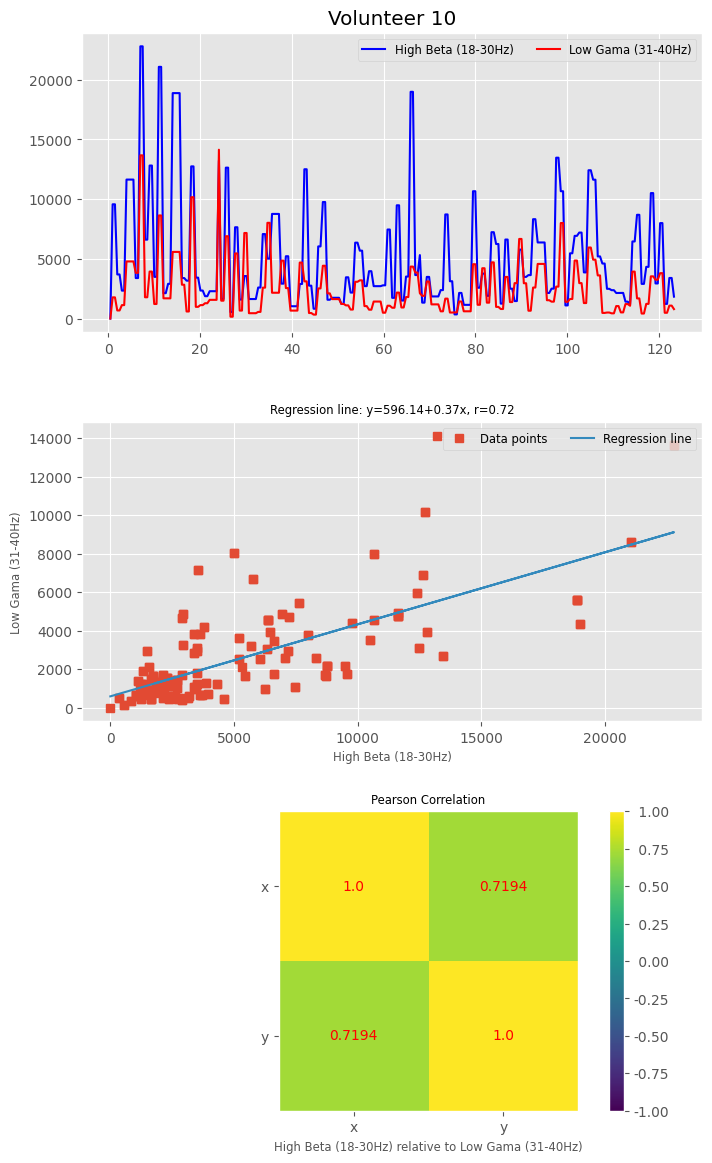

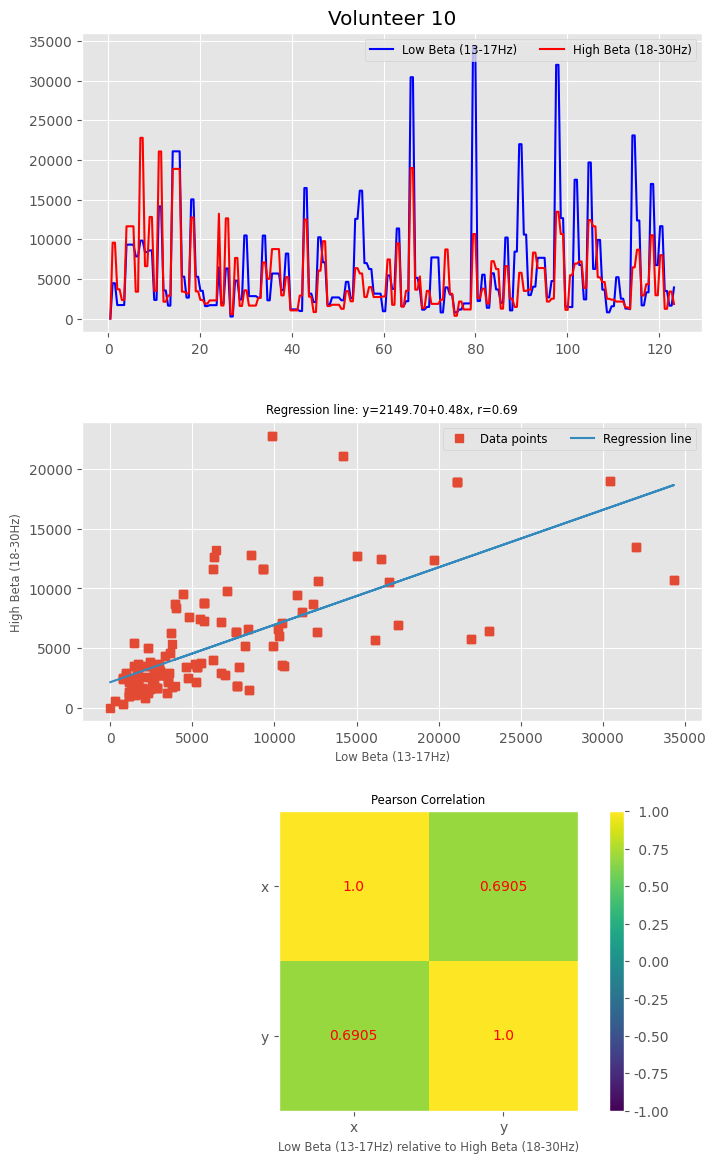

In [649]:
for i, largestPearsonCorrCoefficient in enumerate(largestPearsonCorrCoefficientsList):
    volunteer = f"Volunteer {i+1}"
    largestPearsonCorrCoefficientOfVolunteer = largestPearsonCorrCoefficient[volunteer]
    firstPearsonLargestCorrCoeffOfVolunteer = largestPearsonCorrCoefficientOfVolunteer[
        'First the Largest Corr Coeff']
    secondPearsonLargestCorrCoeffOfVolunteer = largestPearsonCorrCoefficientOfVolunteer[
        'Second the Largest Corr Coeff']
    visualizePearsonLargestCorrCoeff(
        firstPearsonLargestCorrCoeffOfVolunteer, volunteer)
    visualizePearsonLargestCorrCoeff(
        secondPearsonLargestCorrCoeffOfVolunteer, volunteer)
